<a href="https://colab.research.google.com/github/Theosagie/GSK-Challenge-Analysis-of-a-new-cancer-treatment-drug/blob/main/GSK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
                                                                
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
fileName1 = '/content/drive/MyDrive/protein-levels.xlsx'

In [ ]:
df1= pd.read_excel(fileName1)

In [ ]:
df1.shape


(768, 2)

In [ ]:
df1.head()

participant_id  protein_concentration
0       SUBJ_001                  148.0
1       SUBJ_002                   85.0
2       SUBJ_003                  183.0
3       SUBJ_004                   89.0
4       SUBJ_005                  137.0

In [ ]:
df1.isna().sum()

participant_id           0
protein_concentration    5
dtype: int64

In [ ]:
# Check for duplicates
duplicates = df1.duplicated()

# Print the duplicate rows
print(df1[duplicates])

Empty DataFrame
Columns: [participant_id, protein_concentration]
Index: []


In [ ]:
df1.nunique()

participant_id           768
protein_concentration    135
dtype: int64

In [ ]:
df1.isna().sum()

participant_id           0
protein_concentration    5
dtype: int64

In [ ]:
# Check for missing values in each row
rows_with_missing_values = df1.isnull().any(axis=1)

# Print the rows with missing values
print(df1[rows_with_missing_values])

    participant_id  protein_concentration
75        SUBJ_076                    NaN
182       SUBJ_183                    NaN
342       SUBJ_343                    NaN
349       SUBJ_350                    NaN
502       SUBJ_503                    NaN


In [ ]:
df1.head(10)

participant_id  protein_concentration
0       SUBJ_001                  148.0
1       SUBJ_002                   85.0
2       SUBJ_003                  183.0
3       SUBJ_004                   89.0
4       SUBJ_005                  137.0
5       SUBJ_006                  116.0
6       SUBJ_007                   78.0
7       SUBJ_008                  115.0
8       SUBJ_009                  197.0
9       SUBJ_010                  125.0

In [ ]:
df1.describe()

protein_concentration
count             763.000000
mean              121.686763
std                30.535641
min                44.000000
25%                99.000000
50%               117.000000
75%               141.000000
max               199.000000

array([[<Axes: title={'center': 'protein_concentration'}>]], dtype=object)

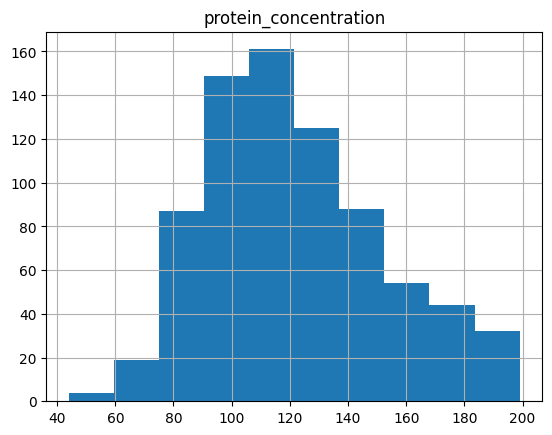

In [ ]:
df1.hist()

In [ ]:
# Replace missing values with the mean of the column
df1 = df1.fillna(df1.mean())

# Print the updated DataFrame
print(df1)

    participant_id  protein_concentration
0         SUBJ_001                  148.0
1         SUBJ_002                   85.0
2         SUBJ_003                  183.0
3         SUBJ_004                   89.0
4         SUBJ_005                  137.0
..             ...                    ...
763       SUBJ_764                  101.0
764       SUBJ_765                  122.0
765       SUBJ_766                  121.0
766       SUBJ_767                  126.0
767       SUBJ_768                   93.0

[768 rows x 2 columns]


In [ ]:
df1.isna().sum()

participant_id           0
protein_concentration    0
dtype: int64

array([[<Axes: title={'center': 'protein_concentration'}>]], dtype=object)

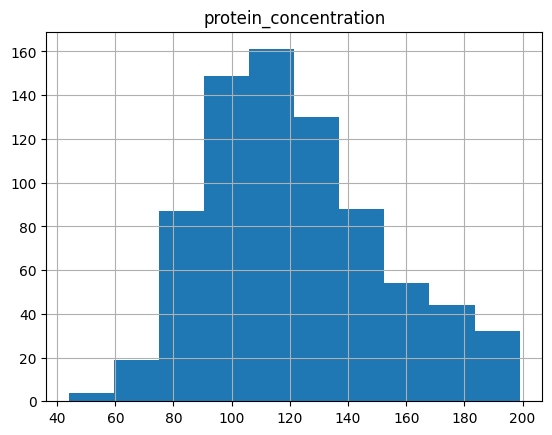

In [ ]:
df1.hist()

In [ ]:
fileName2 = '/content/drive/MyDrive/clinical-study.xlsx'

In [ ]:
df2= pd.read_excel(fileName2)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'weight'}>],
       [<Axes: title={'center': 'height'}>, <Axes: >]], dtype=object)

<Figure size 1200x800 with 0 Axes>

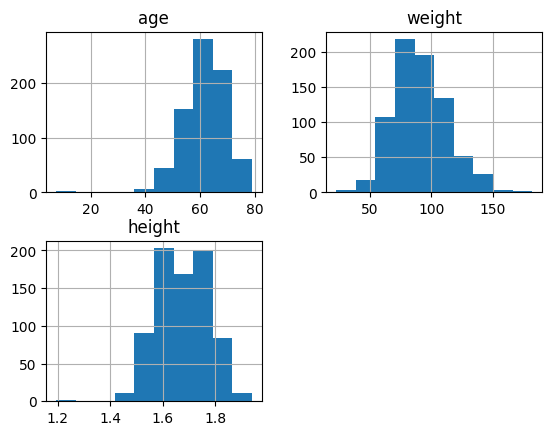

In [ ]:
plt.figure(figsize=(12,8))
df2.hist()

In [ ]:
df2.head()

subject_id   age     sex  weight  height  trt_grp RESPONSE
0   SUBJ_001  46.0  Female   84.66    1.59     DRUG        N
1   SUBJ_001  46.0  Female   84.66    1.59     DRUG        N
2   SUBJ_002  47.0  Female   71.21    1.64     DRUG        Y
3   SUBJ_003  48.0  Female   69.85    1.73  CONTROL        N
4   SUBJ_004  59.0  Female   62.94    1.50     DRUG        Y

In [ ]:
# rename the 'old_name' column to 'new_name'
df2 = df2.rename(columns={'subject_id': 'participant_id'})

In [ ]:
df2.head()

participant_id   age     sex  weight  height  trt_grp RESPONSE
0       SUBJ_001  46.0  Female   84.66    1.59     DRUG        N
1       SUBJ_001  46.0  Female   84.66    1.59     DRUG        N
2       SUBJ_002  47.0  Female   71.21    1.64     DRUG        Y
3       SUBJ_003  48.0  Female   69.85    1.73  CONTROL        N
4       SUBJ_004  59.0  Female   62.94    1.50     DRUG        Y

In [ ]:
df2.shape

(772, 7)

In [ ]:
df2.isna().sum()

participant_id     0
age                0
sex                0
weight            11
height             0
trt_grp            0
RESPONSE           0
dtype: int64

In [ ]:
df2_duplicates=df2.duplicated()

In [ ]:
df2[df2_duplicates]

participant_id   age     sex  weight  height trt_grp RESPONSE
1       SUBJ_001  46.0  Female   84.66    1.59    DRUG        N

In [ ]:
df2.drop_duplicates(inplace=True)

In [ ]:
df2.head()

participant_id   age     sex  weight  height  trt_grp RESPONSE
0       SUBJ_001  46.0  Female   84.66    1.59     DRUG        N
2       SUBJ_002  47.0  Female   71.21    1.64     DRUG        Y
3       SUBJ_003  48.0  Female   69.85    1.73  CONTROL        N
4       SUBJ_004  59.0  Female   62.94    1.50     DRUG        Y
5       SUBJ_005  59.0  Female  113.91    1.63  CONTROL        N

In [ ]:
# To select records where age is equal to or above 18

df3 = df2[df2['age'] >= 18]



In [ ]:
df3.describe()

age      weight      height
count  768.000000  757.000000  768.000000
mean    61.811198   91.387583    1.679271
std      7.107447   22.136837    0.097888
min     37.000000   46.170000    1.420000
25%     57.000000   75.670000    1.600000
50%     62.000000   88.980000    1.680000
75%     67.000000  104.660000    1.760000
max     79.000000  182.500000    1.940000

In [ ]:
df3.shape

(768, 7)

In [ ]:
df3.head()

participant_id   age     sex  weight  height  trt_grp RESPONSE
0       SUBJ_001  46.0  Female   84.66    1.59     DRUG        N
2       SUBJ_002  47.0  Female   71.21    1.64     DRUG        Y
3       SUBJ_003  48.0  Female   69.85    1.73  CONTROL        N
4       SUBJ_004  59.0  Female   62.94    1.50     DRUG        Y
5       SUBJ_005  59.0  Female  113.91    1.63  CONTROL        N

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'weight'}>],
       [<Axes: title={'center': 'height'}>, <Axes: >]], dtype=object)

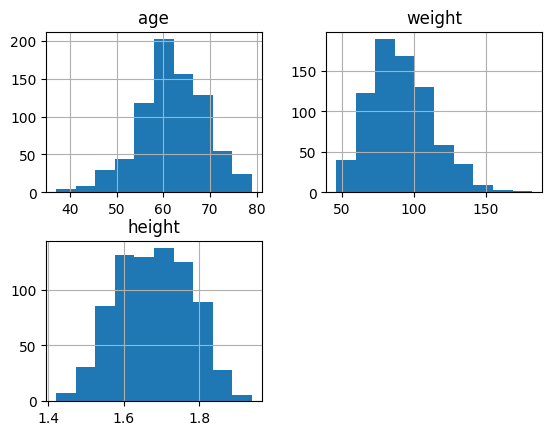

In [ ]:
df3.hist()

In [ ]:
# Check for missing values in each row
rows_with_missing_values = df3.isnull().any(axis=1)

# Print the rows with missing values
print(df3[rows_with_missing_values])

    participant_id   age     sex  weight  height  trt_grp RESPONSE
10        SUBJ_010  73.0  Female     NaN    1.64     DRUG        Y
50        SUBJ_050  65.0    Male     NaN    1.71     DRUG        N
61        SUBJ_061  61.0    Male     NaN    1.79  CONTROL        N
82        SUBJ_082  65.0    Male     NaN    1.78  CONTROL        N
146       SUBJ_146  56.0  Female     NaN    1.57  CONTROL        N
372       SUBJ_372  67.0  Female     NaN    1.62  CONTROL        N
427       SUBJ_427  66.0    Male     NaN    1.83  CONTROL        N
495       SUBJ_495  60.0  Female     NaN    1.65  CONTROL        N
523       SUBJ_523  62.0  Female     NaN    1.60     DRUG        N
685       SUBJ_685  74.0    Male     NaN    1.81  CONTROL        N
707       SUBJ_707  72.0    Male     NaN    1.75     DRUG        Y


In [ ]:
df3.isna().sum()

participant_id     0
age                0
sex                0
weight            11
height             0
trt_grp            0
RESPONSE           0
dtype: int64

In [ ]:
df3.shape

(768, 7)

In [ ]:
# filling missing values with mean
df3=df3.fillna(df3.mean())


In [ ]:
# Add a new calculated column called 'BMI'
df3['BMI'] = df3['weight'] / (df3['height'] ** 2)


In [ ]:
df1.shape

(768, 2)

In [ ]:
# merge the dataframes on the 'participant_id' column
merged_df = df3.merge(df1, on='participant_id', how='left') 
             


In [ ]:
merged_df.head()

participant_id   age     sex  weight  height  trt_grp RESPONSE        BMI  \
0       SUBJ_001  46.0  Female   84.66    1.59     DRUG        N  33.487599   
1       SUBJ_002  47.0  Female   71.21    1.64     DRUG        Y  26.476056   
2       SUBJ_003  48.0  Female   69.85    1.73  CONTROL        N  23.338568   
3       SUBJ_004  59.0  Female   62.94    1.50     DRUG        Y  27.973333   
4       SUBJ_005  59.0  Female  113.91    1.63  CONTROL        N  42.873273   

   protein_concentration  
0                  148.0  
1                   85.0  
2                  183.0  
3                   89.0  
4                  137.0

In [ ]:
merged_df.isna().sum()

participant_id           0
age                      0
sex                      0
weight                   0
height                   0
trt_grp                  0
RESPONSE                 0
BMI                      0
protein_concentration    0
dtype: int64

In [ ]:
merged_df.head()

participant_id   age     sex  weight  height  trt_grp RESPONSE        BMI  \
0       SUBJ_001  46.0  Female   84.66    1.59     DRUG        N  33.487599   
1       SUBJ_002  47.0  Female   71.21    1.64     DRUG        Y  26.476056   
2       SUBJ_003  48.0  Female   69.85    1.73  CONTROL        N  23.338568   
3       SUBJ_004  59.0  Female   62.94    1.50     DRUG        Y  27.973333   
4       SUBJ_005  59.0  Female  113.91    1.63  CONTROL        N  42.873273   

   protein_concentration  
0                  148.0  
1                   85.0  
2                  183.0  
3                   89.0  
4                  137.0

In [ ]:
merged_df.shape

(768, 9)

In [ ]:
# Get the column names in the desired order where RESPONSE is the last


# Rearrange columns
columns = list(merged_df.columns)
Response_column = columns.pop(6)
columns.append(Response_column)
merged_df = merged_df[columns]


In [ ]:
merged_df.shape

(768, 9)

In [ ]:
Excel_df = merged_df

In [ ]:
# Convert cleaned data from DataFrame to Excel to be used in power
#df3.to_excel('gsk_excel_df3.xlsx', index=False)

In [ ]:
merged_df2=merged_df

In [ ]:
# Convert cleaned data from DataFrame to Excel to be used in power
#df1.to_excel('gsk_excel_df1.xlsx', index=False)

In [ ]:
# Convert cleaned data from DataFrame to Excel to be used in power
#merged_df.to_excel('gsk_excel.xlsx', index=False)

In [ ]:
merged_df

participant_id   age     sex  weight  height  trt_grp        BMI  \
0         SUBJ_001  46.0  Female   84.66    1.59     DRUG  33.487599   
1         SUBJ_002  47.0  Female   71.21    1.64     DRUG  26.476056   
2         SUBJ_003  48.0  Female   69.85    1.73  CONTROL  23.338568   
3         SUBJ_004  59.0  Female   62.94    1.50     DRUG  27.973333   
4         SUBJ_005  59.0  Female  113.91    1.63  CONTROL  42.873273   
..             ...   ...     ...     ...     ...      ...        ...   
763       SUBJ_764  61.0  Female   82.95    1.59  CONTROL  32.811202   
764       SUBJ_765  65.0    Male  112.86    1.76     DRUG  36.434659   
765       SUBJ_766  60.0    Male   81.03    1.77     DRUG  25.864215   
766       SUBJ_767  53.0    Male   88.67    1.72     DRUG  29.972282   
767       SUBJ_768  68.0  Female   80.29    1.63     DRUG  30.219429   

     protein_concentration RESPONSE  
0                    148.0        N  
1                     85.0        Y  
2                    183.0        N  
3                     89.0        Y  
4                    137.0        N  
..                     ...      ...  
763                  101.0        Y  
764                  122.0        N  
765                  121.0        N  
766                  126.0        Y  
767                   93.0        Y  

[768 rows x 9 columns]

In [ ]:
merged_df["RESPONSE"].value_counts()

N    434
Y    334
Name: RESPONSE, dtype: int64

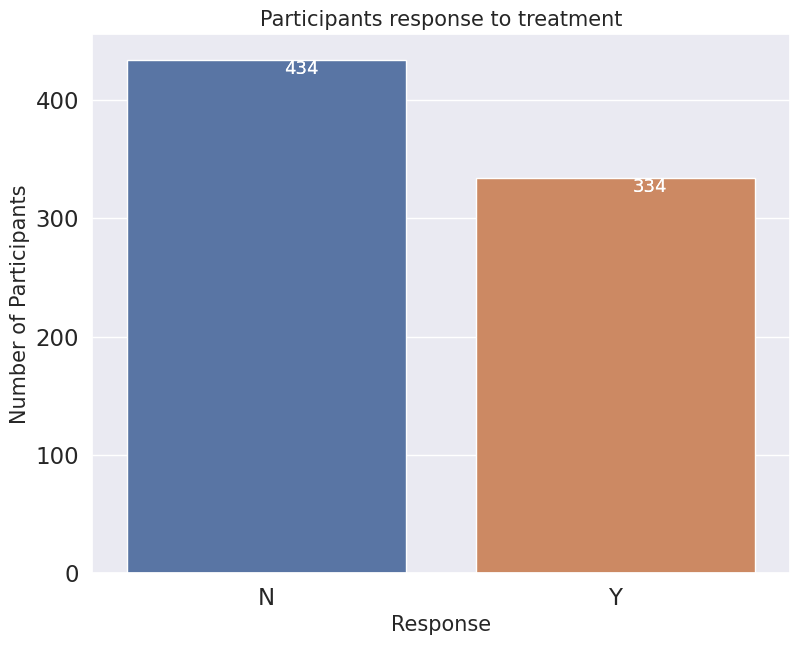

In [ ]:
plt.figure(figsize=(9,7))
ax=sns.countplot(x='RESPONSE', data=merged_df)
ax.set_title('Participants response to treatment' , fontsize = 15)
sns.set(font_scale=1.5)
plt.xlabel('Response', fontsize=15)
plt.ylabel('Number of Participants', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x()+0.5, p.get_height()), ha='center', va='top', color='white', size=13)

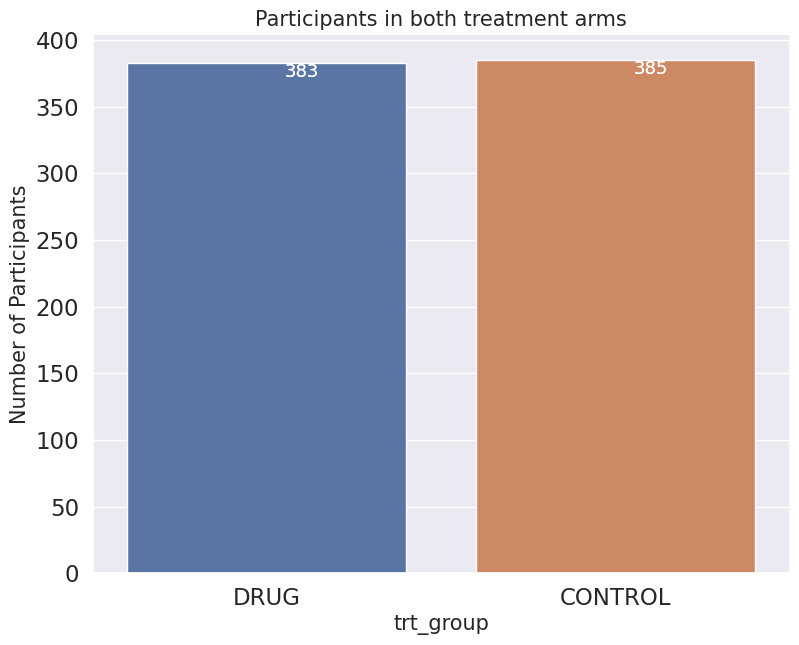

In [ ]:
plt.figure(figsize=(9,7))
ax=sns.countplot(x='trt_grp', data=merged_df)
ax.set_title('Participants in both treatment arms' , fontsize = 15)
sns.set(font_scale=1.5)
plt.xlabel('trt_group', fontsize=15)
plt.ylabel('Number of Participants', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x()+0.5, p.get_height()), ha='center', va='top', color='white', size=13)

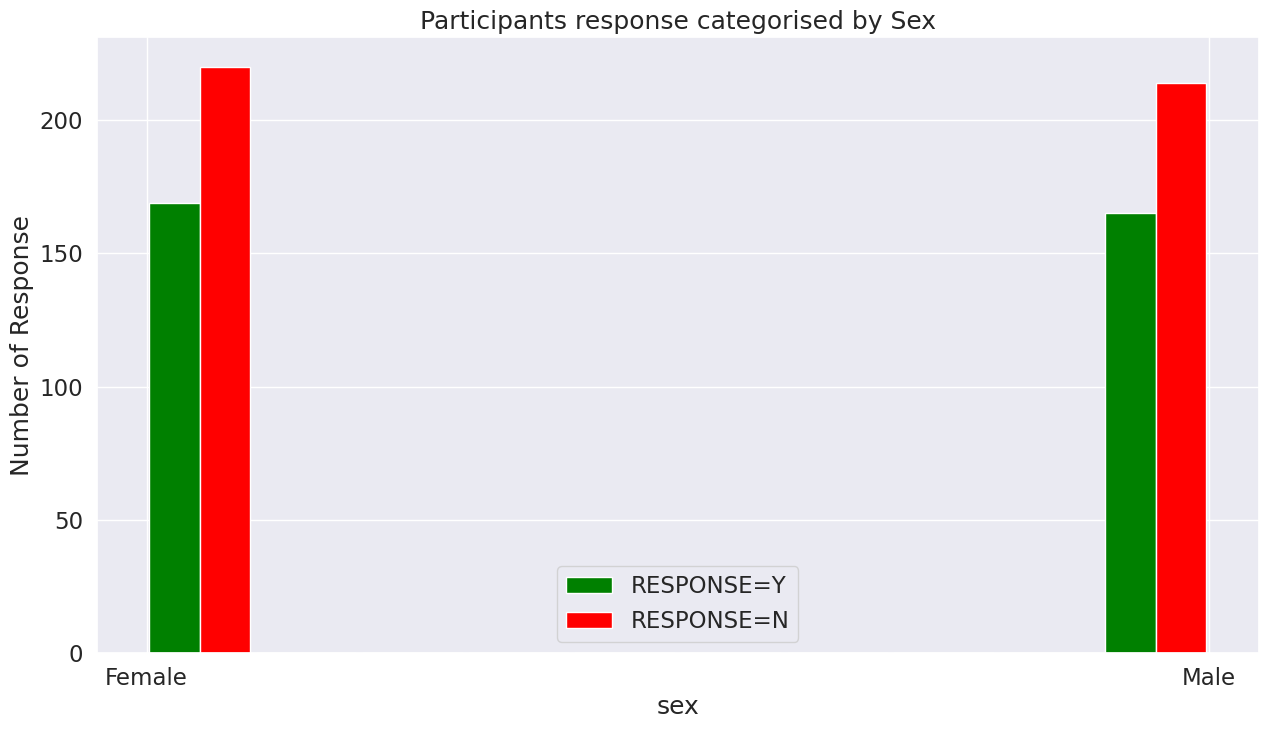

In [ ]:
# using gender
plt.figure(figsize=(15,8))
sex_response_Y = merged_df[merged_df.RESPONSE=='Y'].sex
sex_response_N = merged_df[merged_df.RESPONSE=='N'].sex

plt.xlabel('sex')
plt.ylabel('Number of Response')
plt.title('Participants response categorised by Sex')

plt.hist([sex_response_Y, sex_response_N], rwidth= 0.95, color =['green', 'red'], label = ['RESPONSE=Y', 'RESPONSE=N'])
plt.legend()

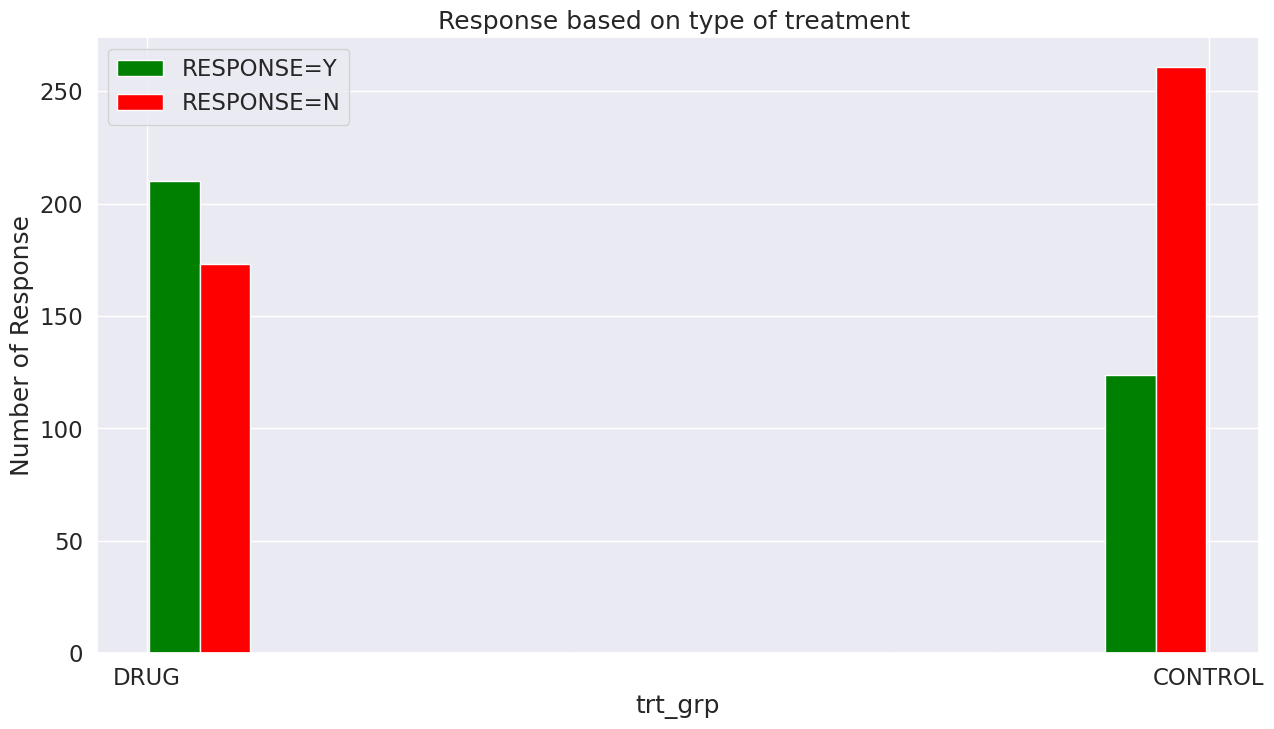

In [ ]:
# using trt_grp
plt.figure(figsize=(15,8))
trt_grp_response_Y = merged_df[merged_df.RESPONSE=='Y'].trt_grp
trt_grp_response_N = merged_df[merged_df.RESPONSE=='N'].trt_grp

plt.xlabel('trt_grp')
plt.ylabel('Number of Response')
plt.title('Response based on type of treatment ')

plt.hist([trt_grp_response_Y, trt_grp_response_N], rwidth= 0.95, color =['green', 'red'], label = ['RESPONSE=Y', 'RESPONSE=N'])
plt.legend()

# Sex does not influence how participants responded to treatment. However, further analysis will be done for the two treatment separately to re-assess this position.

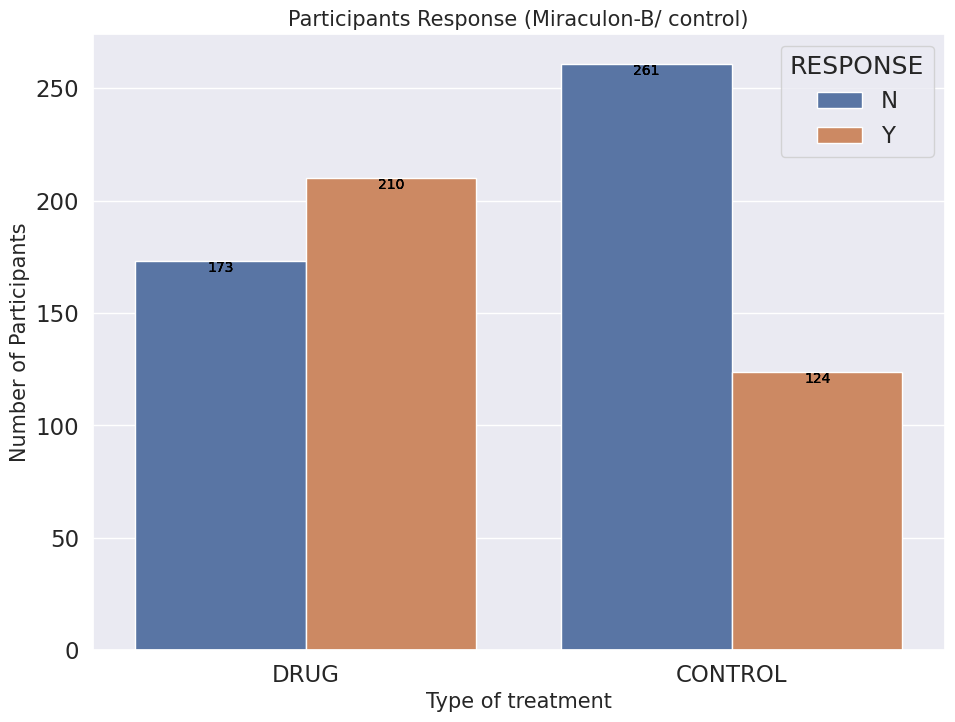

In [ ]:
plt.figure(figsize=(11,8))
ax=sns.countplot(x='trt_grp', hue='RESPONSE', data=merged_df)
ax.set_title('Participants Response (Miraculon-B/ control)' , fontsize = 15)
sns.set(font_scale=1.2)
plt.xlabel('Type of treatment', fontsize=15)
plt.ylabel('Number of Participants', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=10)

# Participants responded better to Miraculon-B compared to those who were treated with the standard care

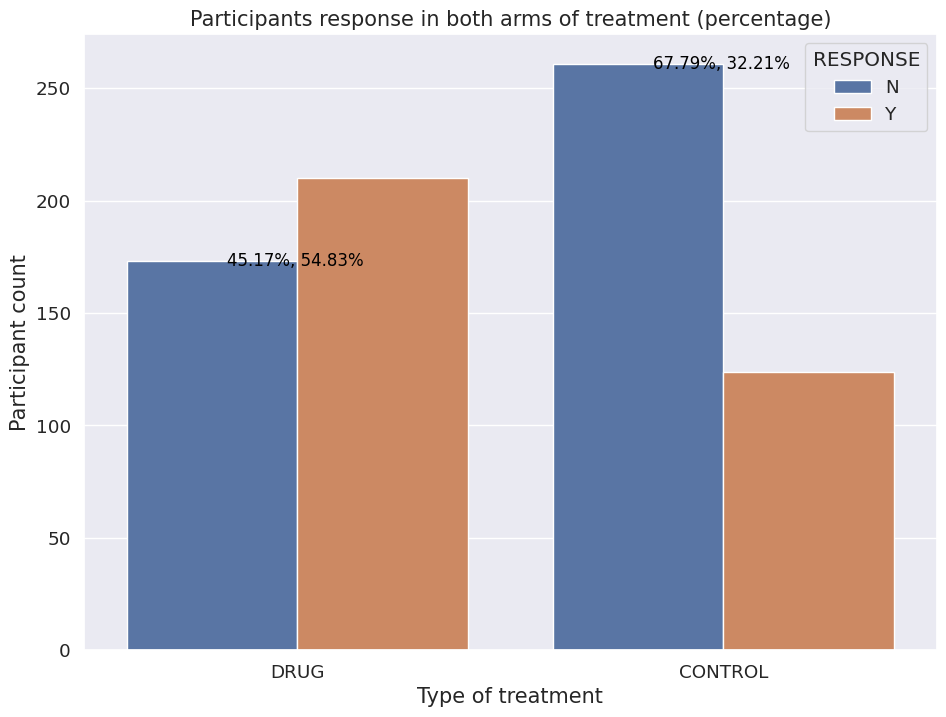

In [ ]:

plt.figure(figsize=(11, 8))
sns.set(font_scale=1.2)

ax=sns.countplot(x='trt_grp', hue='RESPONSE', data=merged_df)
ax.set_title('Participants response in both arms of treatment (percentage)', fontsize=15)
plt.xlabel('Type of treatment', fontsize=15)
plt.ylabel('Participant count', fontsize=15)
plt.xticks(rotation='horizontal')

# Annotate plot with percentages
total_counts = merged_df.groupby('trt_grp')['RESPONSE'].count().reset_index(name='count')
response_counts = merged_df.groupby(['trt_grp', 'RESPONSE']).size().reset_index(name='response_count')

for p, label in zip(ax.patches, ax.get_xticklabels()):
    height = p.get_height()
    bin_label = label.get_text()
    bin_counts = response_counts[response_counts['trt_grp'] == bin_label]['response_count']
    total_count = total_counts[total_counts['trt_grp'] == bin_label]['count'].iloc[0]
    percentages = [count / total_count * 100 for count in bin_counts]
    percentage_str = ', '.join([f'{percentage:.2f}%' for percentage in percentages])
    ax.annotate(percentage_str, (p.get_x() + p.get_width() / 2, height),
                ha='center', va='center', color='black', size=12,
                xytext=(60, 0), textcoords='offset points')  

plt.show()

# Miraculon-B shows that it can treat cancer better than the standard care.     54.83% of participants who were treated with it responded while only 32.21% of participants treated with the standard care responded.

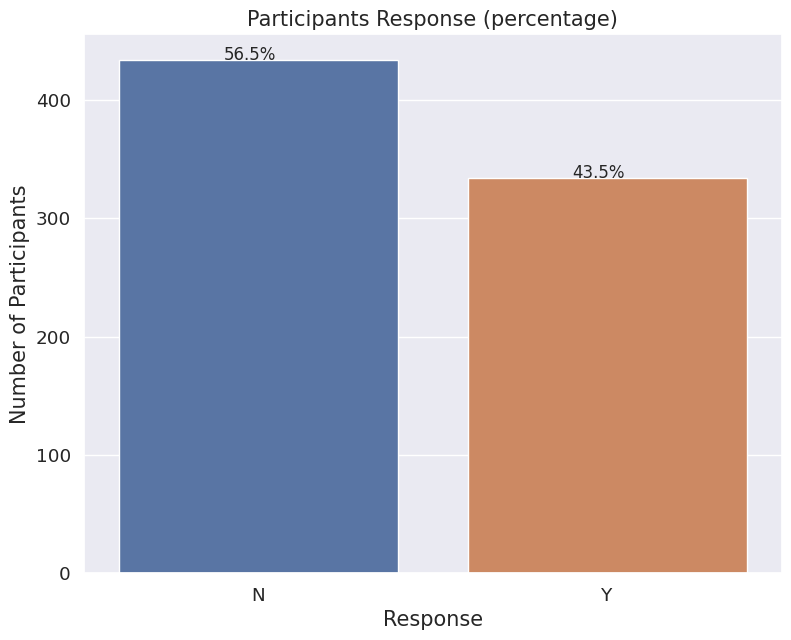

In [ ]:
plt.figure(figsize=(9,7))
ax=sns.countplot(x='RESPONSE', data=merged_df)
ax.set_title('Participants Response (percentage)' , fontsize = 15)
sns.set(font_scale=1.2)
plt.xlabel('Response', fontsize=15)
plt.ylabel('Number of Participants', fontsize=15)
plt.xticks(rotation='horizontal')

total = float(len(merged_df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12)

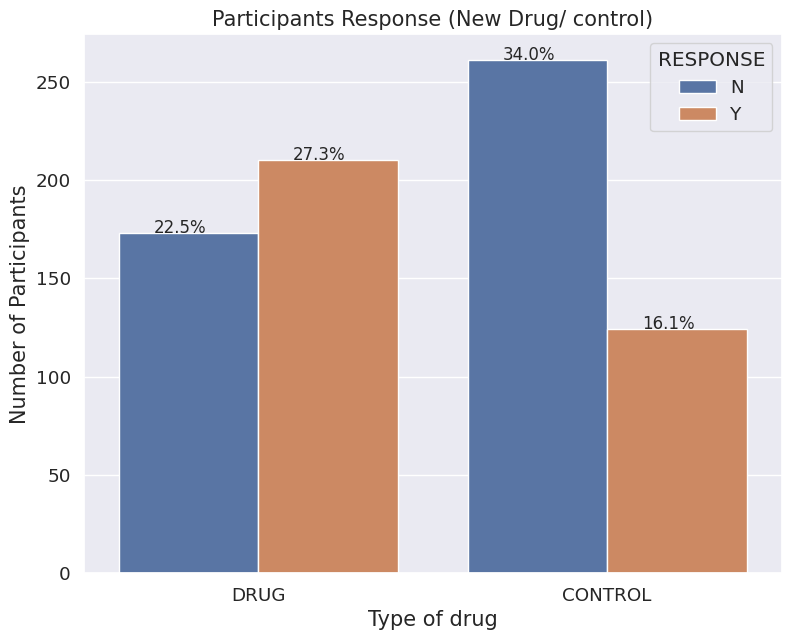

In [ ]:
plt.figure(figsize=(9,7))
ax=sns.countplot(x='trt_grp', hue='RESPONSE', data=merged_df)
ax.set_title('Participants Response (New Drug/ control)' , fontsize = 15)
sns.set(font_scale=1.2)
plt.xlabel('Type of drug', fontsize=15)
plt.ylabel('Number of Participants', fontsize=15)
plt.xticks(rotation='horizontal')

total = float(len(merged_df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12)


In [ ]:
#Calculate the percentages for each group and response combination
# Calculate the percentages for each group and response combination
group_counts = merged_df.groupby('trt_grp')['RESPONSE'].count()
response_counts = merged_df.groupby(['trt_grp', 'RESPONSE']).size()
percentages = (response_counts / group_counts) * 100


In [ ]:
merged_df2=merged_df

In [ ]:
response_counts

trt_grp  RESPONSE
CONTROL  N           261
         Y           124
DRUG     N           173
         Y           210
dtype: int64

In [ ]:
percentages

trt_grp  RESPONSE
CONTROL  N           67.792208
         Y           32.207792
DRUG     N           45.169713
         Y           54.830287
dtype: float64

In [ ]:
# 

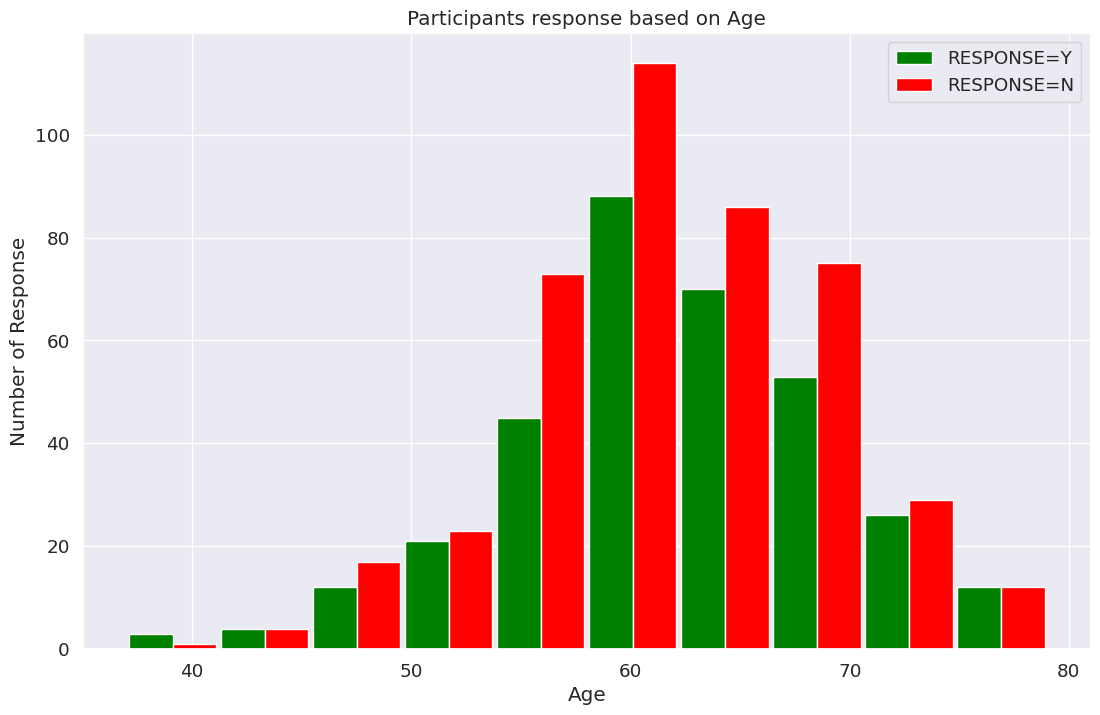

In [ ]:
# using Age
plt.figure(figsize=(13,8))
age_response_Y = merged_df[merged_df.RESPONSE=='Y'].age
age_response_N = merged_df[merged_df.RESPONSE=='N'].age

plt.xlabel('Age')
plt.ylabel('Number of Response')
plt.title('Participants response based on Age')

plt.hist([age_response_Y, age_response_N], rwidth= 0.95, color =['green', 'red'], label = ['RESPONSE=Y', 'RESPONSE=N'])
plt.legend()

In [ ]:
# Age distribution of participants in the study
age_bin1 = pd.cut(merged_df['age'], 7)


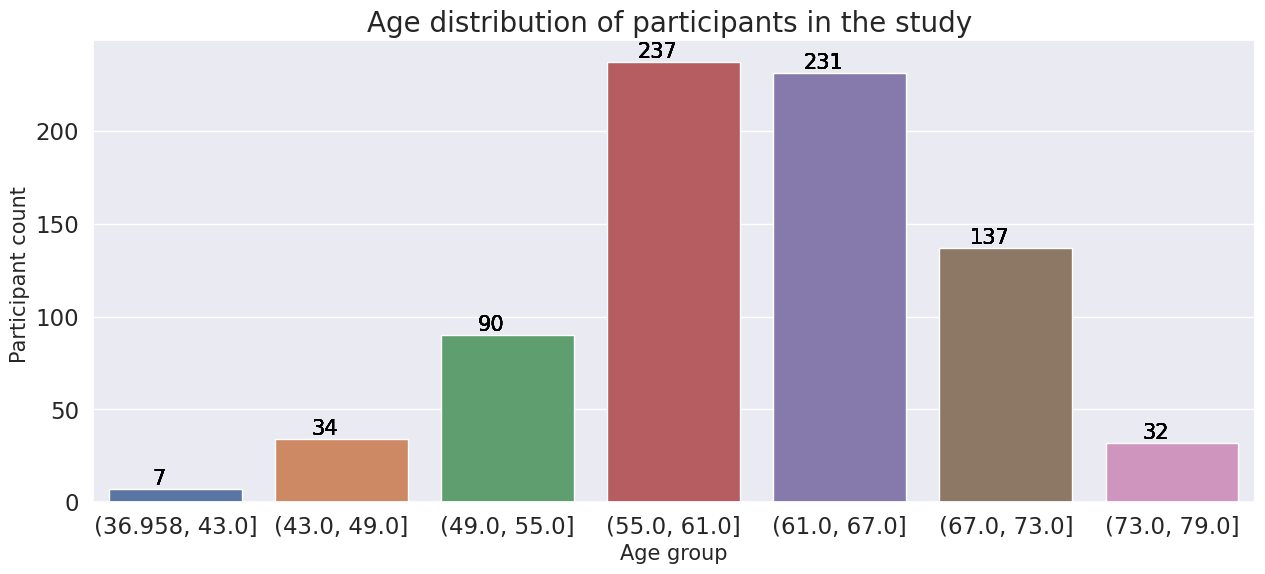

In [ ]:
plt.figure(figsize=(15,6))
sns.set(font_scale=1.5)
ax=sns.countplot(x= age_bin1)
ax.set_title('Age distribution of participants in the study ' , fontsize = 20)
plt.xlabel('Age group', fontsize=15)
plt.ylabel('Participant count ', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=15)

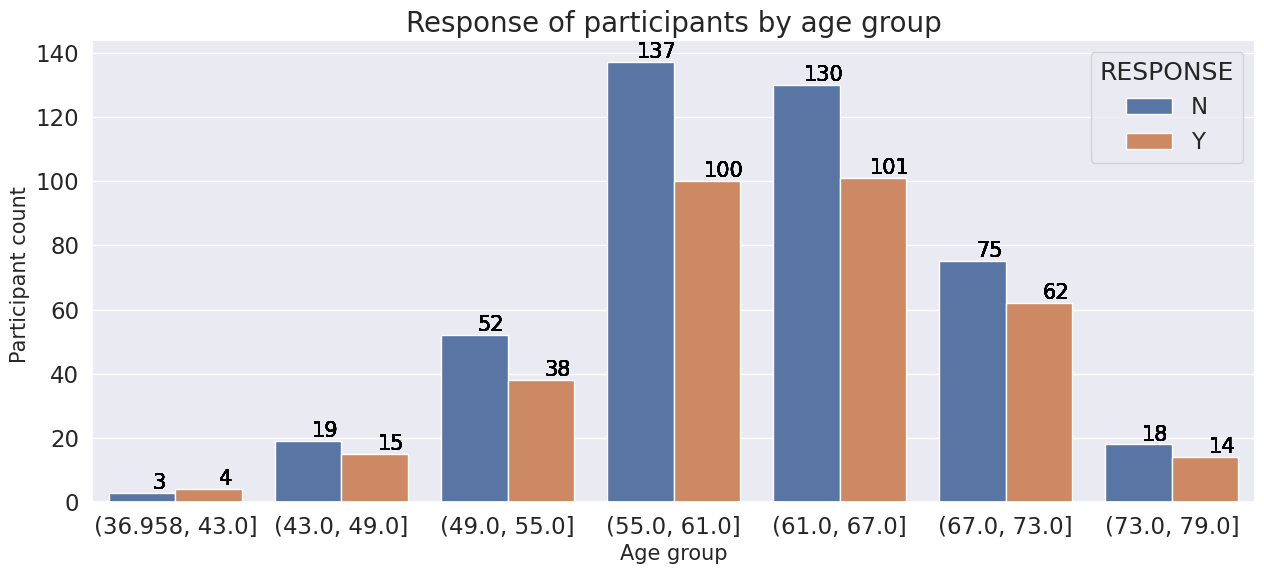

In [ ]:
plt.figure(figsize=(15,6))
sns.set(font_scale=1.5)
ax=sns.countplot(x= age_bin1, hue='RESPONSE', data=merged_df)
ax.set_title('Response of participants by age group' , fontsize = 20)
plt.xlabel('Age group', fontsize=15)
plt.ylabel('Participant count ', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=15)

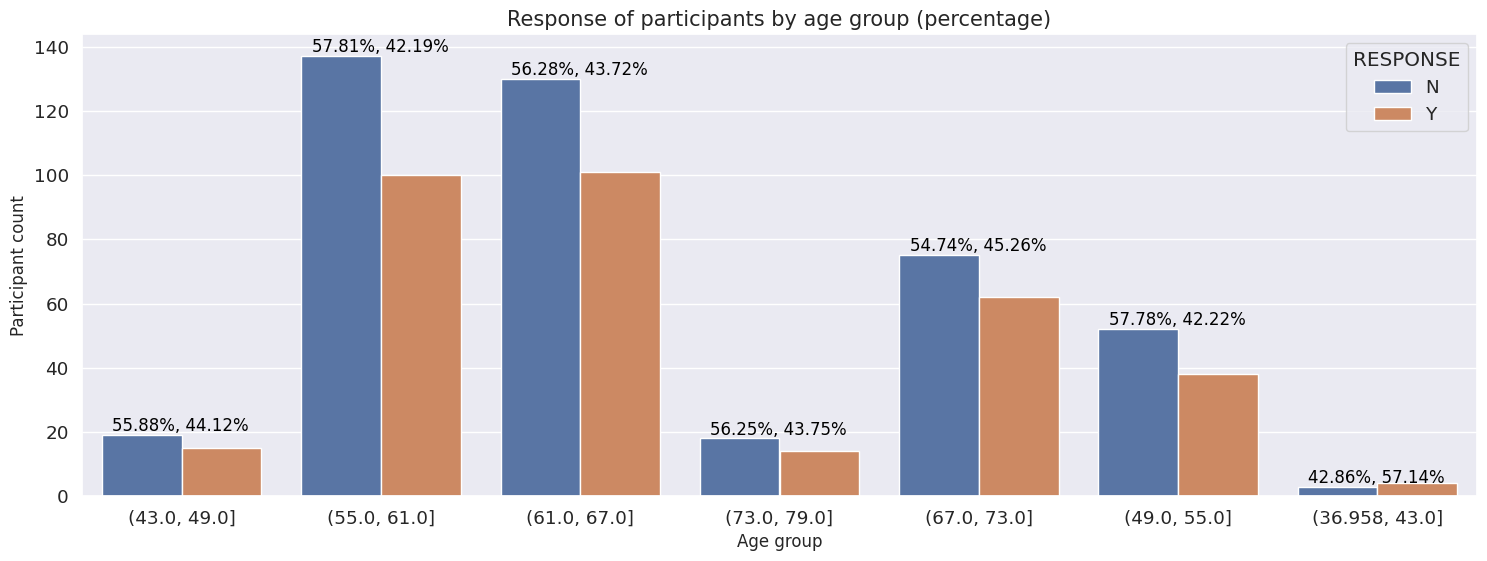

In [ ]:


# Create 7 bins for weight
merged_df['age_bin'] = pd.cut(merged_df['age'], 7)

# Convert bin labels to strings
merged_df['age_bin'] = merged_df['age_bin'].astype(str)

# Create countplot
plt.figure(figsize=(18, 6))
sns.set(font_scale=1.2)
ax = sns.countplot(x='age_bin', hue='RESPONSE', data=merged_df)
ax.set_title('Response of participants by age group (percentage)', fontsize=15)
plt.xlabel('Age group', fontsize=12)
plt.ylabel('Participant count', fontsize=12)
plt.xticks(rotation='horizontal')

# Annotate plot with percentages
total_counts = merged_df.groupby('age_bin')['RESPONSE'].count().reset_index(name='count')
response_counts = merged_df.groupby(['age_bin', 'RESPONSE']).size().reset_index(name='response_count')

for p, label in zip(ax.patches, ax.get_xticklabels()):
    height = p.get_height()
    bin_label = label.get_text()
    bin_counts = response_counts[response_counts['age_bin'] == bin_label]['response_count']
    total_count = total_counts[total_counts['age_bin'] == bin_label]['count'].iloc[0]
    percentages = [count / total_count * 100 for count in bin_counts]
    percentage_str = ', '.join([f'{percentage:.2f}%' for percentage in percentages])
    ax.annotate(percentage_str, (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', color='black', size=12,
                xytext=(28, 0), textcoords='offset points') 

plt.show()


# Age does not contribute significantly to how participants responded.The mean age of participants that responded or not is about 62. Response of about 42 to 45% was recorded across the age group. 

In [ ]:
#mean age of responders
mean_age_resp = merged_df2[merged_df2['RESPONSE'] == 'Y']['age'].mean()
mean_age_resp

61.89221556886228

In [ ]:

#mean age of non responders
mean_age_no_resp = merged_df2[merged_df2['RESPONSE'] == 'N']['age'].mean()
mean_age_no_resp

61.74884792626728

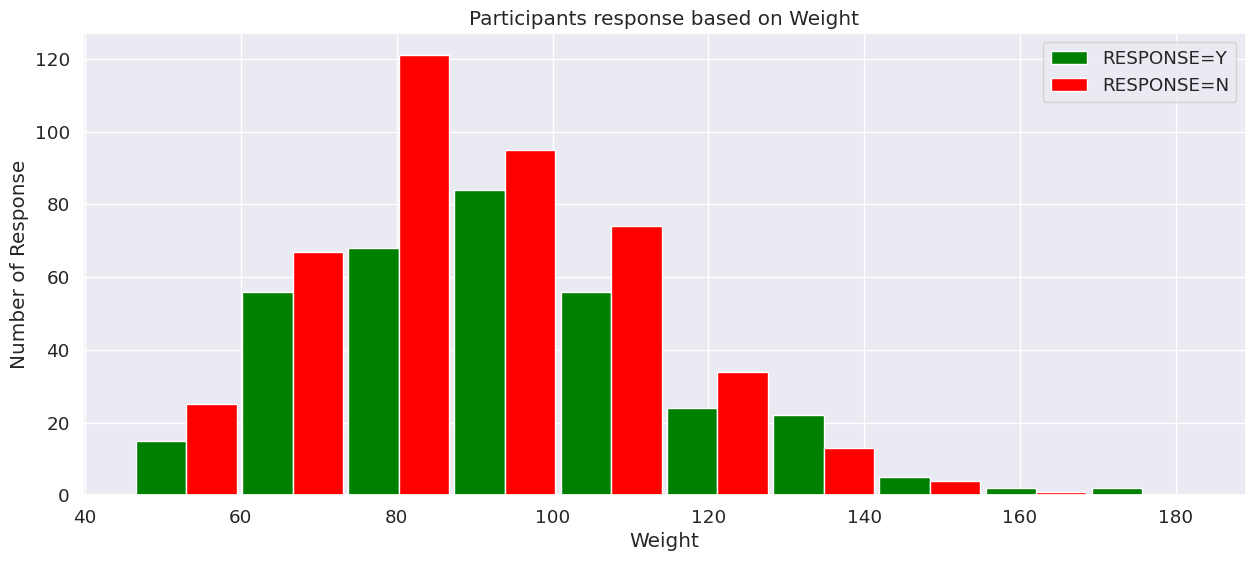

In [ ]:
# using weight
plt.figure(figsize=(15,6))
weight_response_Y = merged_df[merged_df.RESPONSE=='Y'].weight
weight_response_N = merged_df[merged_df.RESPONSE=='N'].weight

plt.xlabel('Weight')
plt.ylabel('Number of Response')
plt.title('Participants response based on Weight')

plt.hist([weight_response_Y, weight_response_N], rwidth= 0.95, color =['green', 'red'], label = ['RESPONSE=Y', 'RESPONSE=N'])
plt.legend()

In [ ]:
# Create 7 bins for weight
weight_bins1= pd.cut(merged_df['weight'], 7)


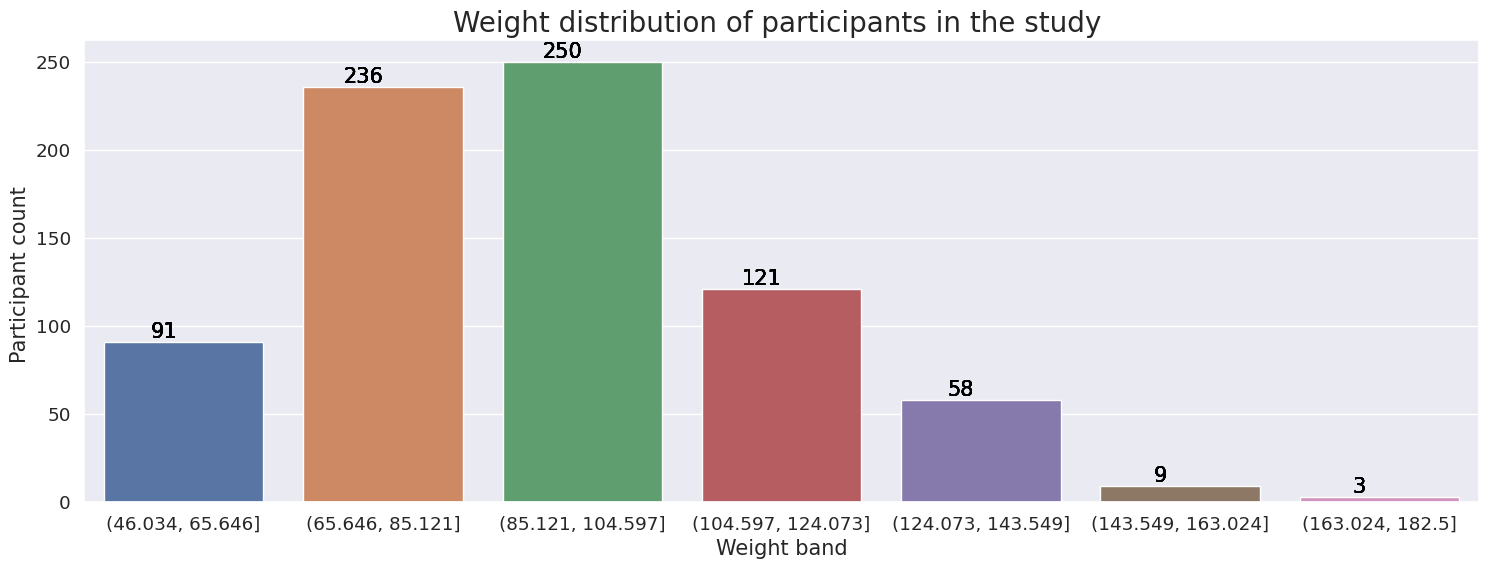

In [ ]:
plt.figure(figsize=(18,6))
sns.set(font_scale=1.2)
ax=sns.countplot(x= weight_bins1)
ax.set_title('Weight distribution of participants in the study ' , fontsize = 20)
plt.xlabel('Weight band', fontsize=15)
plt.ylabel('Participant count ', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=15)

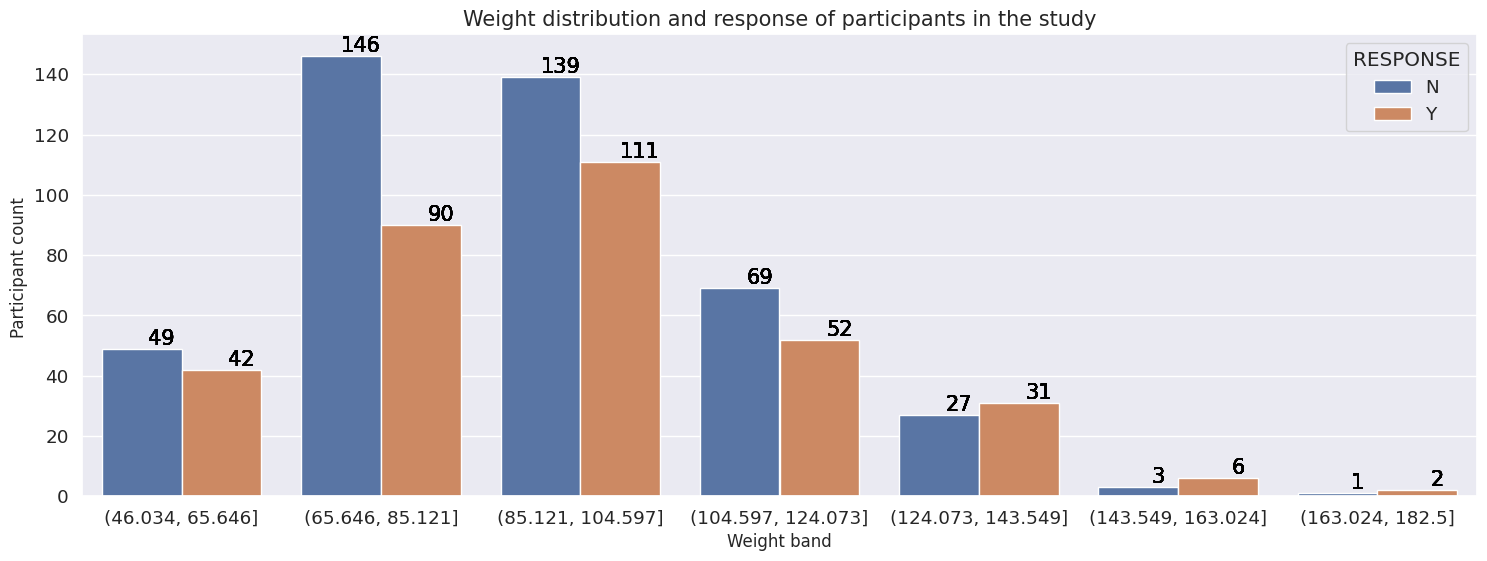

In [ ]:
plt.figure(figsize=(18,6))
sns.set(font_scale=1.2)
ax=sns.countplot(x= weight_bins1, hue="RESPONSE", data=merged_df)
ax.set_title('Weight distribution and response of participants in the study' , fontsize = 15)
plt.xlabel('Weight band', fontsize=12)
plt.ylabel('Participant count ', fontsize=12)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=15)

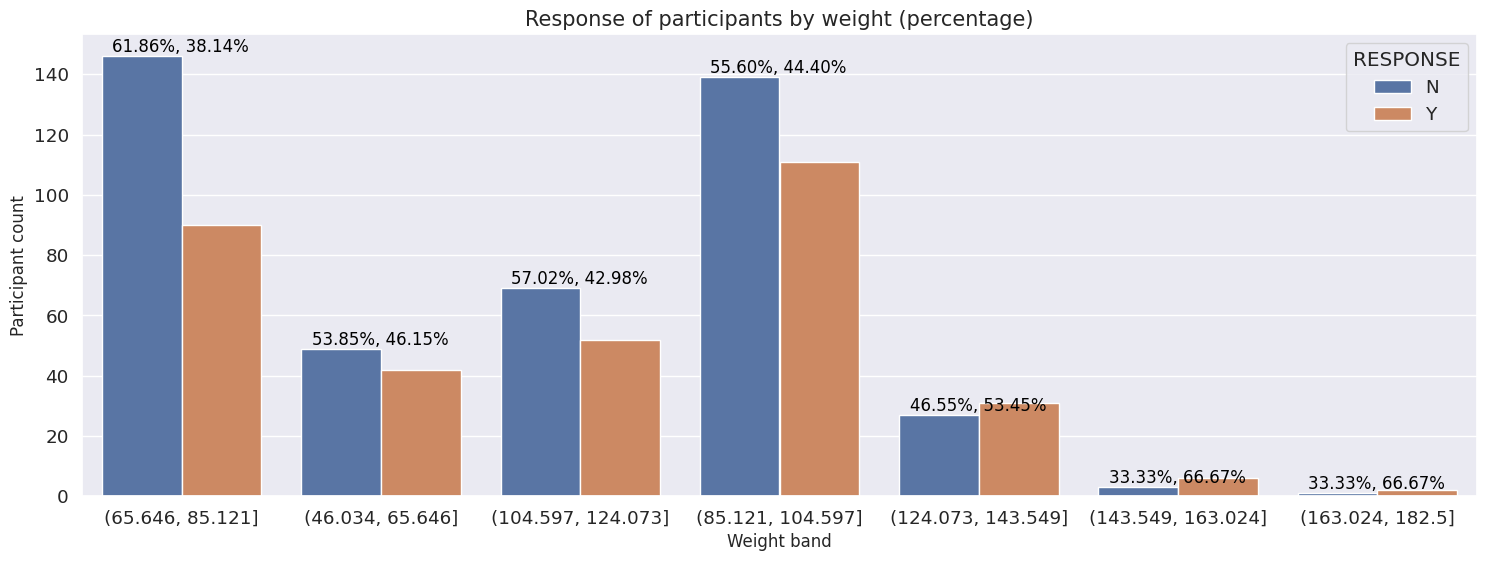

In [ ]:


# Create 7 bins for weight
merged_df['weight_bins'] = pd.cut(merged_df['weight'], 7)

# Convert bin labels to strings
merged_df['weight_bins'] = merged_df['weight_bins'].astype(str)

# Create countplot
plt.figure(figsize=(18, 6))
sns.set(font_scale=1.2)
ax = sns.countplot(x='weight_bins', hue='RESPONSE', data=merged_df)
ax.set_title('Response of participants by weight (percentage)', fontsize=15)
plt.xlabel('Weight band', fontsize=12)
plt.ylabel('Participant count', fontsize=12)
plt.xticks(rotation='horizontal')

# Annotate plot with percentages
total_counts = merged_df.groupby('weight_bins')['RESPONSE'].count().reset_index(name='count')
response_counts = merged_df.groupby(['weight_bins', 'RESPONSE']).size().reset_index(name='response_count')

for p, label in zip(ax.patches, ax.get_xticklabels()):
    height = p.get_height()
    bin_label = label.get_text()
    bin_counts = response_counts[response_counts['weight_bins'] == bin_label]['response_count']
    total_count = total_counts[total_counts['weight_bins'] == bin_label]['count'].iloc[0]
    percentages = [count / total_count * 100 for count in bin_counts]
    percentage_str = ', '.join([f'{percentage:.2f}%' for percentage in percentages])
    ax.annotate(percentage_str, (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', color='black', size=12,
                xytext=(28, 0), textcoords='offset points') 

plt.show()

In [ ]:
# mean weight for responders
mean_wt_resp = merged_df2[merged_df2['RESPONSE'] == 'Y']['weight'].mean()
mean_wt_resp

93.25097354827993

In [ ]:
# mean weight for non responders
mean_wt_no_resp = merged_df2[merged_df2['RESPONSE'] == 'N']['weight'].mean()
mean_wt_no_resp

89.95354433885883

# Weight is not a significant contributor to determine if participant will respond or not. The mean weight of responders and non responders fall within same weight band of 85.12 to 104.60

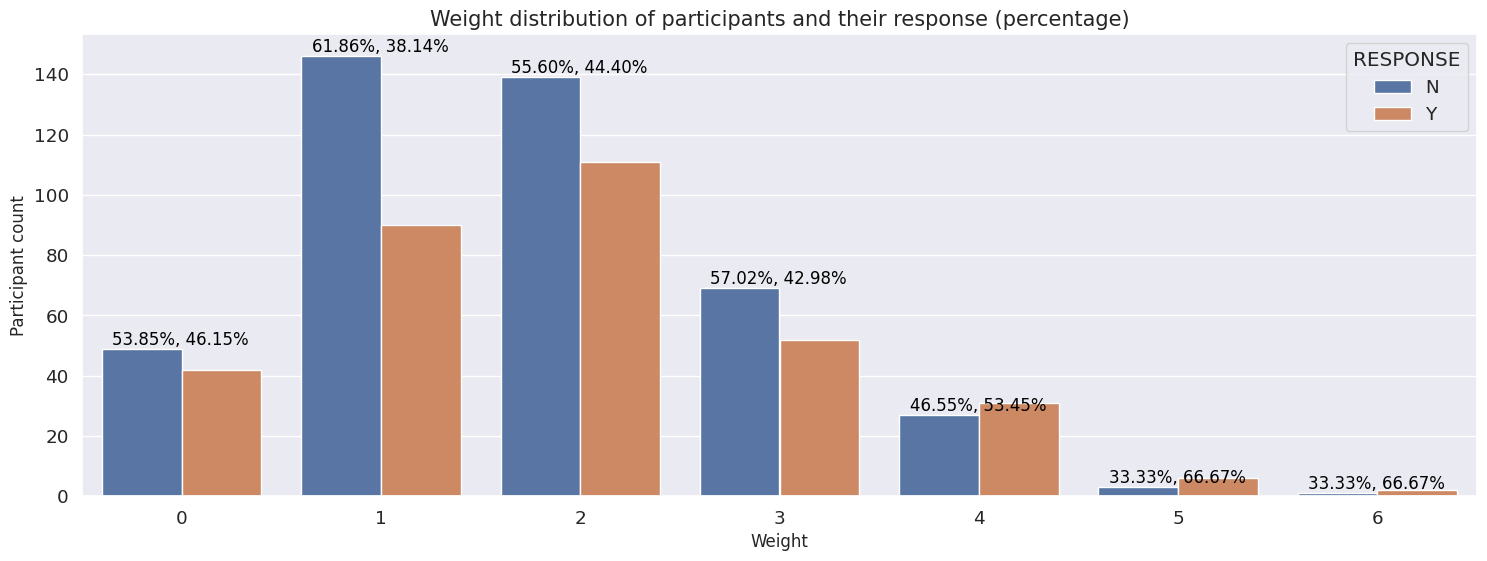

In [ ]:
# Create 7 bins for weight with ascending order
merged_df['weight_bins'] = pd.cut(merged_df['weight'], 7, labels=False, duplicates='drop')

# Convert bin labels to strings
merged_df['weight_bins'] = merged_df['weight_bins'].astype(str)

# Sort the DataFrame by weight_bins in ascending order
merged_df = merged_df.sort_values('weight_bins')

# Create countplot
plt.figure(figsize=(18, 6))
sns.set(font_scale=1.2)
ax = sns.countplot(x='weight_bins', hue='RESPONSE', data=merged_df)
ax.set_title('Weight distribution of participants and their response (percentage)', fontsize=15)
plt.xlabel('Weight', fontsize=12)
plt.ylabel('Participant count', fontsize=12)
plt.xticks(rotation='horizontal')

# Annotate plot with percentages
total_counts = merged_df.groupby('weight_bins')['RESPONSE'].count().reset_index(name='count')
response_counts = merged_df.groupby(['weight_bins', 'RESPONSE']).size().reset_index(name='response_count')

for p, label in zip(ax.patches, ax.get_xticklabels()):
    height = p.get_height()
    bin_label = label.get_text()
    bin_counts = response_counts[response_counts['weight_bins'] == bin_label]['response_count']
    total_count = total_counts[total_counts['weight_bins'] == bin_label]['count'].iloc[0]
    percentages = [count / total_count * 100 for count in bin_counts]
    percentage_str = ', '.join([f'{percentage:.2f}%' for percentage in percentages])
    ax.annotate(percentage_str, (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', color='black', size=12,
                xytext=(28, 0), textcoords='offset points') 

plt.show()


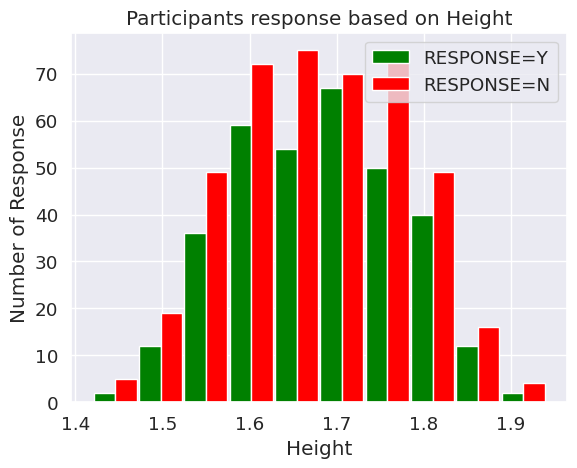

In [ ]:
# using Height
height_response_Y = merged_df[merged_df.RESPONSE=='Y'].height
height_response_N = merged_df[merged_df.RESPONSE=='N'].height

plt.xlabel('Height')
plt.ylabel('Number of Response')
plt.title('Participants response based on Height')

plt.hist([height_response_Y, height_response_N], rwidth= 0.95, color =['green', 'red'], label = ['RESPONSE=Y', 'RESPONSE=N'])
plt.legend()

In [ ]:
mean_wt_resp = merged_df2[merged_df2['RESPONSE'] == 'Y']['weight'].mean()
mean_wt_resp

93.25097354827993

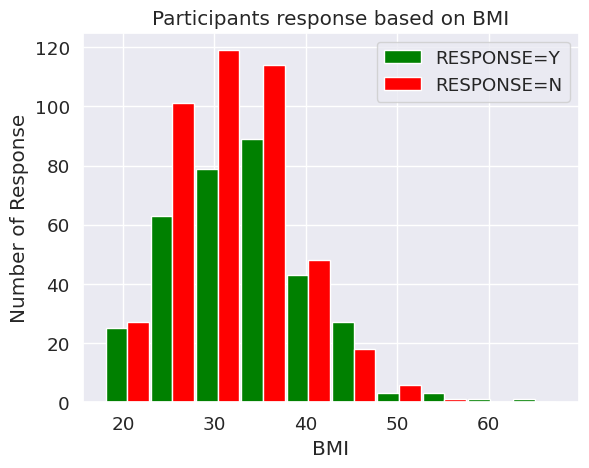

In [ ]:
# using BMI
BMI_response_Y = merged_df[merged_df.RESPONSE=='Y'].BMI
BMI_response_N = merged_df[merged_df.RESPONSE=='N'].BMI

plt.xlabel('BMI')
plt.ylabel('Number of Response')
plt.title('Participants response based on BMI')

plt.hist([BMI_response_Y, BMI_response_N], rwidth= 0.95, color =['green', 'red'], label = ['RESPONSE=Y', 'RESPONSE=N'])
plt.legend()

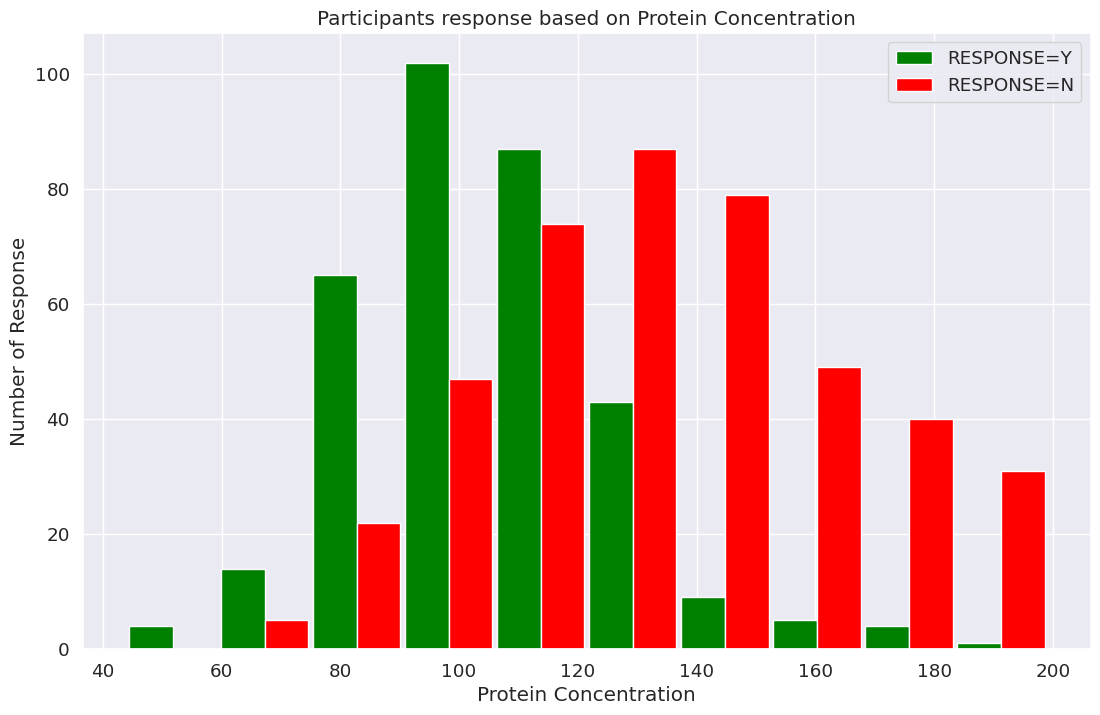

In [ ]:
# using protein_concentration
plt.figure(figsize=(13,8))
protein_conc_response_Y = merged_df[merged_df.RESPONSE=='Y'].protein_concentration
protein_conc_response_N = merged_df[merged_df.RESPONSE=='N'].protein_concentration

plt.xlabel('Protein Concentration')
plt.ylabel('Number of Response')
plt.title('Participants response based on Protein Concentration')

plt.hist([protein_conc_response_Y, protein_conc_response_N], rwidth= 0.95, color =['green', 'red'], label = ['RESPONSE=Y', 'RESPONSE=N'])
plt.legend()

In [ ]:
protein_conc = pd.cut(merged_df['protein_concentration'], 7)

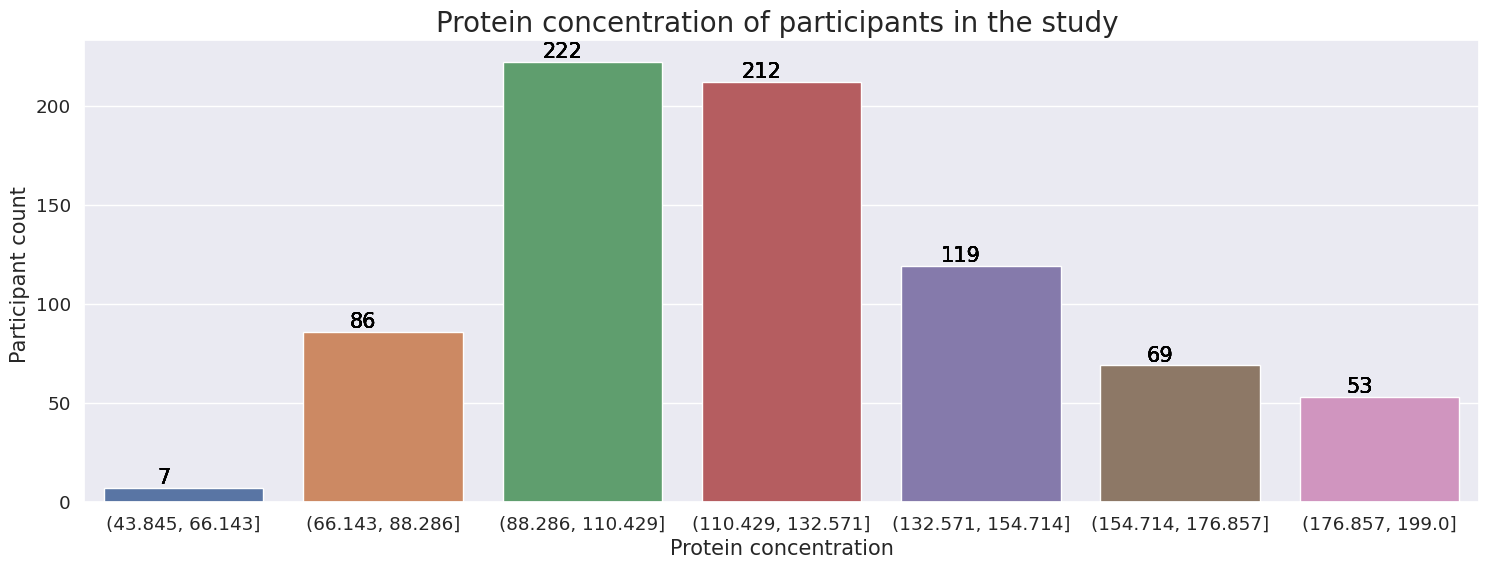

In [ ]:

plt.figure(figsize=(18,6))
sns.set(font_scale=1.2)
ax=sns.countplot(x= protein_conc)
ax.set_title('Protein concentration of participants in the study ' , fontsize = 20)
plt.xlabel('Protein concentration', fontsize=15)
plt.ylabel('Participant count ', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=15)

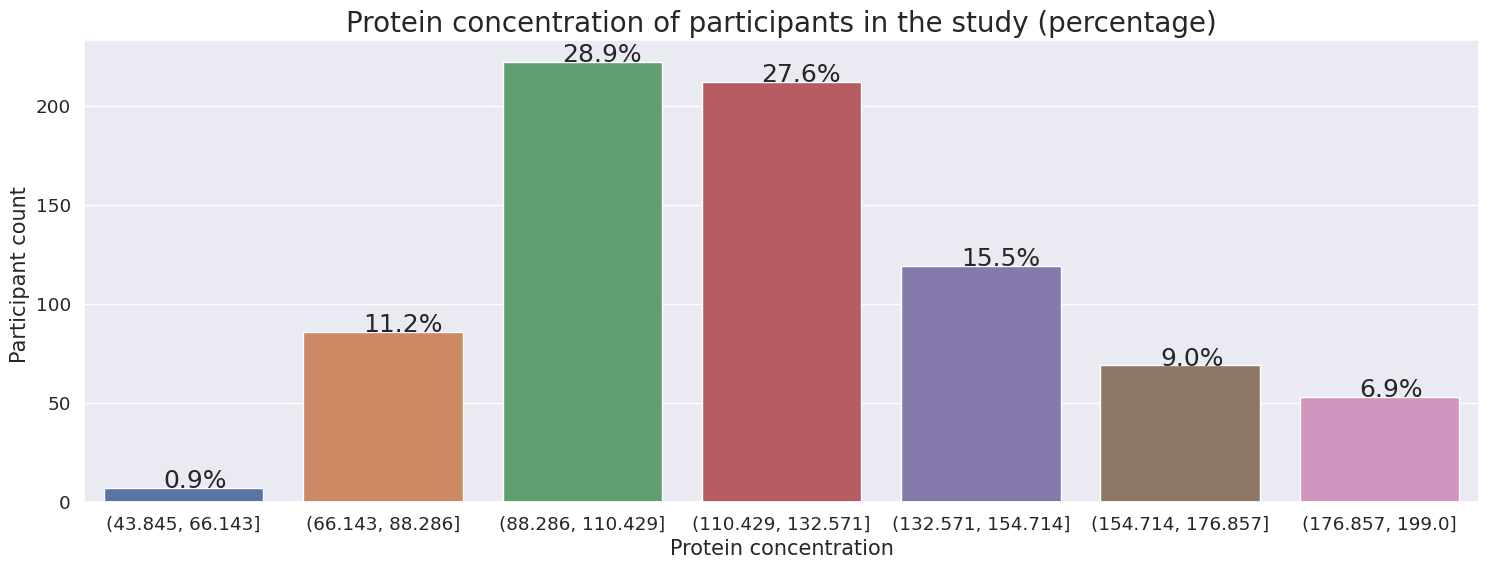

In [ ]:

plt.figure(figsize=(18,6))
sns.set(font_scale=1.2)
ax=sns.countplot(x= protein_conc)
sns.set(font_scale=1.5)
ax.set_title('Protein concentration of participants in the study (percentage)' , fontsize = 20)
plt.xlabel('Protein concentration', fontsize=15)
plt.ylabel('Participant count ', fontsize=15)

plt.xticks(rotation='horizontal')

total = float(len(merged_df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=18)

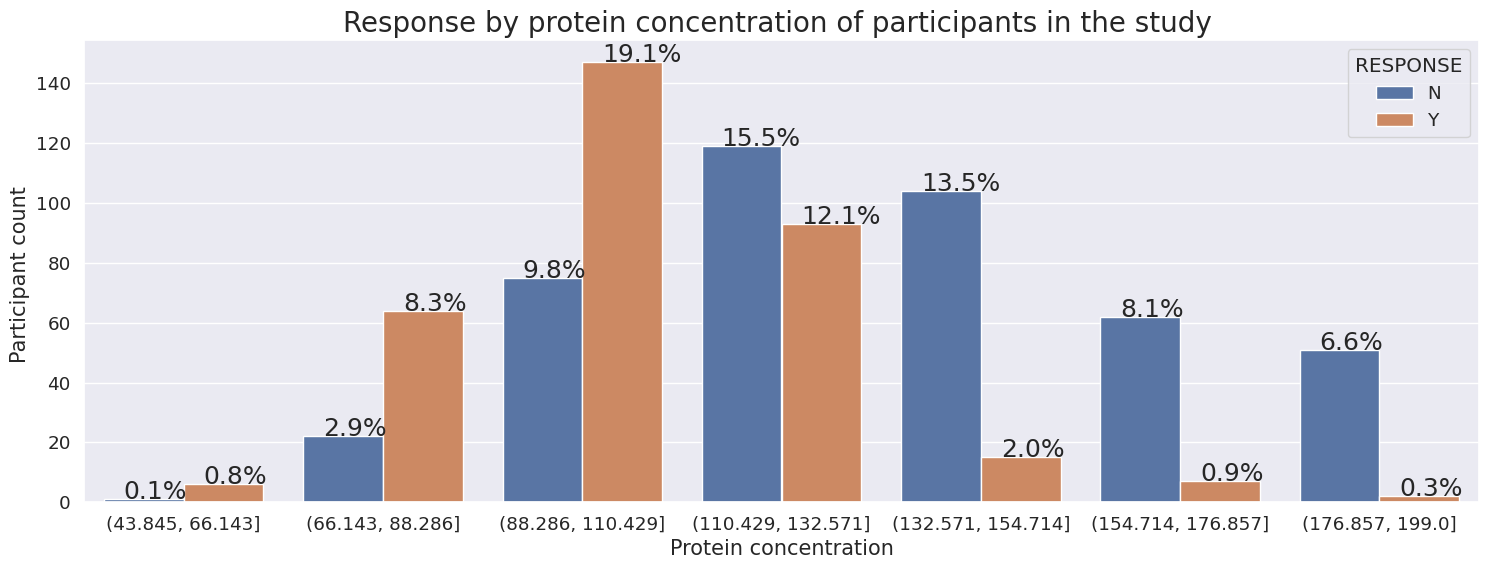

In [ ]:

plt.figure(figsize=(18,6))
sns.set(font_scale=1.2)
ax=sns.countplot(x= protein_conc, hue='RESPONSE', data=merged_df)
sns.set(font_scale=1.5)
ax.set_title('Response by protein concentration of participants in the study ' , fontsize = 20)
plt.xlabel('Protein concentration', fontsize=15)
plt.ylabel('Participant count ', fontsize=15)

plt.xticks(rotation='horizontal')

total = float(len(merged_df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=18)

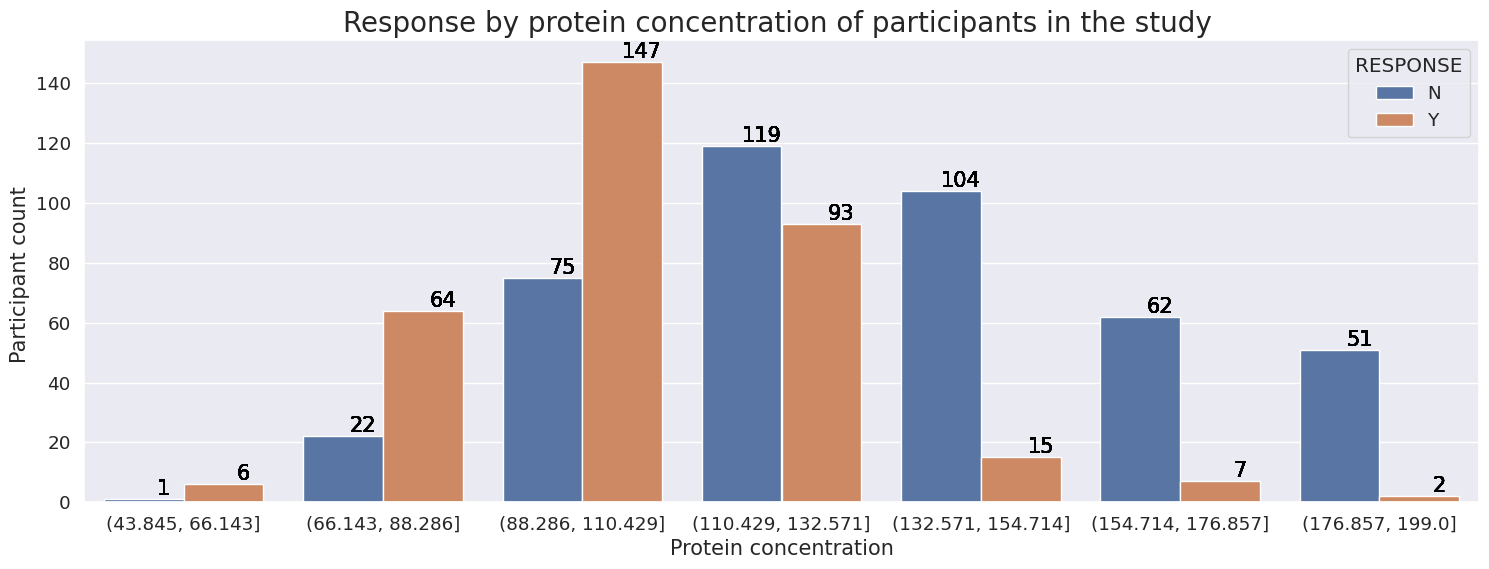

In [ ]:
plt.figure(figsize=(18,6))
sns.set(font_scale=1.2)
ax=sns.countplot(x= protein_conc, hue='RESPONSE', data=merged_df)
ax.set_title('Response by protein concentration of participants in the study ' , fontsize = 20)
plt.xlabel('Protein concentration', fontsize=15)
plt.ylabel('Participant count ', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=15)

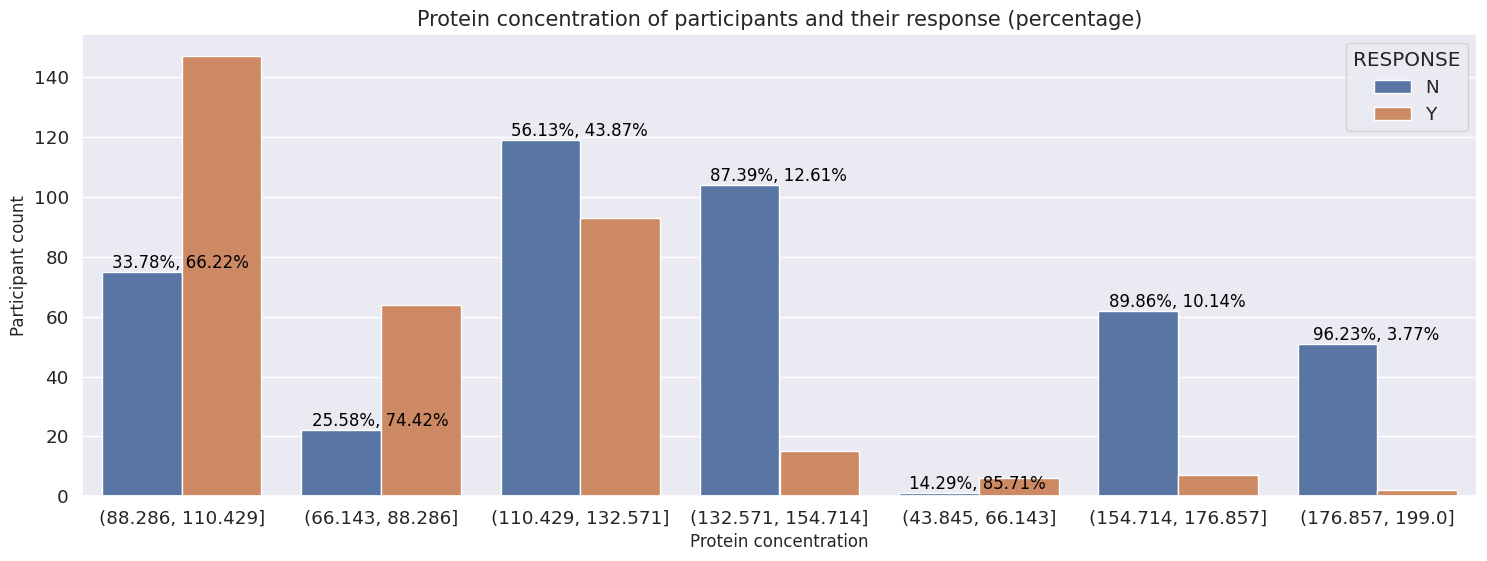

In [ ]:
# Create 7 bins for weight
merged_df['protein_bins'] = pd.cut(merged_df['protein_concentration'], 7)

# Convert bin labels to strings
merged_df['protein_bins'] = merged_df['protein_bins'].astype(str)

# Create countplot
plt.figure(figsize=(18, 6))
sns.set(font_scale=1.2)
ax = sns.countplot(x='protein_bins', hue='RESPONSE', data=merged_df)
ax.set_title('Protein concentration of participants and their response (percentage)', fontsize=15)
plt.xlabel('Protein concentration', fontsize=12)
plt.ylabel('Participant count', fontsize=12)
plt.xticks(rotation='horizontal')

# Annotate plot with percentages
total_counts = merged_df.groupby('protein_bins')['RESPONSE'].count().reset_index(name='count')
response_counts = merged_df.groupby(['protein_bins', 'RESPONSE']).size().reset_index(name='response_count')

for p, label in zip(ax.patches, ax.get_xticklabels()):
    height = p.get_height()
    bin_label = label.get_text()
    bin_counts = response_counts[response_counts['protein_bins'] == bin_label]['response_count']
    total_count = total_counts[total_counts['protein_bins'] == bin_label]['count'].iloc[0]
    percentages = [count / total_count * 100 for count in bin_counts]
    percentage_str = ', '.join([f'{percentage:.2f}%' for percentage in percentages])
    ax.annotate(percentage_str, (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', color='black', size=12,
                xytext=(28, 0), textcoords='offset points') 

plt.show()

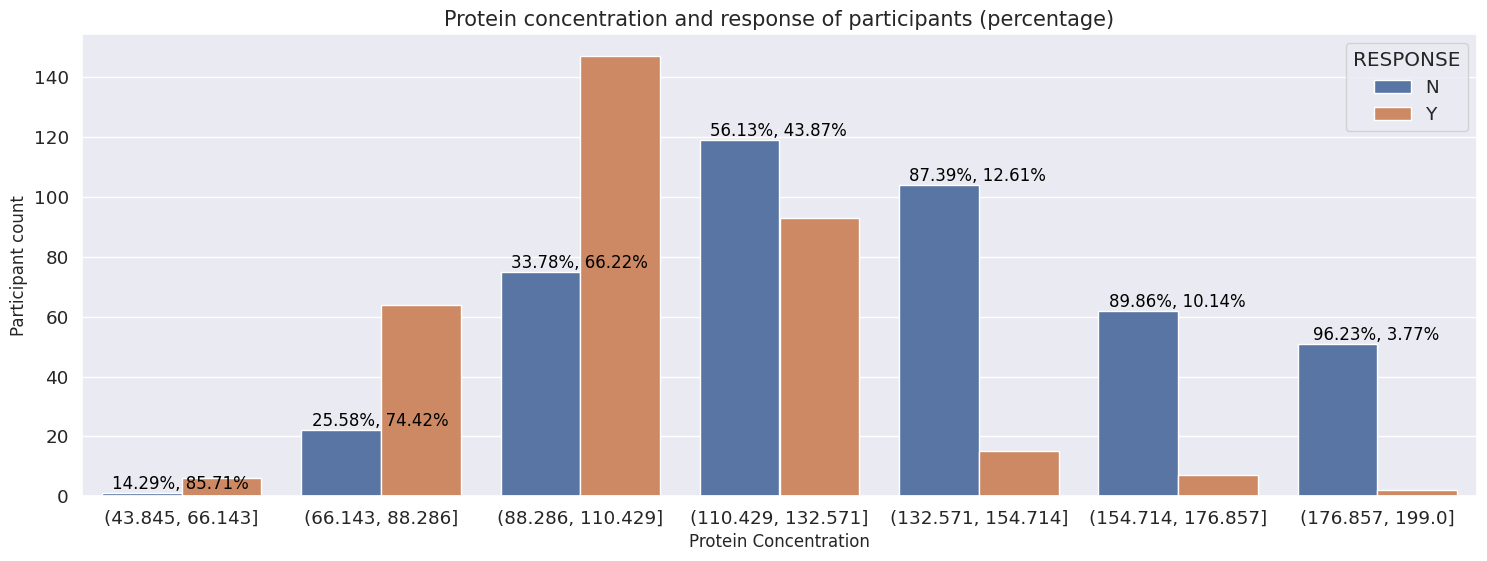

In [ ]:
# Cut protein concentration into bins and specify desired order of levels
prot_bin = pd.cut(merged_df['protein_concentration'], bins=7, ordered=True)
prot_labels = [f'({interval.left}, {interval.right}]' for interval in prot_bin.cat.categories]
merged_df['prot_bins'] = prot_bin.cat.rename_categories(prot_labels )

# Create countplot
plt.figure(figsize=(18, 6))
sns.set(font_scale=1.2)
ax = sns.countplot(x='prot_bins', hue='RESPONSE', data=merged_df)
ax.set_title('Protein concentration and response of participants (percentage)', fontsize=15)
plt.xlabel('Protein Concentration', fontsize=12)
plt.ylabel('Participant count', fontsize=12)
plt.xticks(rotation='horizontal')

# Annotate plot with percentages
total_counts = merged_df.groupby('prot_bins')['RESPONSE'].count().reset_index(name='count')
response_counts = merged_df.groupby(['prot_bins', 'RESPONSE']).size().reset_index(name='response_count')

for p, label in zip(ax.patches, ax.get_xticklabels()):
    height = p.get_height()
    bin_label = label.get_text()
    bin_counts = response_counts[response_counts['prot_bins'] == bin_label]['response_count']
    total_count = total_counts[total_counts['prot_bins'] == bin_label]['count'].iloc[0]
    percentages = [count / total_count * 100 for count in bin_counts]
    percentage_str = ', '.join([f'{percentage:.2f}%' for percentage in percentages])
    ax.annotate(percentage_str, (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', color='black', size=12,
                xytext=(28, 0), textcoords='offset points') 

plt.show()


In [ ]:
# mean protein concentration for responders
mean_prot_resp = merged_df2[merged_df2['RESPONSE'] == 'Y']['protein_concentration'].mean()
mean_prot_resp

104.53704648370363

In [ ]:
# mean protein concentration for non responders
mean_prot_no_resp = merged_df2[merged_df2['RESPONSE'] == 'N']['protein_concentration'].mean()
mean_prot_no_resp

134.88493153994358

# Blood protein concentration is a predictive biomarker. 85.71% of Participants with protein concentration between 43.85(ug/L) and 66.14(ug/L) responded to treatment, while 74.42% of participants with protein concentration within 66.14(ug/L) and 88.29(ug/L) responded to treatment.Those with protein concentration between 88.29(ug/L) and 110.43(ug/L) recorded 66.22% response. Protein concentration above 110.429(ug/L) shows a decline in response to treatment. Generally, protein concentration between 43.85(ug/L) and 110.43(ug/L) indicates positive response to treatment. In addition the mean protein concentration of those that responded to treatment is 104.53(ug/L) while that of non responsive participants is 134.85(ug/L)

In [ ]:
Drug_df = merged_df2[merged_df2['trt_grp']=='DRUG']
control_df = merged_df2[merged_df2['trt_grp']=='CONTROL']

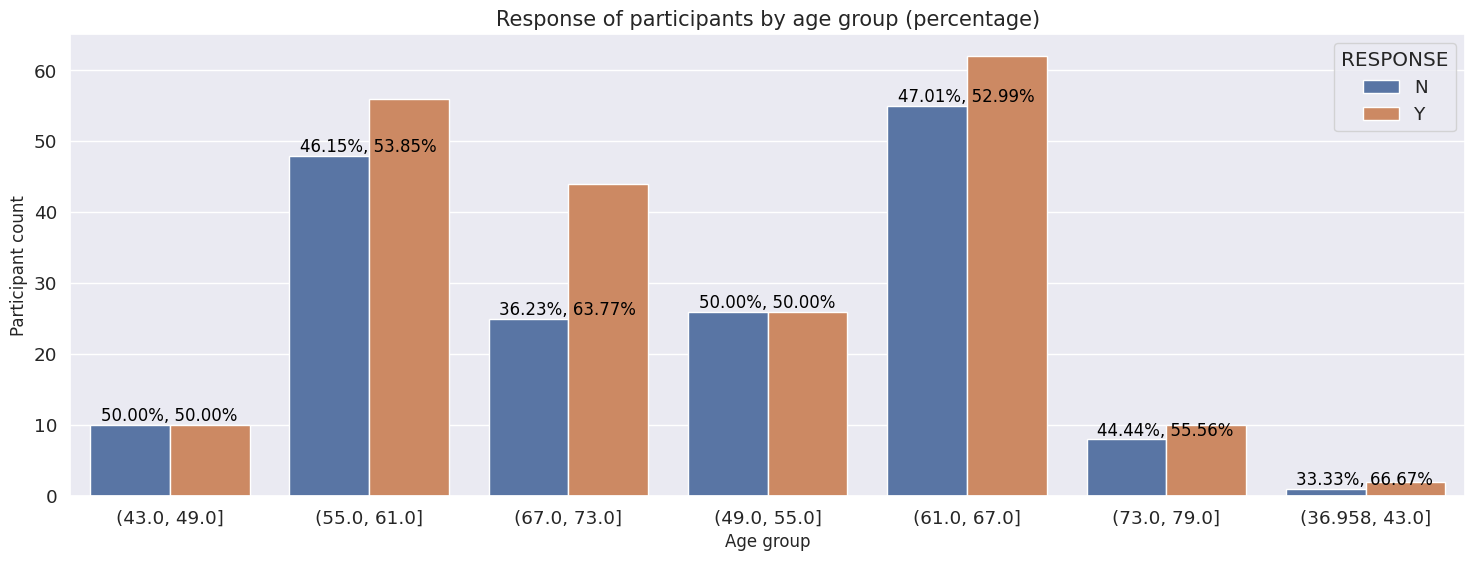

In [ ]:


# Create 7 bins for weight
Drug_df['age_bin'] = pd.cut(Drug_df['age'], 7)

# Convert bin labels to strings
Drug_df['age_bin'] = Drug_df['age_bin'].astype(str)

# Create countplot
plt.figure(figsize=(18, 6))
sns.set(font_scale=1.2)
ax = sns.countplot(x='age_bin', hue='RESPONSE', data=Drug_df)
ax.set_title('Response of participants by age group (percentage)', fontsize=15)
plt.xlabel('Age group', fontsize=12)
plt.ylabel('Participant count', fontsize=12)
plt.xticks(rotation='horizontal')

# Annotate plot with percentages
total_counts = Drug_df.groupby('age_bin')['RESPONSE'].count().reset_index(name='count')
response_counts = Drug_df.groupby(['age_bin', 'RESPONSE']).size().reset_index(name='response_count')

for p, label in zip(ax.patches, ax.get_xticklabels()):
    height = p.get_height()
    bin_label = label.get_text()
    bin_counts = response_counts[response_counts['age_bin'] == bin_label]['response_count']
    total_count = total_counts[total_counts['age_bin'] == bin_label]['count'].iloc[0]
    percentages = [count / total_count * 100 for count in bin_counts]
    percentage_str = ', '.join([f'{percentage:.2f}%' for percentage in percentages])
    ax.annotate(percentage_str, (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', color='black', size=12,
                xytext=(28, 0), textcoords='offset points') 

plt.show()

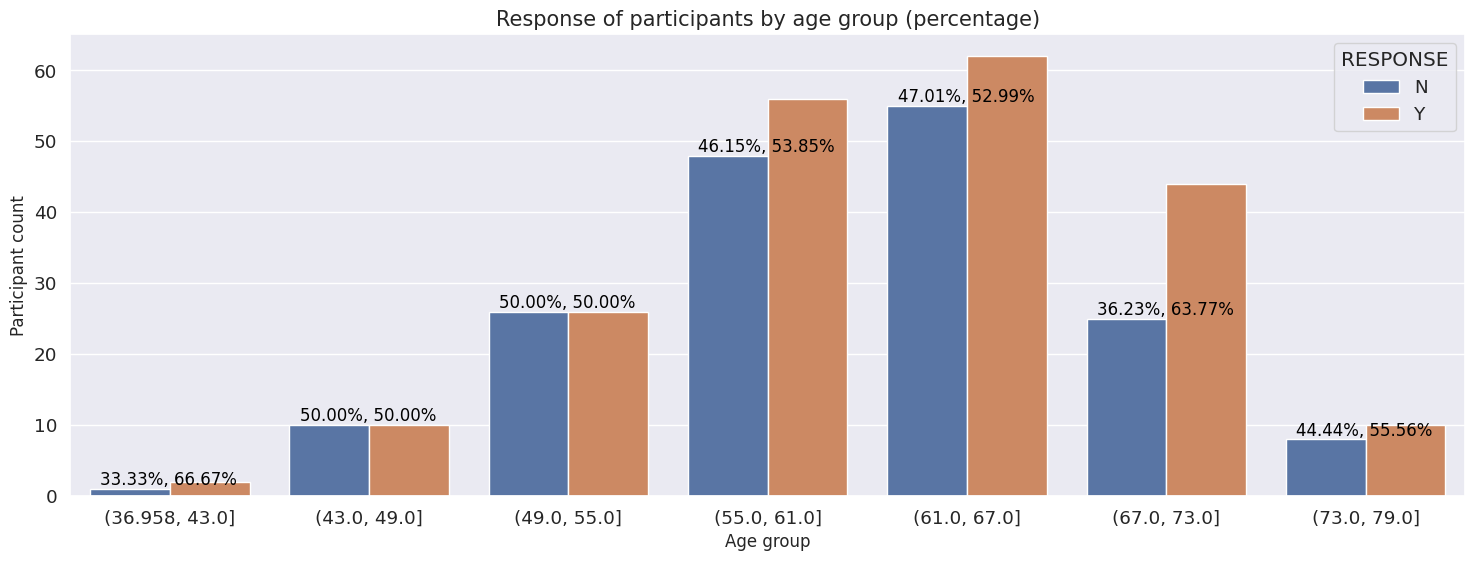

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cut age into bins and specify desired order of levels
age_bins = pd.cut(Drug_df['age'], bins=7, ordered=True)
age_labels = [f'({interval.left}, {interval.right}]' for interval in age_bins.cat.categories]
Drug_df['age_bin'] = age_bins.cat.rename_categories(age_labels)

# Create countplot
plt.figure(figsize=(18, 6))
sns.set(font_scale=1.2)
ax = sns.countplot(x='age_bin', hue='RESPONSE', data=Drug_df)
ax.set_title('Response of participants by age group (percentage)', fontsize=15)
plt.xlabel('Age group', fontsize=12)
plt.ylabel('Participant count', fontsize=12)
plt.xticks(rotation='horizontal')

# Annotate plot with percentages
total_counts = Drug_df.groupby('age_bin')['RESPONSE'].count().reset_index(name='count')
response_counts = Drug_df.groupby(['age_bin', 'RESPONSE']).size().reset_index(name='response_count')

for p, label in zip(ax.patches, ax.get_xticklabels()):
    height = p.get_height()
    bin_label = label.get_text()
    bin_counts = response_counts[response_counts['age_bin'] == bin_label]['response_count']
    total_count = total_counts[total_counts['age_bin'] == bin_label]['count'].iloc[0]
    percentages = [count / total_count * 100 for count in bin_counts]
    percentage_str = ', '.join([f'{percentage:.2f}%' for percentage in percentages])
    ax.annotate(percentage_str, (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', color='black', size=12,
                xytext=(28, 0), textcoords='offset points') 

plt.show()

In [ ]:
control_df.shape

(385, 11)

In [ ]:
Drug_df.shape

(383, 11)

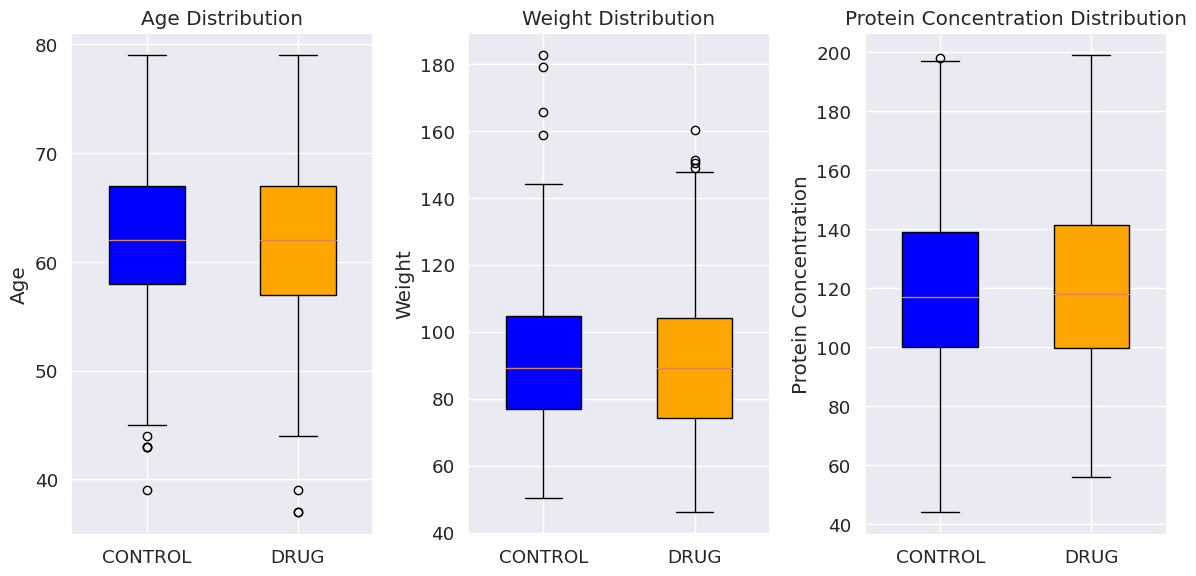

In [ ]:
import matplotlib.pyplot as plt

drug_protein_data = Drug_df['protein_concentration']
drug_age_data = Drug_df['age']
drug_weight_data = Drug_df['weight']

control_weight_data = control_df['weight']
control_age_data = control_df['age']
control_protein_data = control_df['protein_concentration']

fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# Set colors for 'CONTROL' and 'DRUG' box plots
box_colors = ['blue', 'orange']

# Plot the box plots for 'AGE,' 'WEIGHT,' and 'PROTEIN CONCENTRATION' variables
for i, ax in enumerate(axs):
    boxplot_data = [control_age_data, drug_age_data] if i == 0 else [control_weight_data, drug_weight_data] if i == 1 else [control_protein_data, drug_protein_data]
    box = ax.boxplot(boxplot_data, patch_artist=True, widths=0.5)
    ax.set_xticklabels(['CONTROL', 'DRUG'])
    ax.set_ylabel(['Age', 'Weight', 'Protein Concentration'][i])
    ax.set_title(['Age Distribution', 'Weight Distribution', 'Protein Concentration Distribution'][i])
    
    # Set colors for the boxes
    for patch, color in zip(box['boxes'], box_colors):
        patch.set_facecolor(color)
        patch.set_edgecolor('black')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
# Check the response of participants to the new drug bases on each features

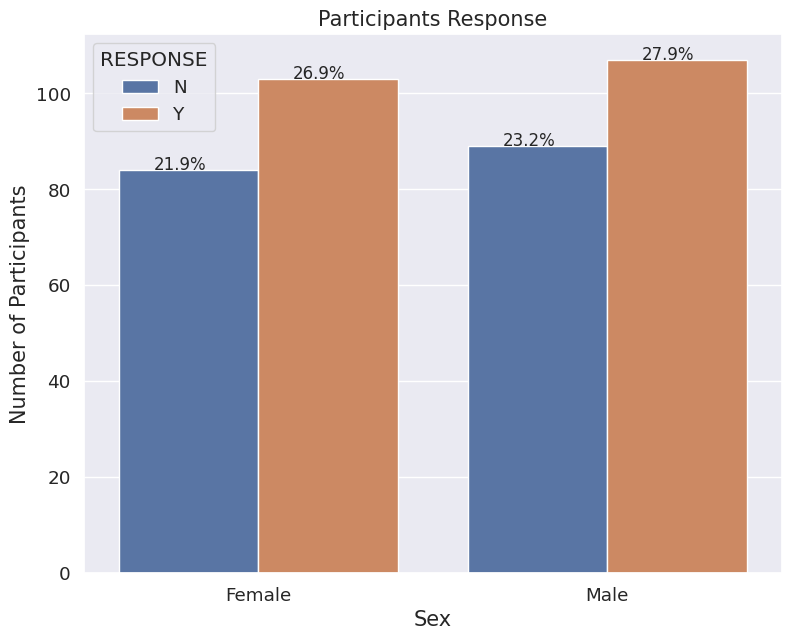

In [ ]:
plt.figure(figsize=(9,7))
ax=sns.countplot(x='sex', hue='RESPONSE', data=Drug_df)
ax.set_title('Participants Response' , fontsize = 15)
sns.set(font_scale=1.2)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Number of Participants', fontsize=15)
plt.xticks(rotation='horizontal')

total = float(len(Drug_df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12)

# Sex does not determine response to treatment

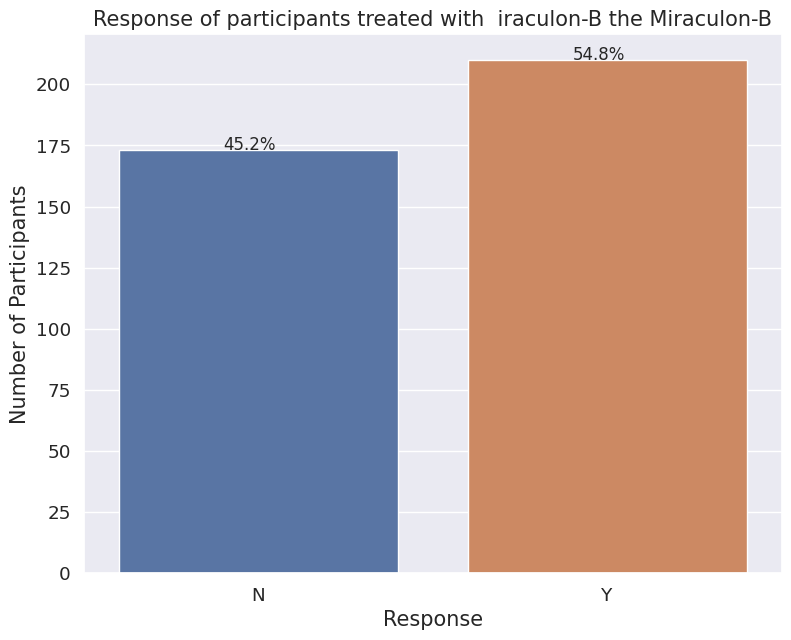

In [ ]:
plt.figure(figsize=(9,7))
ax=sns.countplot(x='RESPONSE', data=Drug_df)
ax.set_title('Response of participants treated with  iraculon-B the Miraculon-B' , fontsize = 15)
sns.set(font_scale=1.2)
plt.xlabel('Response', fontsize=15)
plt.ylabel('Number of Participants', fontsize=15)
plt.xticks(rotation='horizontal')

total = float(len(Drug_df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12)

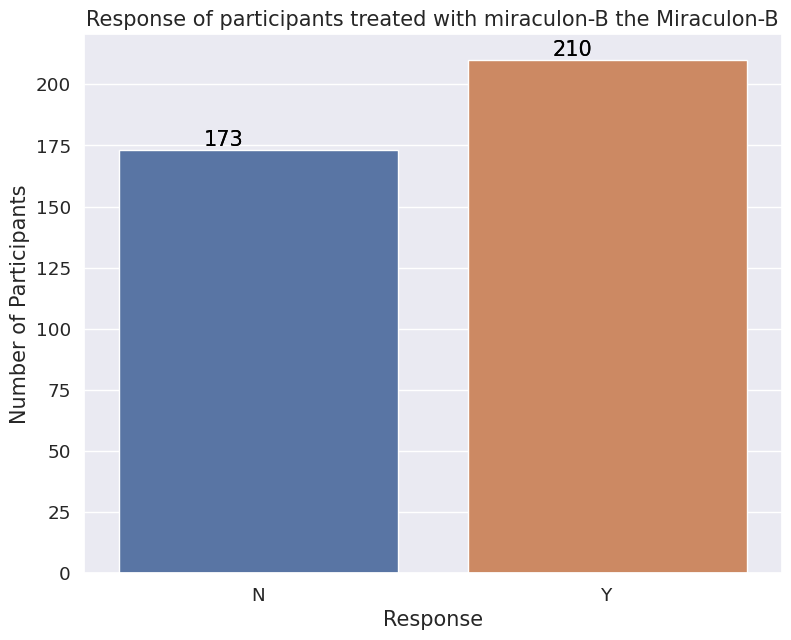

In [ ]:
plt.figure(figsize=(9,7))
ax=sns.countplot(x='RESPONSE', data=Drug_df)
ax.set_title('Response of participants treated with miraculon-B the Miraculon-B' , fontsize = 15)
sns.set(font_scale=1.2)
plt.xlabel('Response', fontsize=15)
plt.ylabel('Number of Participants', fontsize=15)
plt.xticks(rotation='horizontal')

for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=15)

# Miraculon-B recorded 54.8% response rate compared to 32% response rate with the standard care

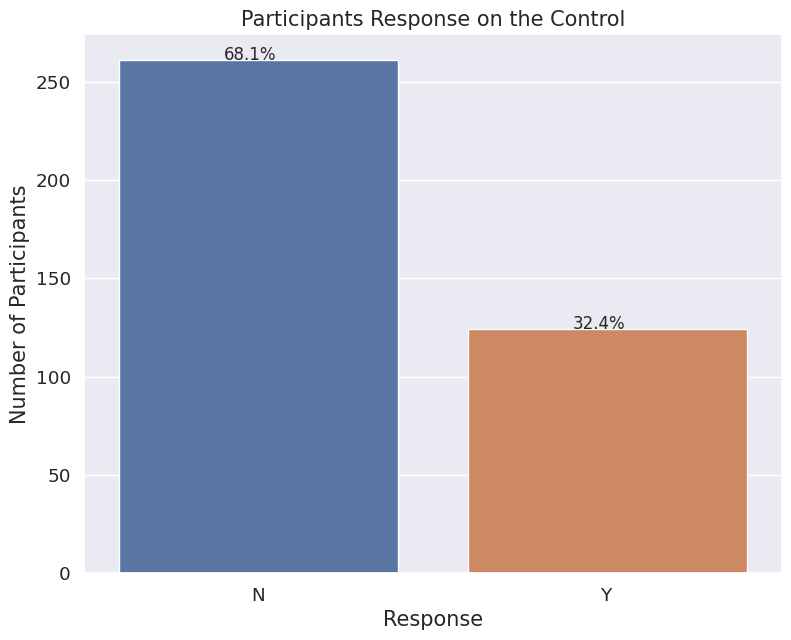

In [ ]:
plt.figure(figsize=(9,7))
ax=sns.countplot(x='RESPONSE', data=control_df)
ax.set_title('Participants Response on the Control' , fontsize = 15)
sns.set(font_scale=1.2)
plt.xlabel('Response', fontsize=15)
plt.ylabel('Number of Participants', fontsize=15)
plt.xticks(rotation='horizontal')

total = float(len(Drug_df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12)

In [ ]:
drug_female = Drug_df[Drug_df["sex"]=='Female']

In [ ]:
# Drug for different categories of sex
drug_male = Drug_df[Drug_df["sex"]=='Male']

In [ ]:
drug_female.shape

(187, 11)

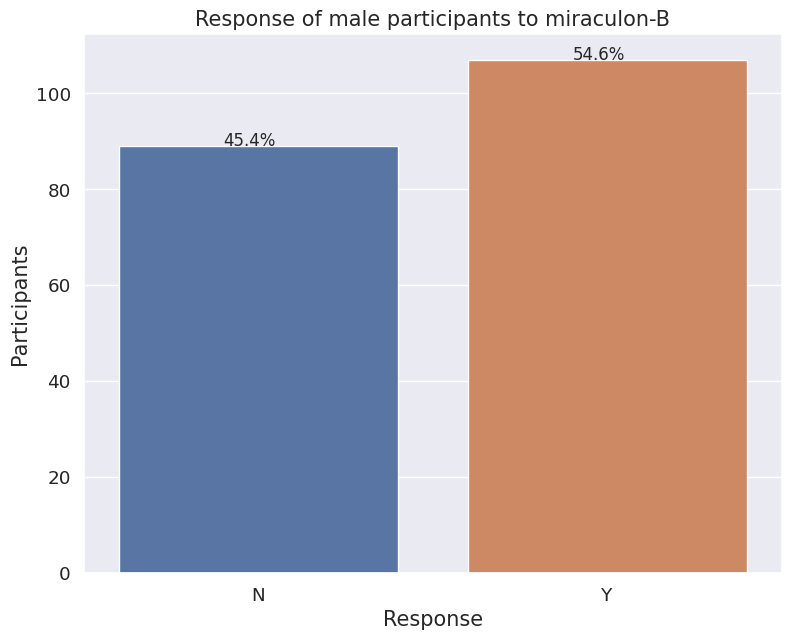

In [ ]:
plt.figure(figsize=(9,7))
ax=sns.countplot(x='RESPONSE', data=drug_male)
ax.set_title('Response of male participants to miraculon-B' , fontsize = 15)
sns.set(font_scale=1.2)
plt.xlabel('Response', fontsize=15)
plt.ylabel('Participants', fontsize=15)
plt.xticks(rotation='horizontal')

total = float(len(drug_male))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12)

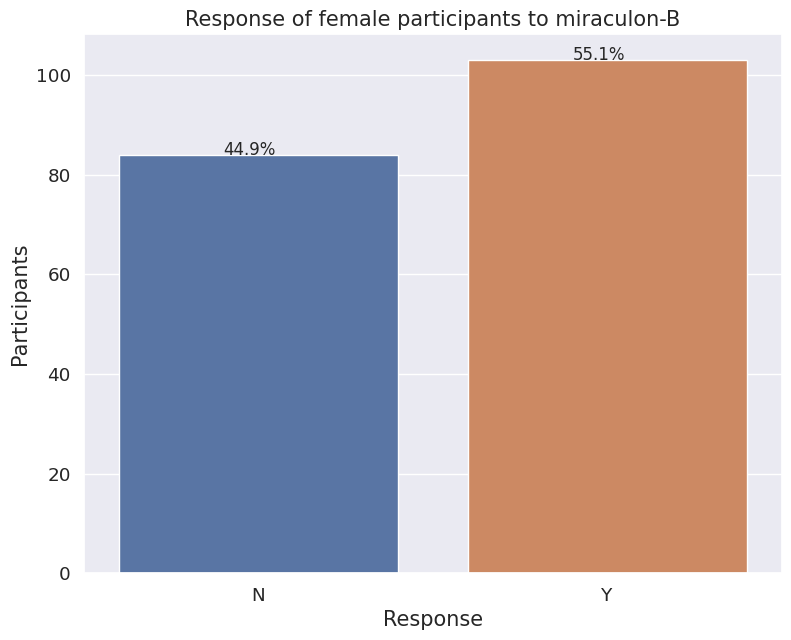

In [ ]:
plt.figure(figsize=(9,7))
ax=sns.countplot(x='RESPONSE', data=drug_female)
ax.set_title('Response of female participants to miraculon-B' , fontsize = 15)
sns.set(font_scale=1.2)
plt.xlabel('Response', fontsize=15)
plt.ylabel('Participants', fontsize=15)
plt.xticks(rotation='horizontal')

total = float(len(drug_female))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12)

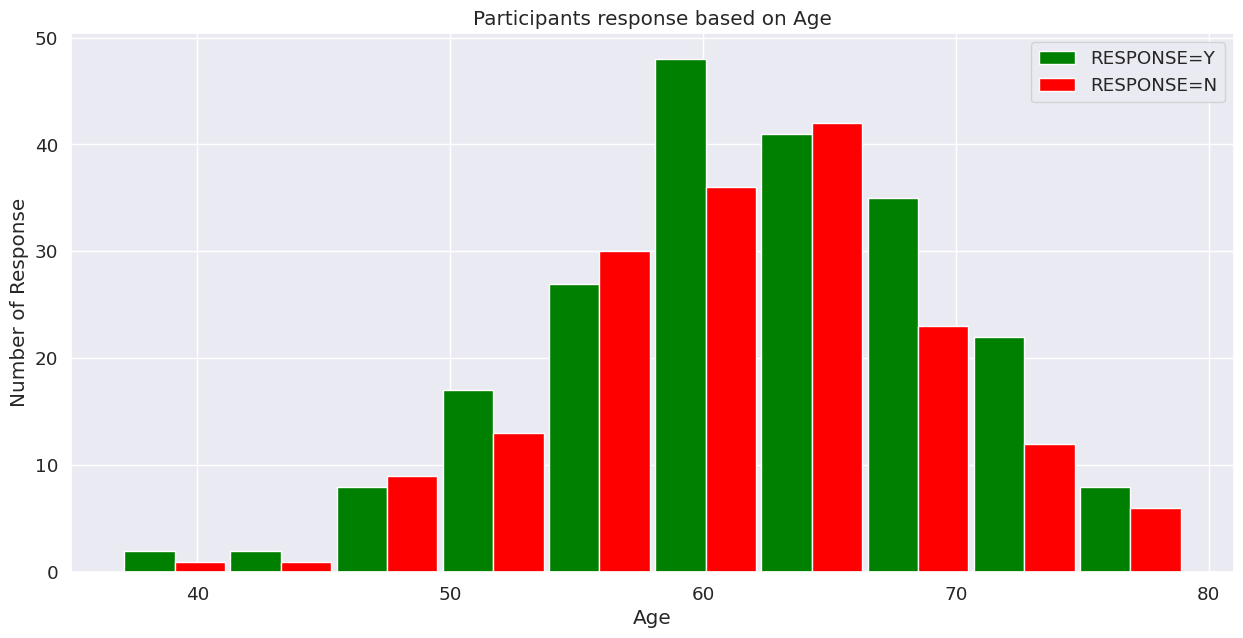

In [ ]:
# using Age
plt.figure(figsize=(15,7))
age_resp_Y = Drug_df[Drug_df.RESPONSE=='Y'].age
age_resp_N = Drug_df[Drug_df.RESPONSE=='N'].age

plt.xlabel('Age')
plt.ylabel('Number of Response')
plt.title('Participants response based on Age')

plt.hist([age_resp_Y, age_resp_N], rwidth= 0.95, color =['green', 'red'], label = ['RESPONSE=Y', 'RESPONSE=N'])
plt.legend()

In [ ]:
#  Age
Drug_df.describe()

age      weight      height         BMI  protein_concentration
count  383.000000  383.000000  383.000000  383.000000             383.000000
mean    61.759791   90.844100    1.682742   31.992628             122.077669
std      7.565750   22.465539    0.097062    7.161227              30.183344
min     37.000000   46.170000    1.430000   17.975421              56.000000
25%     57.000000   74.340000    1.610000   26.704177              99.500000
50%     62.000000   89.220000    1.680000   31.678201             118.000000
75%     67.000000  104.135000    1.760000   36.318756             141.500000
max     79.000000  160.120000    1.940000   67.515601             199.000000

In [ ]:
# To put the ages in bins
age_bin = pd.cut(Drug_df['age'], 7)


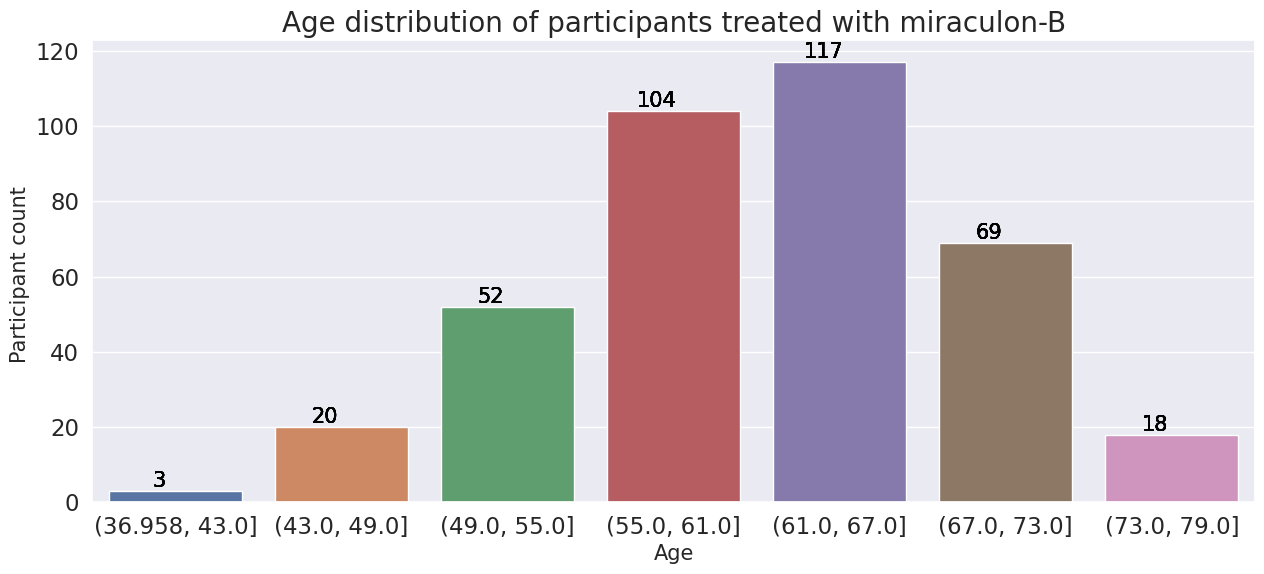

In [ ]:

plt.figure(figsize=(15,6))
sns.set(font_scale=1.5)
ax=sns.countplot(x=age_bin)
ax.set_title('Age distribution of participants treated with miraculon-B' , fontsize = 20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Participant count ', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=15)

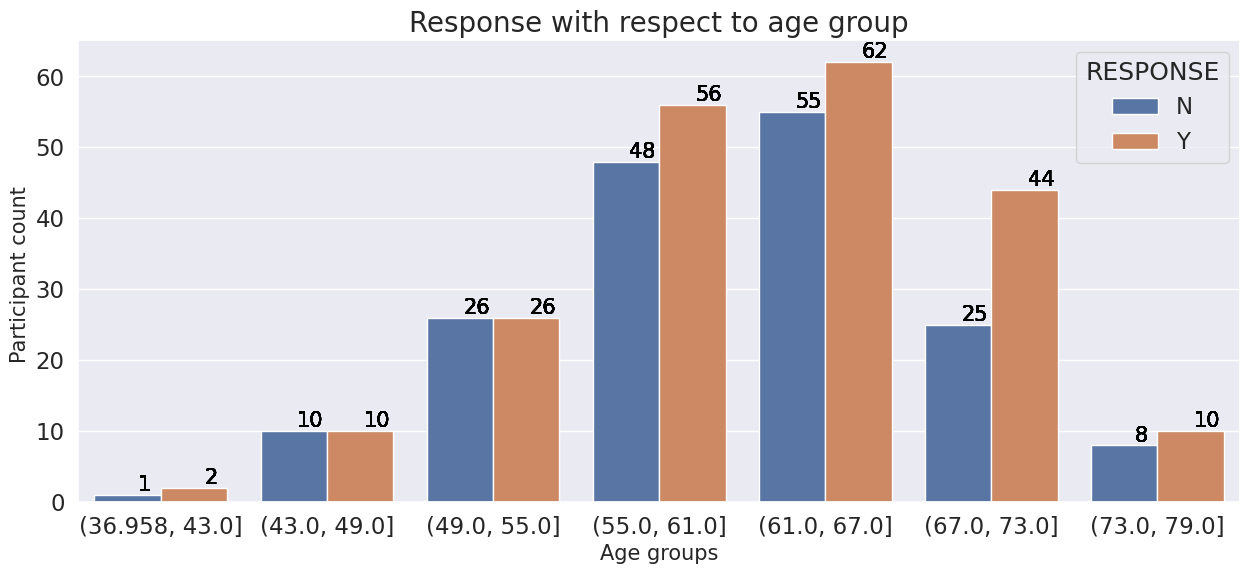

In [ ]:
plt.figure(figsize=(15,6))
sns.set(font_scale=1.5)
ax=sns.countplot(x=age_bin, hue='RESPONSE', data=Drug_df)
ax.set_title('Response with respect to age group' , fontsize = 20)
plt.xlabel('Age groups', fontsize=15)
plt.ylabel('Participant count ', fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=15)

In [ ]:
# SORTED

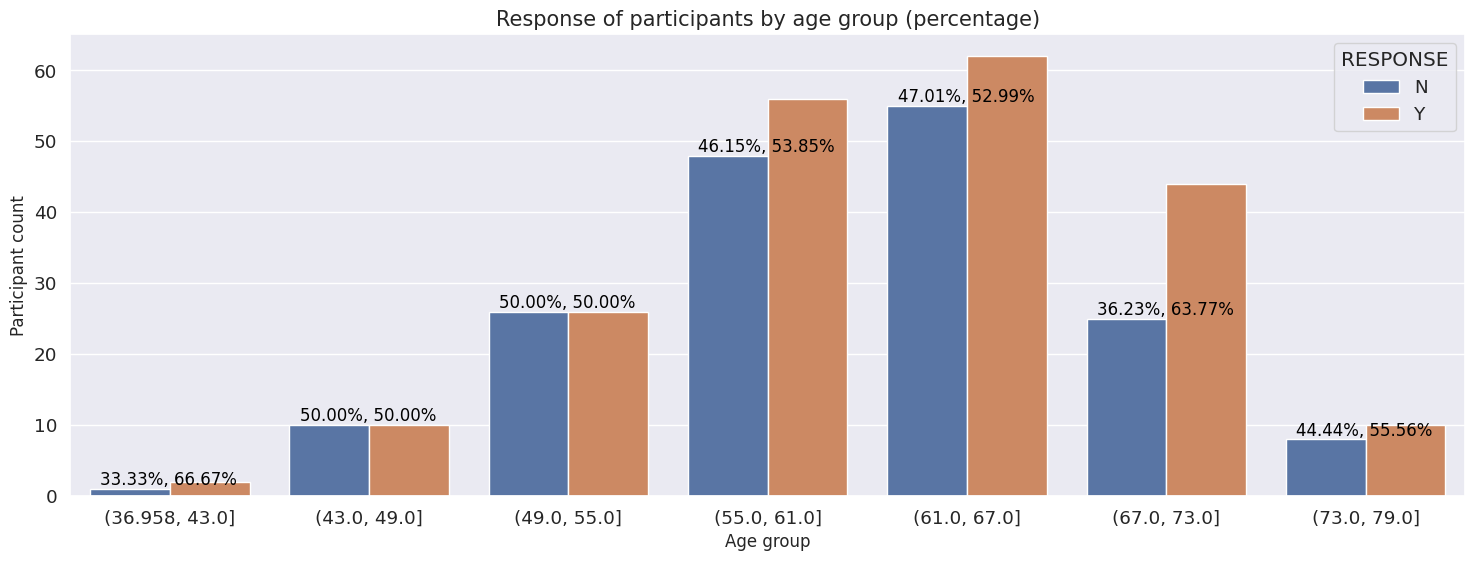

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cut age into bins and specify desired order of levels
age_bins = pd.cut(Drug_df['age'], bins=7, ordered=True)
age_labels = [f'({interval.left}, {interval.right}]' for interval in age_bins.cat.categories]
Drug_df['age_bin'] = age_bins.cat.rename_categories(age_labels)

# Create countplot
plt.figure(figsize=(18, 6))
sns.set(font_scale=1.2)
ax = sns.countplot(x='age_bin', hue='RESPONSE', data=Drug_df)
ax.set_title('Response of participants by age group (percentage)', fontsize=15)
plt.xlabel('Age group', fontsize=12)
plt.ylabel('Participant count', fontsize=12)
plt.xticks(rotation='horizontal')

# Annotate plot with percentages
total_counts = Drug_df.groupby('age_bin')['RESPONSE'].count().reset_index(name='count')
response_counts = Drug_df.groupby(['age_bin', 'RESPONSE']).size().reset_index(name='response_count')

for p, label in zip(ax.patches, ax.get_xticklabels()):
    height = p.get_height()
    bin_label = label.get_text()
    bin_counts = response_counts[response_counts['age_bin'] == bin_label]['response_count']
    total_count = total_counts[total_counts['age_bin'] == bin_label]['count'].iloc[0]
    percentages = [count / total_count * 100 for count in bin_counts]
    percentage_str = ', '.join([f'{percentage:.2f}%' for percentage in percentages])
    ax.annotate(percentage_str, (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', color='black', size=12,
                xytext=(28, 0), textcoords='offset points') 

plt.show()



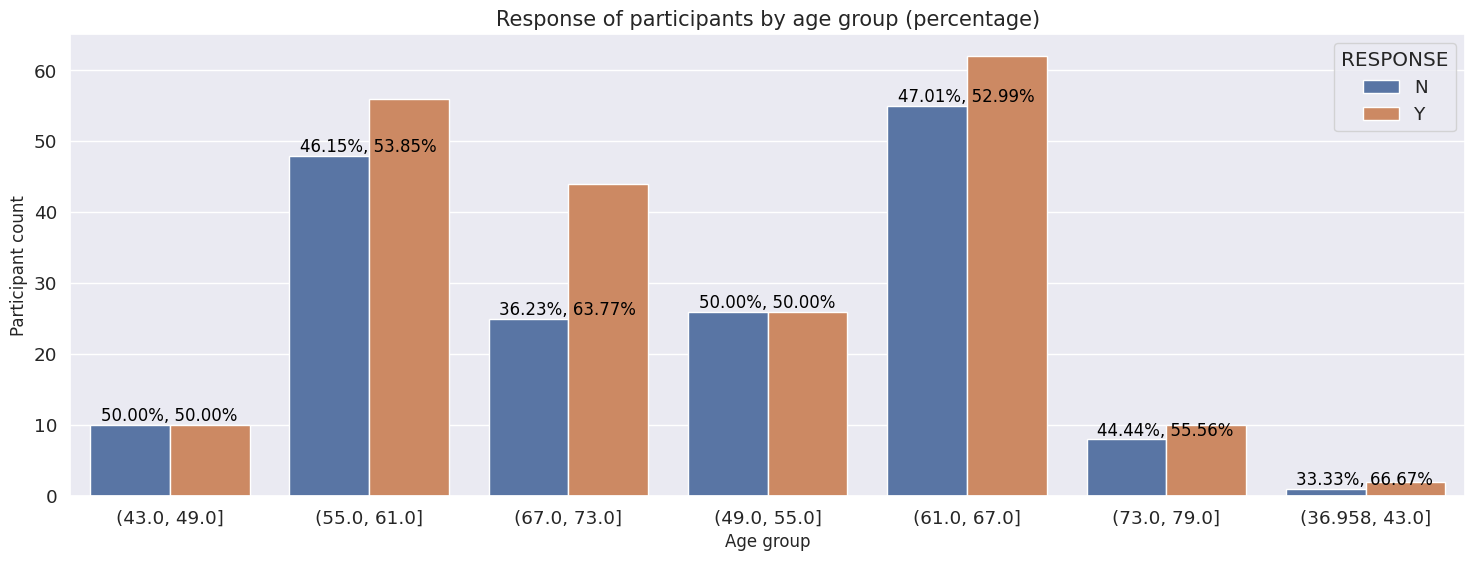

In [ ]:


Drug_df['age_bin'] = pd.cut(Drug_df['age'], 7)

# Convert bin labels to strings
Drug_df['age_bin'] = Drug_df['age_bin'].astype(str)

# Create countplot
plt.figure(figsize=(18, 6))
sns.set(font_scale=1.2)
ax = sns.countplot(x='age_bin', hue='RESPONSE', data=Drug_df)
ax.set_title('Response of participants by age group (percentage)', fontsize=15)
plt.xlabel('Age group', fontsize=12)
plt.ylabel('Participant count', fontsize=12)
plt.xticks(rotation='horizontal')

# Annotate plot with percentages
total_counts = Drug_df.groupby('age_bin')['RESPONSE'].count().reset_index(name='count')
response_counts = Drug_df.groupby(['age_bin', 'RESPONSE']).size().reset_index(name='response_count')

for p, label in zip(ax.patches, ax.get_xticklabels()):
    height = p.get_height()
    bin_label = label.get_text()
    bin_counts = response_counts[response_counts['age_bin'] == bin_label]['response_count']
    total_count = total_counts[total_counts['age_bin'] == bin_label]['count'].iloc[0]
    percentages = [count / total_count * 100 for count in bin_counts]
    percentage_str = ', '.join([f'{percentage:.2f}%' for percentage in percentages])
    ax.annotate(percentage_str, (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', color='black', size=12,
                xytext=(28, 0), textcoords='offset points') 

plt.show()


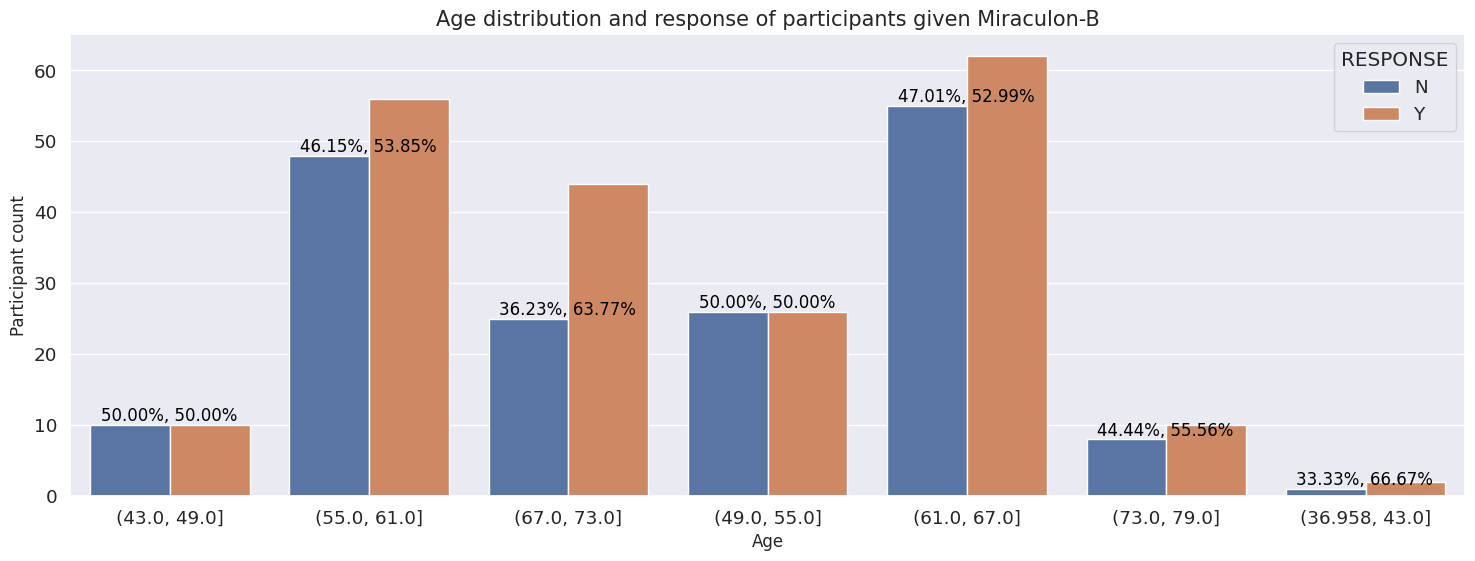

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Drug_df['age_bins'] = pd.cut(Drug_df['age'], 7)

# Convert bin labels to strings
Drug_df['age_bins'] = Drug_df['age_bins'].astype(str)

# Create countplot
plt.figure(figsize=(18, 6))
sns.set(font_scale=1.2)
ax = sns.countplot(x='age_bins', hue='RESPONSE', data=Drug_df)
ax.set_title('Age distribution and response of participants given Miraculon-B', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Participant count', fontsize=12)
plt.xticks(rotation='horizontal')

# Annotate plot with percentages
total_counts = Drug_df.groupby('age_bins')['RESPONSE'].count().reset_index(name='count')
response_counts = Drug_df.groupby(['age_bins', 'RESPONSE']).size().reset_index(name='response_count')

for p, label in zip(ax.patches, ax.get_xticklabels()):
    height = p.get_height()
    bin_label = label.get_text()
    bin_counts = response_counts[response_counts['age_bins'] == bin_label]['response_count']
    total_count = total_counts[total_counts['age_bins'] == bin_label]['count'].iloc[0]
    percentages = [count / total_count * 100 for count in bin_counts]
    percentage_str = ', '.join([f'{percentage:.2f}%' for percentage in percentages])
    ax.annotate(percentage_str, (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', color='black', size=12,
                xytext=(28, 0), textcoords='offset points')

plt.show()

In [ ]:
# Mean age of participants treated with miraculon-B and responded
mean_age_Mira_resp = Drug_df[Drug_df['RESPONSE'] == 'Y']['age'].mean()
mean_age_Mira_resp

62.13333333333333

In [ ]:
# Mean age of participants treated with miraculon-B but did not respond
mean_age_Mira_noresp = Drug_df[Drug_df['RESPONSE'] == 'N']['age'].mean()
mean_age_Mira_noresp

61.30635838150289

# For participants that were treated with miraculon-B, the mean age is about the same. 62 for those that responded and 61 for those that did not respond. Although, age is not a significant determinant of response, 63.77% of participants within the age bracket of 67 and 73 responded to treatment.

In [ ]:
# Participants within the age group of 67 and 73 shows better response. 63% of participants in this category responsed positively to Miracolun-B

In [ ]:
# To put the weight in bins
weight_bin = pd.cut(Drug_df['weight'], 6)


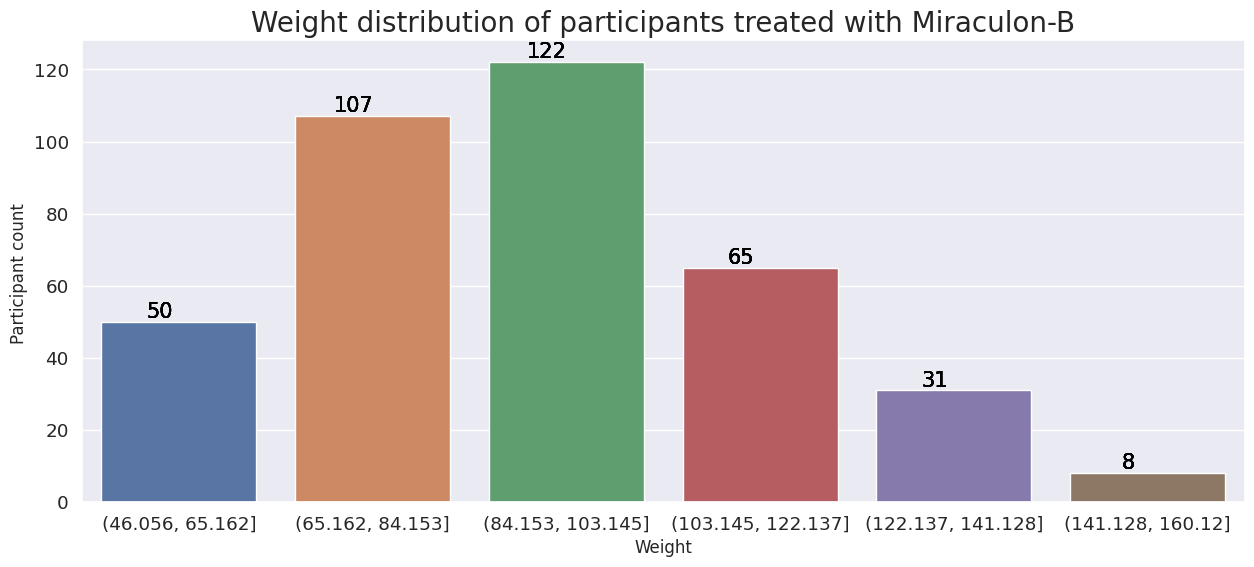

In [ ]:

plt.figure(figsize=(15,6))
sns.set(font_scale=1.2)
ax=sns.countplot(x=weight_bin)
ax.set_title('Weight distribution of participants treated with Miraculon-B' , fontsize = 20)
plt.xlabel('Weight', fontsize=12)
plt.ylabel('Participant count ', fontsize=12)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=15)

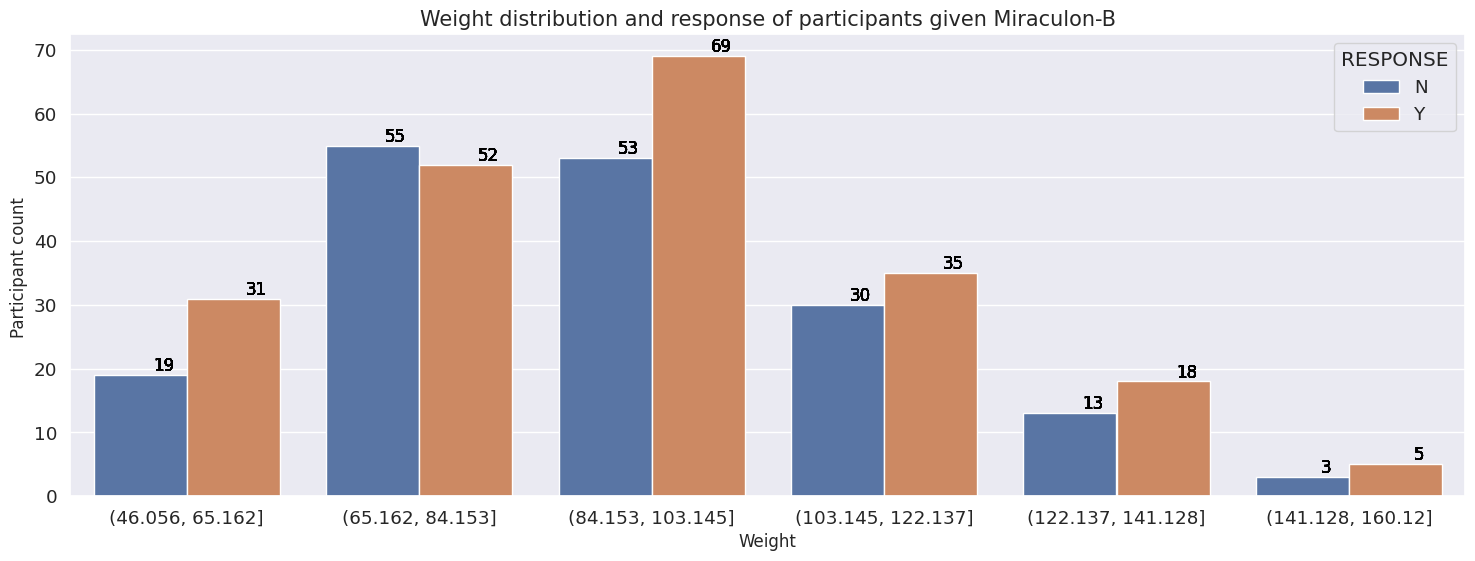

In [ ]:
plt.figure(figsize=(18,6))
sns.set(font_scale=1.2)
ax=sns.countplot(x=weight_bin, hue='RESPONSE', data=Drug_df)
ax.set_title('Weight distribution and response of participants given Miraculon-B' , fontsize = 15)
plt.xlabel('Weight', fontsize=12)
plt.ylabel('Participant count ', fontsize=12)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=12)

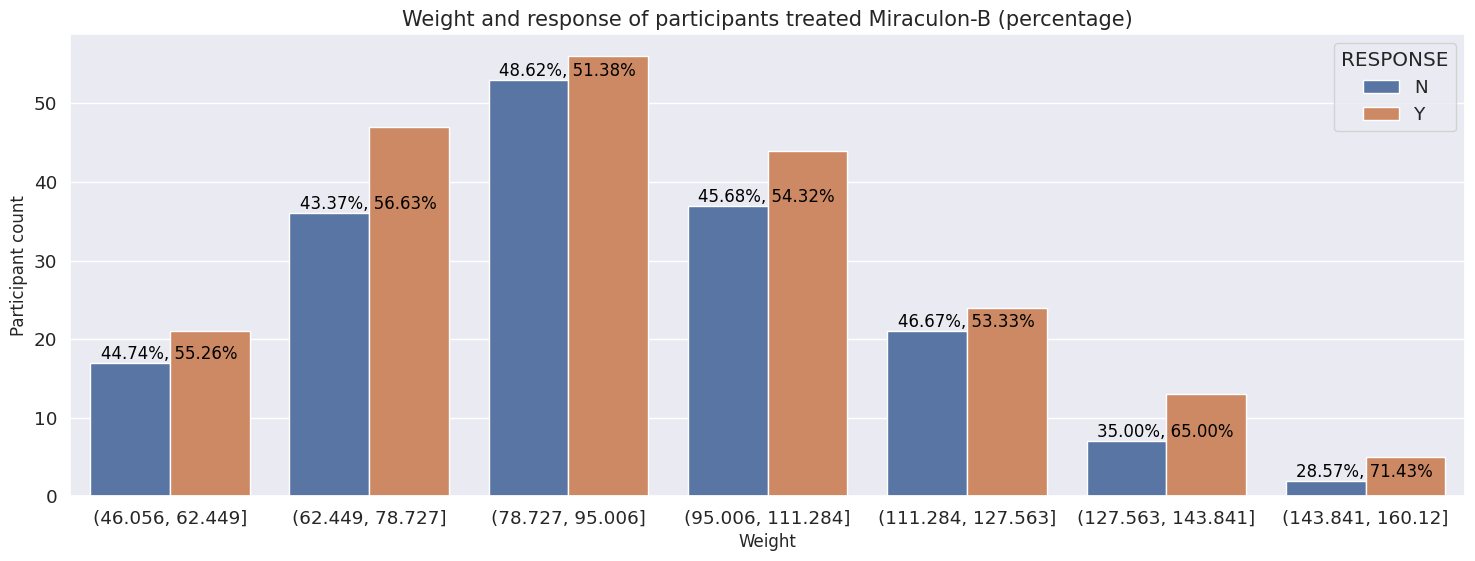

In [ ]:
# Cut weight into bins and specify desired order of levels
wt_bin = pd.cut(Drug_df['weight'], bins=7, ordered=True)
wt_labels = [f'({interval.left}, {interval.right}]' for interval in wt_bin.cat.categories]
Drug_df['wt_bins'] = wt_bin.cat.rename_categories(wt_labels )

# Create countplot
plt.figure(figsize=(18, 6))
sns.set(font_scale=1.2)
ax = sns.countplot(x='wt_bins', hue='RESPONSE', data=Drug_df)
ax.set_title('Weight and response of participants treated Miraculon-B (percentage)', fontsize=15)
plt.xlabel('Weight', fontsize=12)
plt.ylabel('Participant count', fontsize=12)
plt.xticks(rotation='horizontal')

# Annotate plot with percentages
total_counts = Drug_df.groupby('wt_bins')['RESPONSE'].count().reset_index(name='count')
response_counts = Drug_df.groupby(['wt_bins', 'RESPONSE']).size().reset_index(name='response_count')

for p, label in zip(ax.patches, ax.get_xticklabels()):
    height = p.get_height()
    bin_label = label.get_text()
    bin_counts = response_counts[response_counts['wt_bins'] == bin_label]['response_count']
    total_count = total_counts[total_counts['wt_bins'] == bin_label]['count'].iloc[0]
    percentages = [count / total_count * 100 for count in bin_counts]
    percentage_str = ', '.join([f'{percentage:.2f}%' for percentage in percentages])
    ax.annotate(percentage_str, (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', color='black', size=12,
                xytext=(28, 0), textcoords='offset points') 

plt.show()



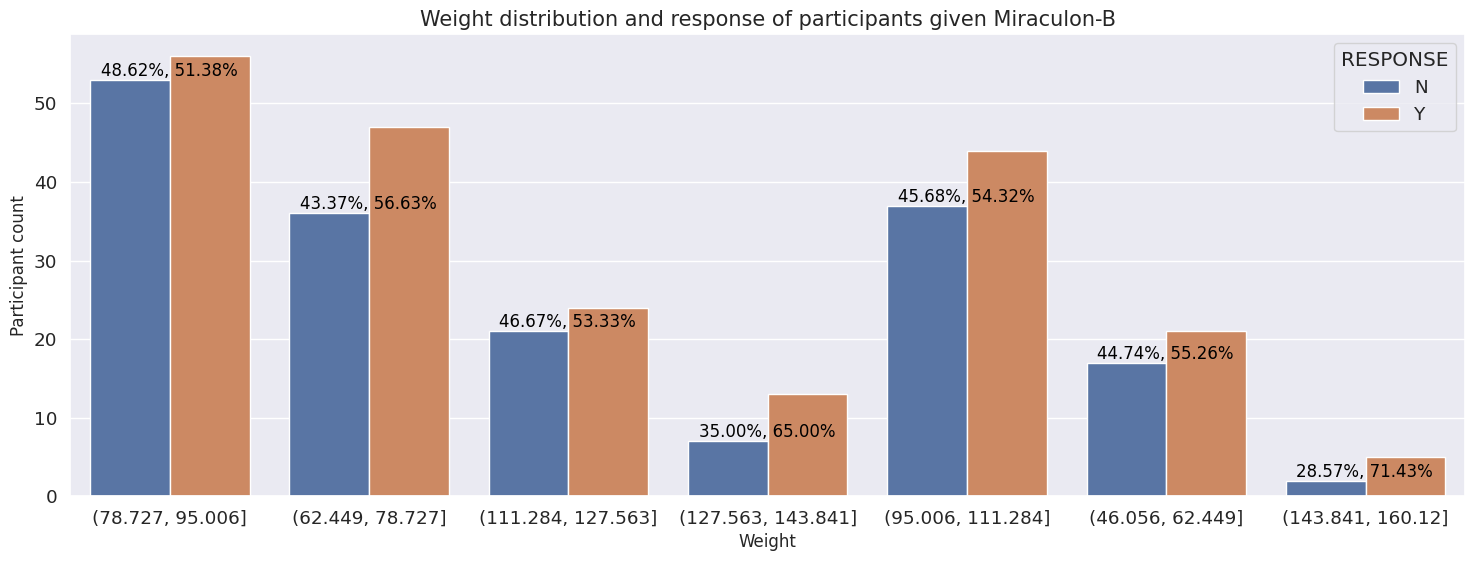

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create 7 bins for weight
Drug_df['weight_bin'] = pd.cut(Drug_df['weight'], 7)

# Convert bin labels to strings
Drug_df['weight_bin'] = Drug_df['weight_bin'].astype(str)

# Create countplot
plt.figure(figsize=(18, 6))
sns.set(font_scale=1.2)
ax = sns.countplot(x='weight_bin', hue='RESPONSE', data=Drug_df)
ax.set_title('Weight distribution and response of participants given Miraculon-B', fontsize=15)
plt.xlabel('Weight', fontsize=12)
plt.ylabel('Participant count', fontsize=12)
plt.xticks(rotation='horizontal')

# Annotate plot with percentages
total_counts = Drug_df.groupby('weight_bin')['RESPONSE'].count().reset_index(name='count')
response_counts = Drug_df.groupby(['weight_bin', 'RESPONSE']).size().reset_index(name='response_count')

for p, label in zip(ax.patches, ax.get_xticklabels()):
    height = p.get_height()
    bin_label = label.get_text()
    bin_counts = response_counts[response_counts['weight_bin'] == bin_label]['response_count']
    total_count = total_counts[total_counts['weight_bin'] == bin_label]['count'].iloc[0]
    percentages = [count / total_count * 100 for count in bin_counts]
    percentage_str = ', '.join([f'{percentage:.2f}%' for percentage in percentages])
    ax.annotate(percentage_str, (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', color='black', size=12,
                xytext=(28, 0), textcoords='offset points')  

plt.show()


In [ ]:
# Mean weight of participants treated with miraculon-B and responded
mean_wt_Mira_resp = Drug_df[Drug_df['RESPONSE'] == 'Y']['weight'].mean()
mean_wt_Mira_resp

91.39288173869285

In [ ]:
# Mean weight of participants treated with miraculon-B but did not respond
mean_wt_Mira_noresp = Drug_df[Drug_df['RESPONSE'] == 'N']['weight'].mean()
mean_wt_Mira_noresp

90.17794893136126

# Weight does not affect the outcome of treatment with miraculon-B. The mean weight for participants that responded to treated with miraculon-B and those that did not respond is 91.39 and 90.18 respectively.

In [ ]:
Drug_df = merged_df2[merged_df2['trt_grp']=='DRUG']
control_df = merged_df2[merged_df2['trt_grp']=='CONTROL']

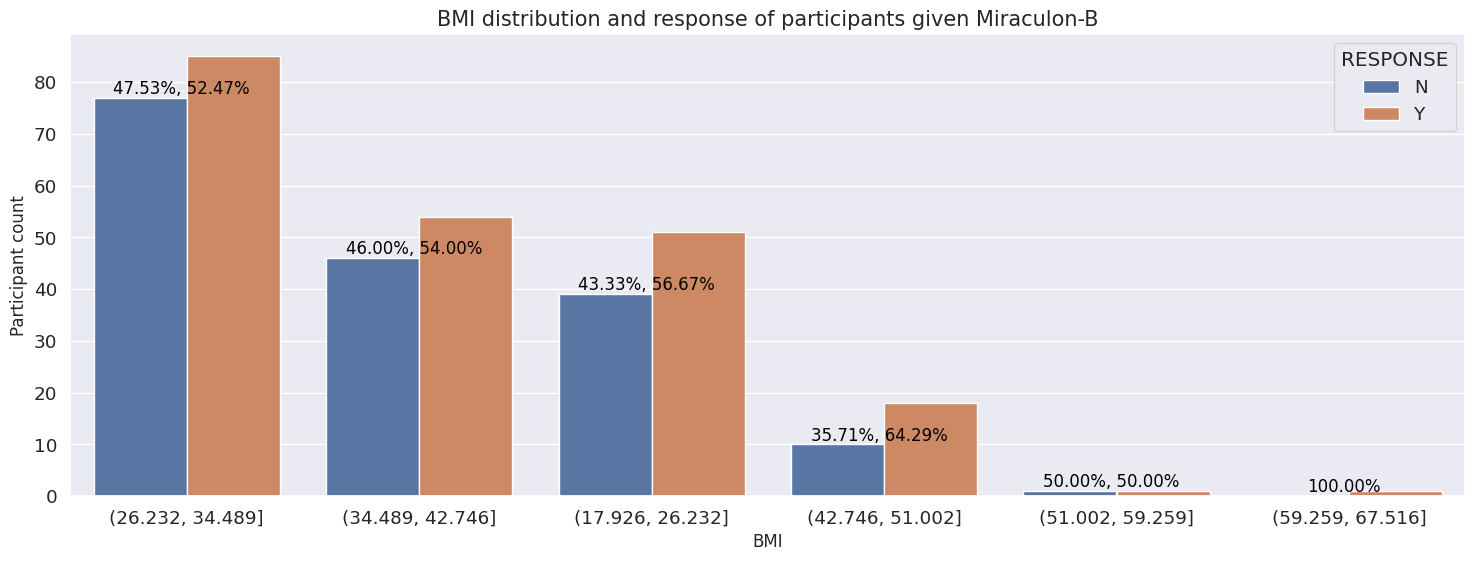

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create 7 bins for weight
Drug_df['BMI_bin'] = pd.cut(Drug_df['BMI'], 6)

# Convert bin labels to strings
Drug_df['BMI_bin'] = Drug_df['BMI_bin'].astype(str)

# Create countplot
plt.figure(figsize=(18, 6))
sns.set(font_scale=1.2)
ax = sns.countplot(x='BMI_bin', hue='RESPONSE', data=Drug_df)
ax.set_title('BMI distribution and response of participants given Miraculon-B', fontsize=15)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Participant count', fontsize=12)
plt.xticks(rotation='horizontal')

# Annotate plot with percentages
total_counts = Drug_df.groupby('BMI_bin')['RESPONSE'].count().reset_index(name='count')
response_counts = Drug_df.groupby(['BMI_bin', 'RESPONSE']).size().reset_index(name='response_count')

for p, label in zip(ax.patches, ax.get_xticklabels()):
    height = p.get_height()
    bin_label = label.get_text()
    bin_counts = response_counts[response_counts['BMI_bin'] == bin_label]['response_count']
    total_count = total_counts[total_counts['BMI_bin'] == bin_label]['count'].iloc[0]
    percentages = [count / total_count * 100 for count in bin_counts]
    percentage_str = ', '.join([f'{percentage:.2f}%' for percentage in percentages])
    ax.annotate(percentage_str, (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', color='black', size=12,
                xytext=(30, 0), textcoords='offset points') 

plt.show()

In [ ]:
#BMI Bin

BMI_bin= pd.cut(Drug_df['BMI'],6)


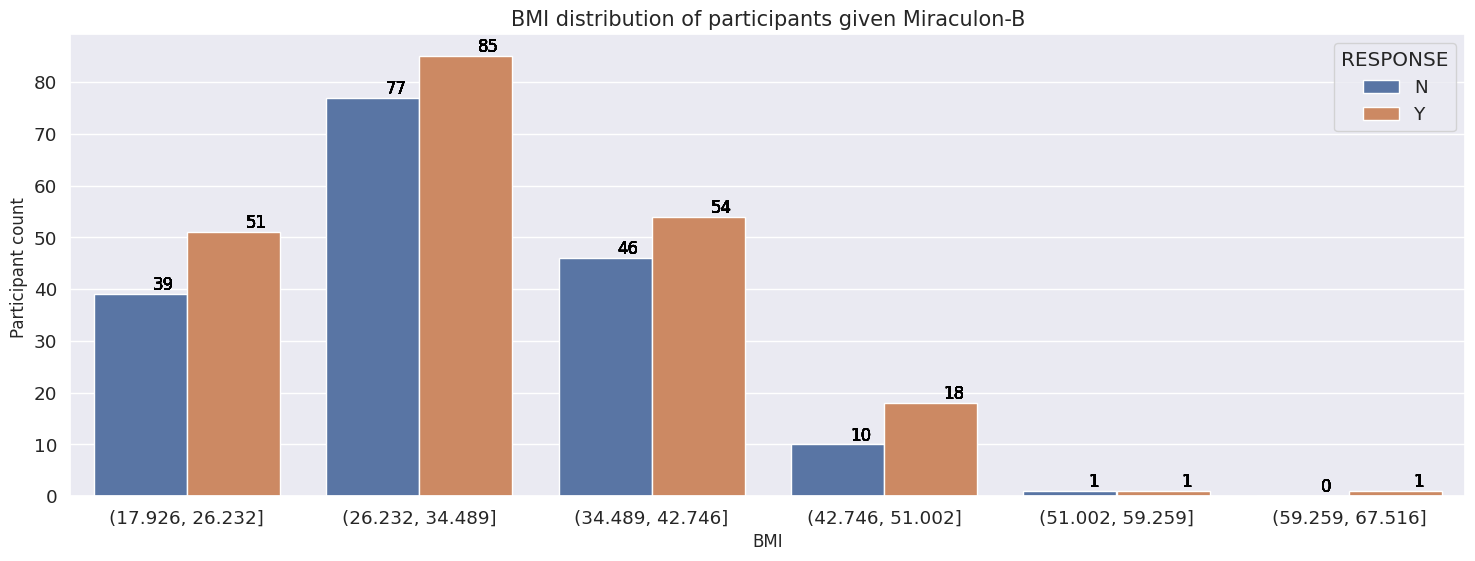

In [ ]:
plt.figure(figsize=(18,6))
sns.set(font_scale=1.2)
ax=sns.countplot(x=BMI_bin, hue='RESPONSE', data=Drug_df)
ax.set_title('BMI distribution of participants given Miraculon-B' , fontsize = 15)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Participant count ', fontsize=12)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=12)

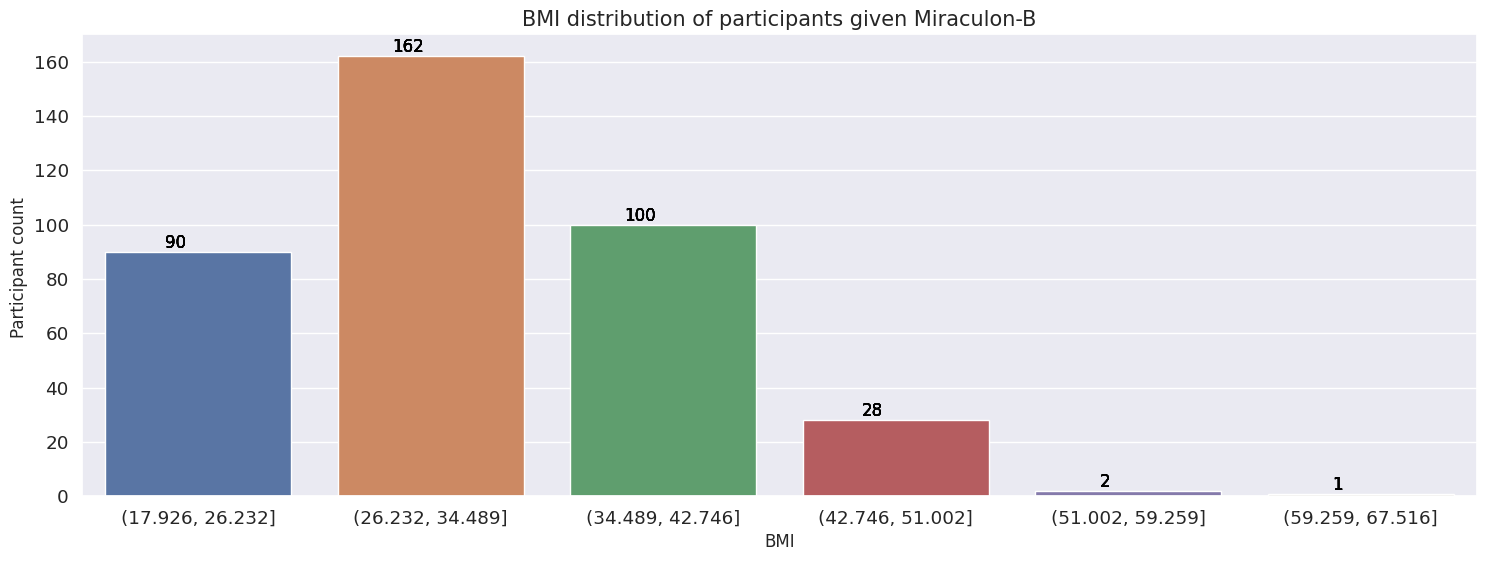

In [ ]:
plt.figure(figsize=(18,6))
sns.set(font_scale=1.2)
ax=sns.countplot(x=BMI_bin)
ax.set_title('BMI distribution of participants given Miraculon-B' , fontsize = 15)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Participant count ', fontsize=12)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=12)

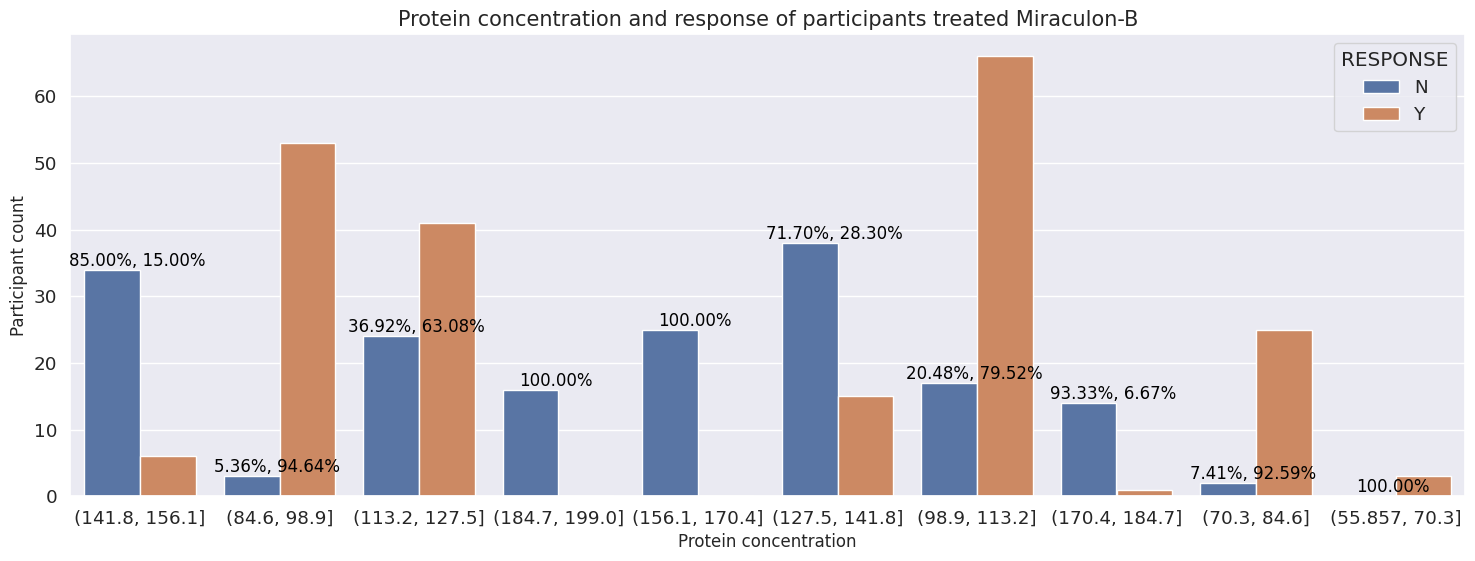

In [ ]:

# Create 10 bins for protein concentration

Drug_df['protein_bin'] = pd.cut(Drug_df['protein_concentration'], 10)

# Convert bin labels to strings
Drug_df['protein_bin'] = Drug_df['protein_bin'].astype(str)

# Create countplot
plt.figure(figsize=(18, 6))
sns.set(font_scale=1.2)
ax = sns.countplot(x='protein_bin', hue='RESPONSE', data=Drug_df)
ax.set_title('Protein concentration and response of participants treated Miraculon-B', fontsize=15)
plt.xlabel('Protein concentration', fontsize=12)
plt.ylabel('Participant count', fontsize=12)
plt.xticks(rotation='horizontal')

# Annotate plot with percentages
total_counts = Drug_df.groupby('protein_bin')['RESPONSE'].count().reset_index(name='count')
response_counts = Drug_df.groupby(['protein_bin', 'RESPONSE']).size().reset_index(name='response_count')

for p, label in zip(ax.patches, ax.get_xticklabels()):
    height = p.get_height()
    bin_label = label.get_text()
    bin_counts = response_counts[response_counts['protein_bin'] == bin_label]['response_count']
    total_count = total_counts[total_counts['protein_bin'] == bin_label]['count'].iloc[0]
    percentages = [count / total_count * 100 for count in bin_counts]
    percentage_str = ', '.join([f'{percentage:.2f}%' for percentage in percentages])
    ax.annotate(percentage_str, (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', color='black', size=12,
                xytext=(18, 0), textcoords='offset points')

plt.show()

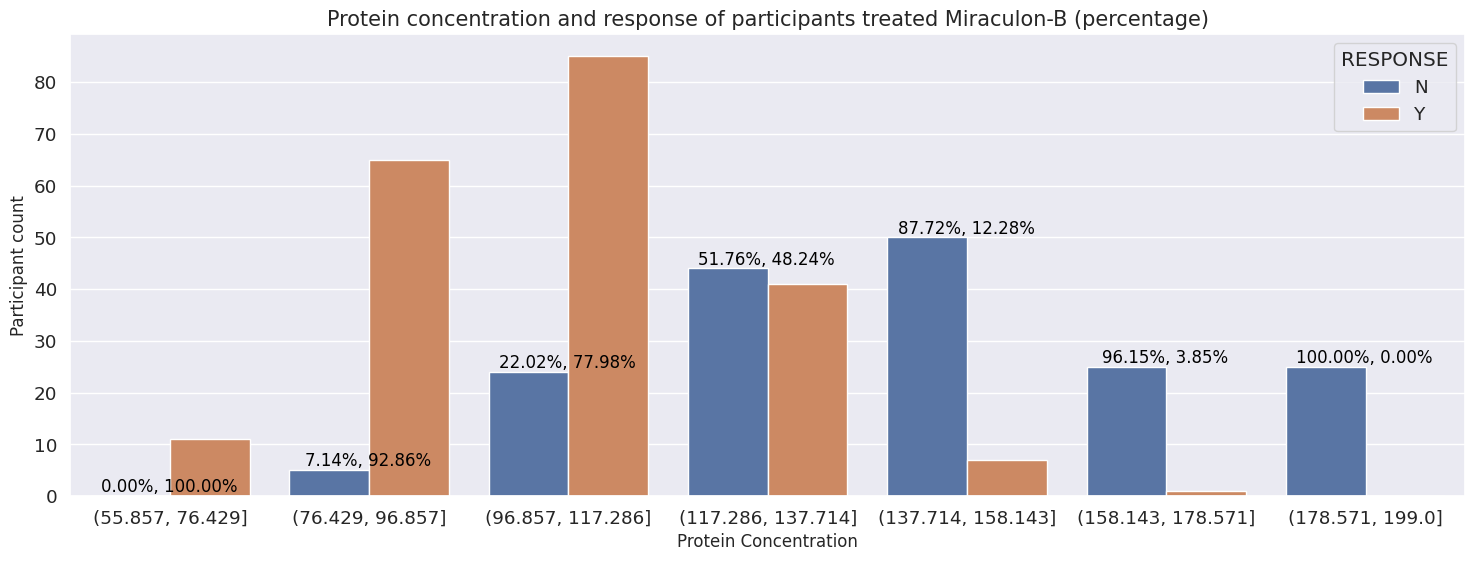

In [ ]:


# Cut protein concentration into bins and specify desired order of levels
prot_bin = pd.cut(Drug_df['protein_concentration'], bins=7, ordered=True)
prot_labels = [f'({interval.left}, {interval.right}]' for interval in prot_bin.cat.categories]
Drug_df['prot_bins'] = prot_bin.cat.rename_categories(prot_labels )

# Create countplot
plt.figure(figsize=(18, 6))
sns.set(font_scale=1.2)
ax = sns.countplot(x='prot_bins', hue='RESPONSE', data=Drug_df)
ax.set_title('Protein concentration and response of participants treated Miraculon-B (percentage)', fontsize=15)
plt.xlabel('Protein Concentration', fontsize=12)
plt.ylabel('Participant count', fontsize=12)
plt.xticks(rotation='horizontal')

# Annotate plot with percentages
total_counts = Drug_df.groupby('prot_bins')['RESPONSE'].count().reset_index(name='count')
response_counts = Drug_df.groupby(['prot_bins', 'RESPONSE']).size().reset_index(name='response_count')

for p, label in zip(ax.patches, ax.get_xticklabels()):
    height = p.get_height()
    bin_label = label.get_text()
    bin_counts = response_counts[response_counts['prot_bins'] == bin_label]['response_count']
    total_count = total_counts[total_counts['prot_bins'] == bin_label]['count'].iloc[0]
    percentages = [count / total_count * 100 for count in bin_counts]
    percentage_str = ', '.join([f'{percentage:.2f}%' for percentage in percentages])
    ax.annotate(percentage_str, (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', color='black', size=12,
                xytext=(28, 0), textcoords='offset points') 

plt.show()





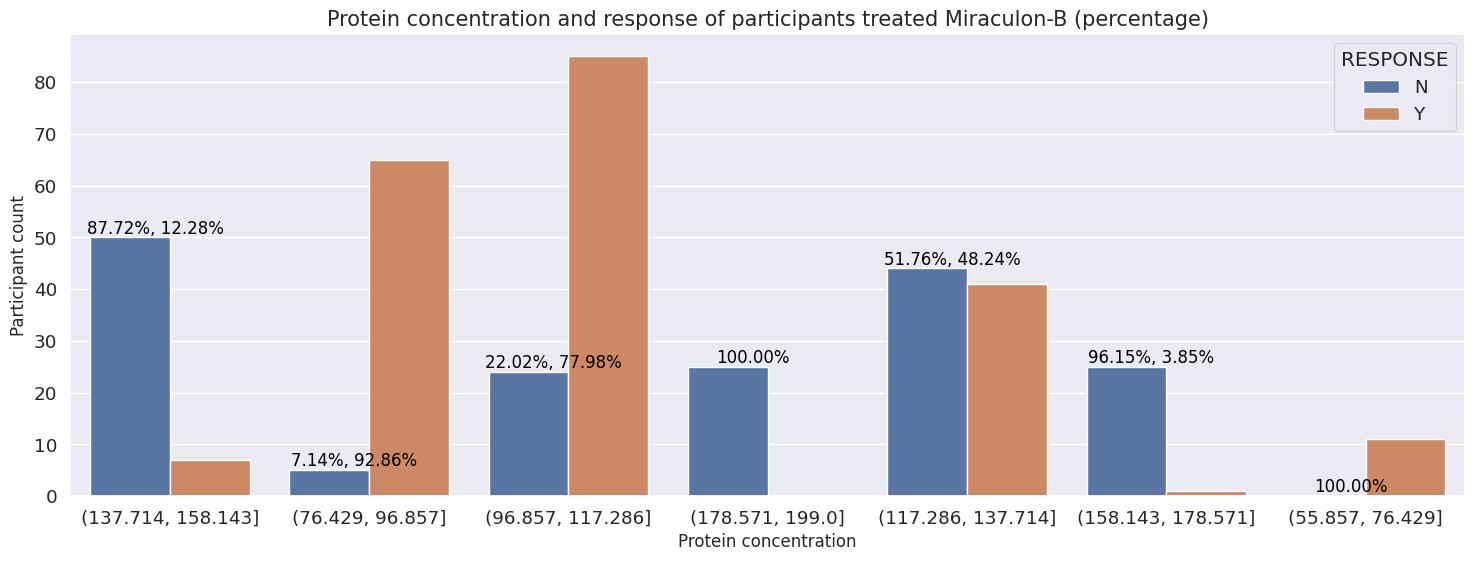

In [ ]:


# Create 7 bins for protein concentration
Drug_df['protein_bin'] = pd.cut(Drug_df['protein_concentration'], 7)

# Convert bin labels to strings
Drug_df['protein_bin'] = Drug_df['protein_bin'].astype(str)

# Create countplot
plt.figure(figsize=(18, 6))
sns.set(font_scale=1.2)
ax = sns.countplot(x='protein_bin', hue='RESPONSE', data=Drug_df)
ax.set_title('Protein concentration and response of participants treated Miraculon-B (percentage)', fontsize=15)
plt.xlabel('Protein concentration', fontsize=12)
plt.ylabel('Participant count', fontsize=12)
plt.xticks(rotation='horizontal')

# Annotate plot with percentages
total_counts = Drug_df.groupby('protein_bin')['RESPONSE'].count().reset_index(name='count')
response_counts = Drug_df.groupby(['protein_bin', 'RESPONSE']).size().reset_index(name='response_count')

for p, label in zip(ax.patches, ax.get_xticklabels()):
    height = p.get_height()
    bin_label = label.get_text()
    bin_counts = response_counts[response_counts['protein_bin'] == bin_label]['response_count']
    total_count = total_counts[total_counts['protein_bin'] == bin_label]['count'].iloc[0]
    percentages = [count / total_count * 100 for count in bin_counts]
    percentage_str = ', '.join([f'{percentage:.2f}%' for percentage in percentages])
    ax.annotate(percentage_str, (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', color='black', size=12,
                xytext=(18, 0), textcoords='offset points')

plt.show()

In [ ]:
# mean protein concentration for response
mean_prot_Mira_resp = Drug_df[Drug_df['RESPONSE'] == 'Y']['protein_concentration'].mean()
mean_prot_Mira_resp


103.96041315608812

In [ ]:
# mean protein concentration for non -response
mean_prot_Mira_noresp = Drug_df[Drug_df['RESPONSE'] == 'N']['protein_concentration'].mean()
mean_prot_Mira_noresp 

144.06971264933824

# Blood protein concentration is a predictive biomarker. 100% of Participants with protein concentration between 55.86(ug/L) and 76.43(ug/L) responded to treatment, while 92.86% of participants with protein concentration within 76.43(ug/L) and 96.86(ug/L) responded to treatment.Those with protein concentration between 96.86(ug/L) and 117.29(ug/L) recorded 77.98% response. As protein concentration increases above 117.29(ug/L) there is a decline in response to treatment. All participants with protein concentration above 178.57(ug/L) did not respond to miraculon-B. Generally, protein concentration between 55.857(ug/L) and 117.286(ug/L) indicates positive response to treatment.Optimal protein concentration is between 55.857 and 96.857(ug/L). In addition the mean protein concentration of those that responded to treatment is 103.96(ug/L) while that of non responsive participants is 144.07(ug/L)

In [ ]:
#Protein concentration 

protein_bin= pd.cut(Drug_df['protein_concentration'],7)

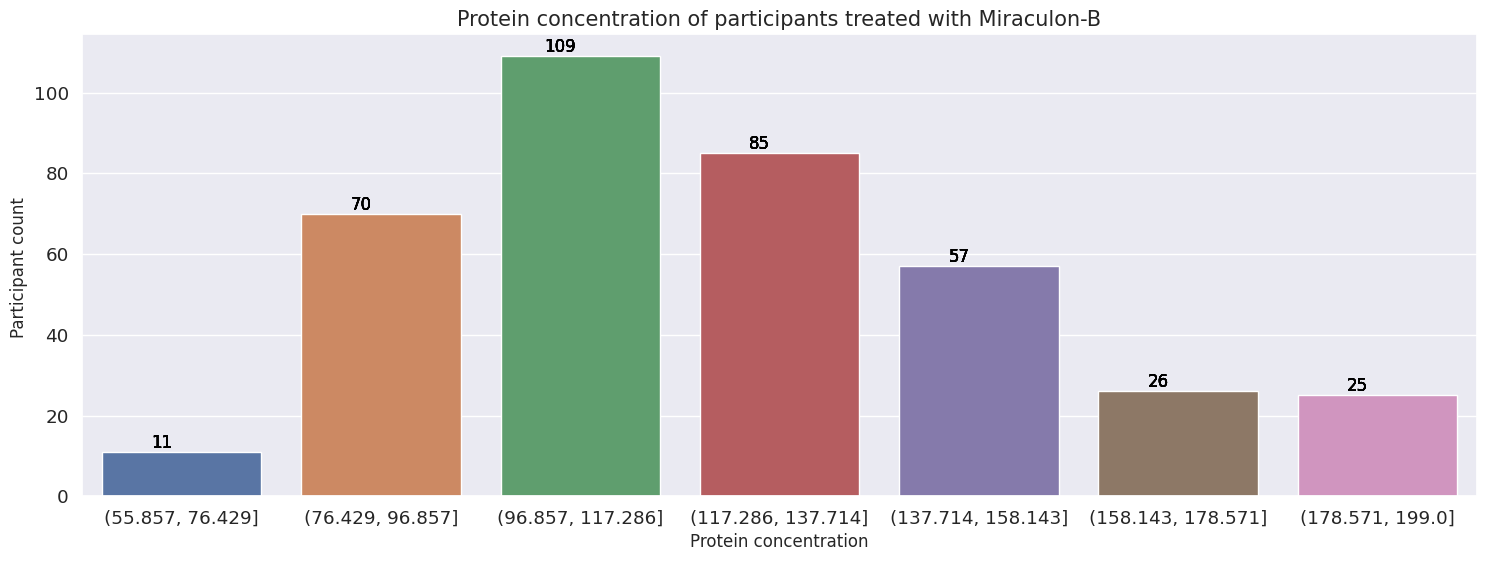

In [ ]:
#Protein concentration 

#protein_bin= pd.cut(Drug_df['protein_concentration'],7)
plt.figure(figsize=(18,6))
sns.set(font_scale=1.2)
ax=sns.countplot(x=protein_bin)
ax.set_title('Protein concentration of participants treated with Miraculon-B' , fontsize = 15)
plt.xlabel('Protein concentration', fontsize=12)
plt.ylabel('Participant count ', fontsize=12)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=12)

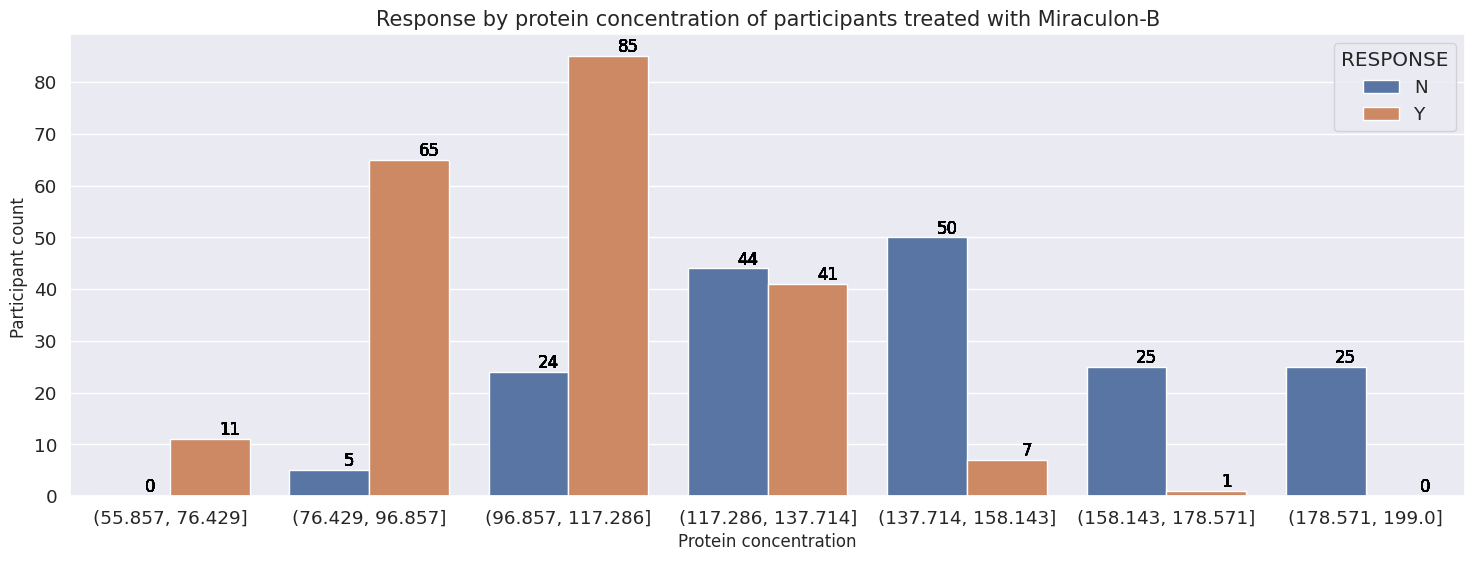

In [ ]:
plt.figure(figsize=(18,6))
sns.set(font_scale=1.2)
ax=sns.countplot(x=prot_bin, hue='RESPONSE', data=Drug_df)
ax.set_title('Response by protein concentration of participants treated with Miraculon-B' , fontsize = 15)
plt.xlabel('Protein concentration', fontsize=12)
plt.ylabel('Participant count ', fontsize=12)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=12)

Participants given Miraculon-B

In [ ]:
#Mean age

In [ ]:
Drug_df.describe()

age      weight      height         BMI  protein_concentration
count  383.000000  383.000000  383.000000  383.000000             383.000000
mean    61.759791   90.844100    1.682742   31.992628             122.077669
std      7.565750   22.465539    0.097062    7.161227              30.183344
min     37.000000   46.170000    1.430000   17.975421              56.000000
25%     57.000000   74.340000    1.610000   26.704177              99.500000
50%     62.000000   89.220000    1.680000   31.678201             118.000000
75%     67.000000  104.135000    1.760000   36.318756             141.500000
max     79.000000  160.120000    1.940000   67.515601             199.000000

In [ ]:
control_df.describe()

age      weight      height         BMI  protein_concentration
count  385.000000  385.000000  385.000000  385.000000             385.000000
mean    61.862338   91.928242    1.675818   32.639183             121.297888
std      6.629657   21.496649    0.098707    6.576013              30.719510
min     39.000000   50.290000    1.420000   19.041756              44.000000
25%     58.000000   76.910000    1.600000   27.673743             100.000000
50%     62.000000   89.140000    1.670000   32.743150             117.000000
75%     67.000000  104.580000    1.750000   36.421714             139.000000
max     79.000000  182.500000    1.920000   59.129343             198.000000

In [ ]:
# STANDARD

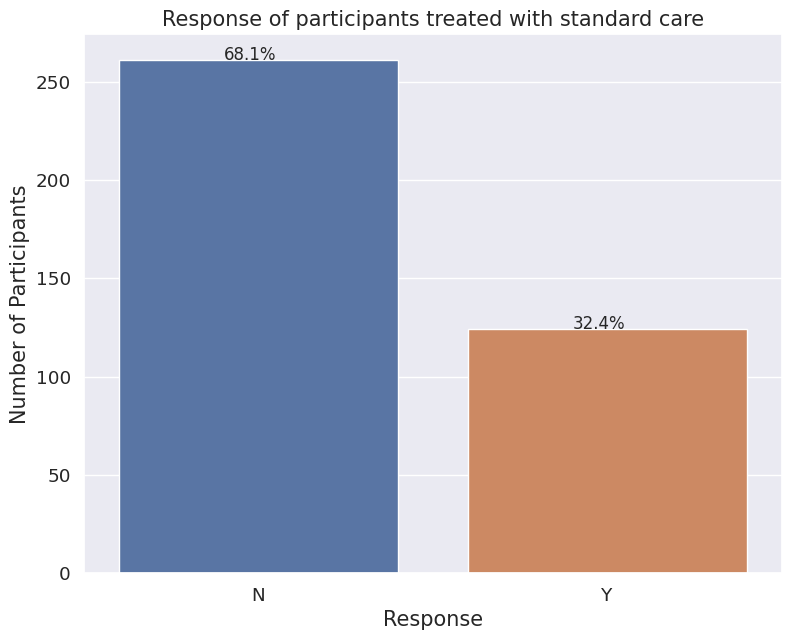

In [ ]:
plt.figure(figsize=(9,7))
ax=sns.countplot(x='RESPONSE', data=control_df)
ax.set_title('Response of participants treated with standard care' , fontsize = 15)
sns.set(font_scale=1.2)
plt.xlabel('Response', fontsize=15)
plt.ylabel('Number of Participants', fontsize=15)
plt.xticks(rotation='horizontal')

total = float(len(Drug_df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12)

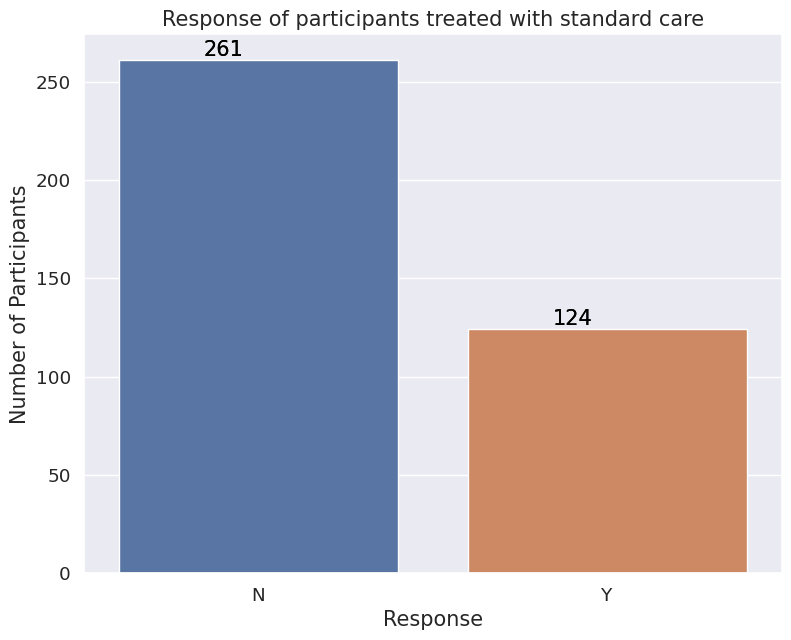

In [ ]:
plt.figure(figsize=(9,7))
ax=sns.countplot(x='RESPONSE', data=control_df)
ax.set_title('Response of participants treated with standard care' , fontsize = 15)
sns.set(font_scale=1.2)
plt.xlabel('Response', fontsize=15)
plt.ylabel('Number of Participants', fontsize=15)
plt.xticks(rotation='horizontal')

for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=15)

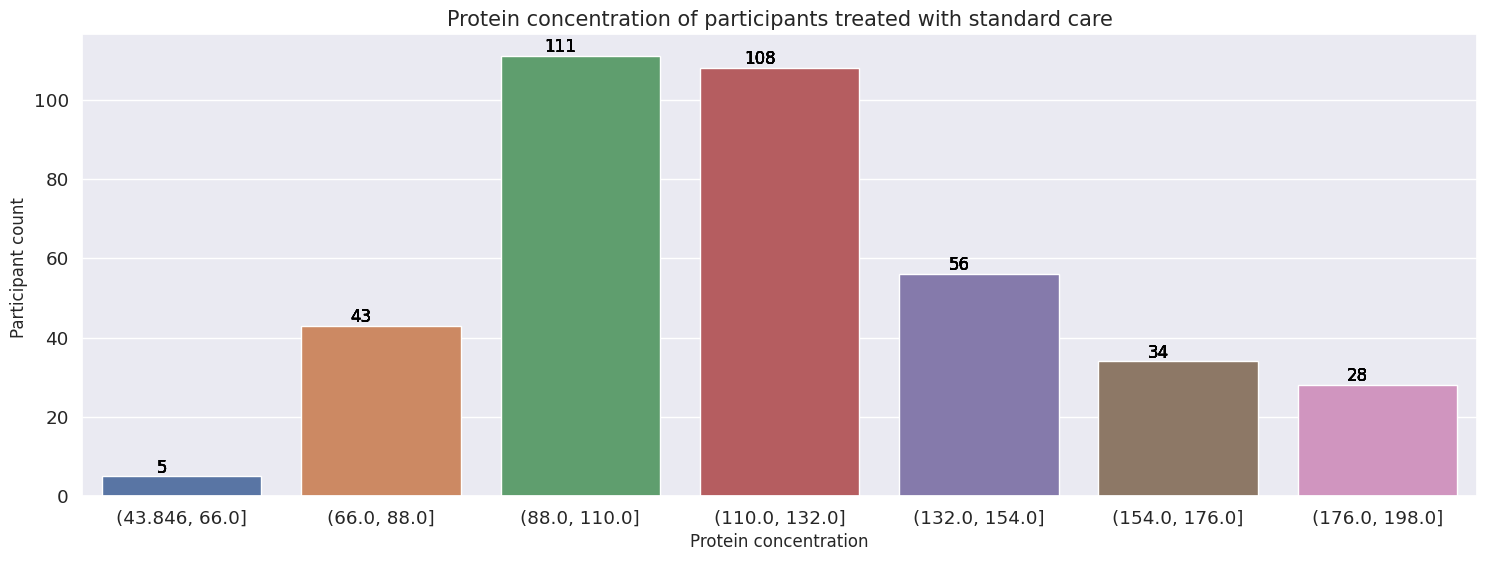

In [ ]:
#Protein concentration 

protein_bin= pd.cut(control_df['protein_concentration'],7)
plt.figure(figsize=(18,6))
sns.set(font_scale=1.2)
ax=sns.countplot(x=protein_bin)
ax.set_title('Protein concentration of participants treated with standard care' , fontsize = 15)
plt.xlabel('Protein concentration', fontsize=12)
plt.ylabel('Participant count ', fontsize=12)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=12)

In [ ]:


protein_bin= pd.cut(control_df['protein_concentration'],7)

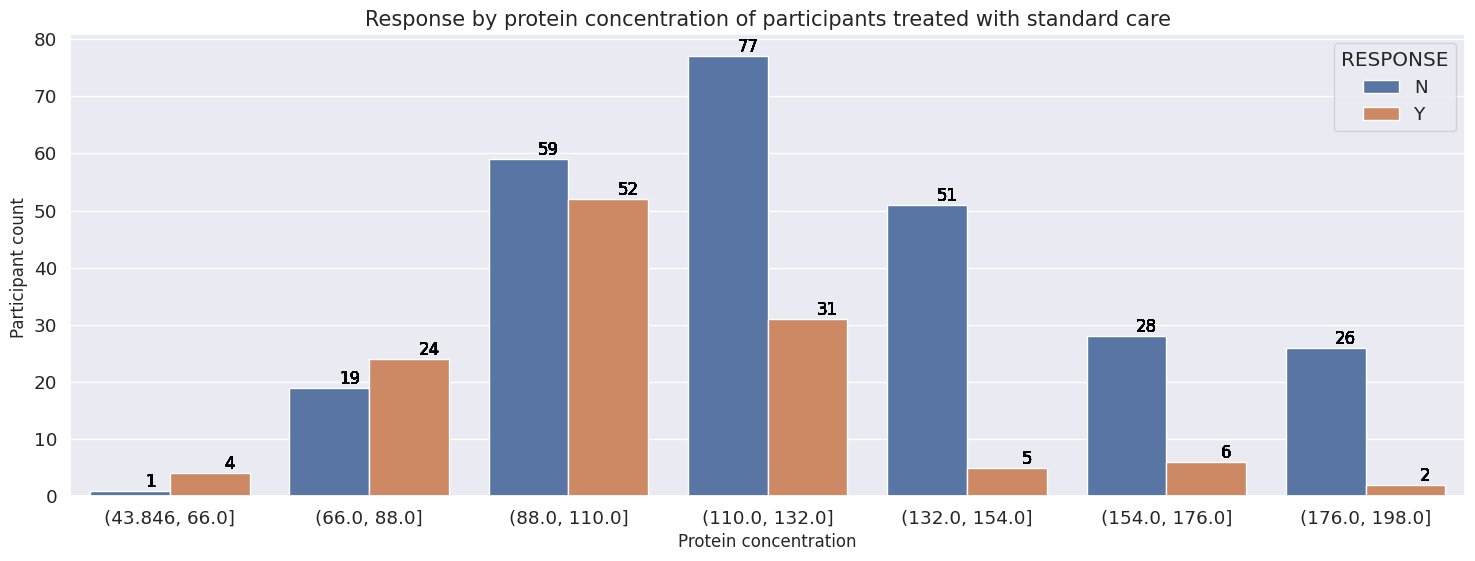

In [ ]:
plt.figure(figsize=(18,6))
sns.set(font_scale=1.2)
ax=sns.countplot(x=protein_bin, hue='RESPONSE', data=control_df)
ax.set_title('Response by protein concentration of participants treated with standard care' , fontsize = 15)
plt.xlabel('Protein concentration', fontsize=12)
plt.ylabel('Participant count ', fontsize=12)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=12)

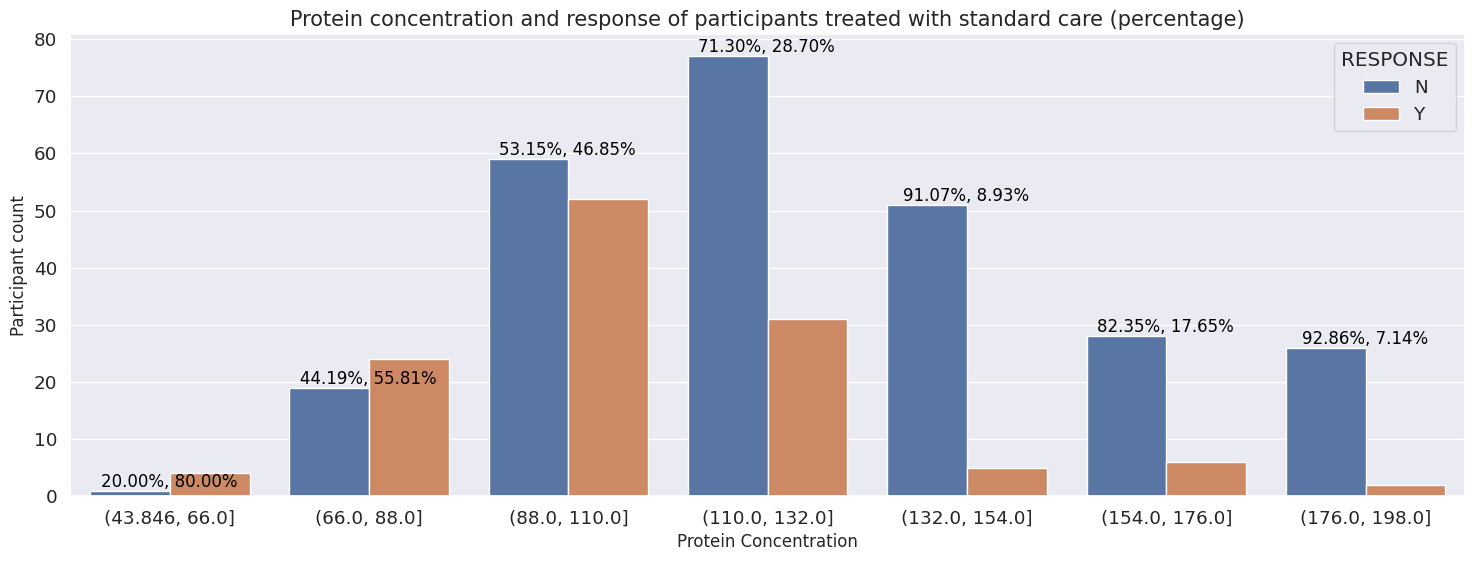

In [ ]:


# Cut protein concentration into bins and specify desired order of levels
prot_bin = pd.cut(control_df['protein_concentration'], bins=7, ordered=True)
prot_labels = [f'({interval.left}, {interval.right}]' for interval in prot_bin.cat.categories]
control_df['prot_bins'] = prot_bin.cat.rename_categories(prot_labels )

# Create countplot
plt.figure(figsize=(18, 6))
sns.set(font_scale=1.2)
ax = sns.countplot(x='prot_bins', hue='RESPONSE', data=control_df)
ax.set_title('Protein concentration and response of participants treated with standard care (percentage)', fontsize=15)
plt.xlabel('Protein Concentration', fontsize=12)
plt.ylabel('Participant count', fontsize=12)
plt.xticks(rotation='horizontal')

# Annotate plot with percentages
total_counts = control_df.groupby('prot_bins')['RESPONSE'].count().reset_index(name='count')
response_counts = control_df.groupby(['prot_bins', 'RESPONSE']).size().reset_index(name='response_count')

for p, label in zip(ax.patches, ax.get_xticklabels()):
    height = p.get_height()
    bin_label = label.get_text()
    bin_counts = response_counts[response_counts['prot_bins'] == bin_label]['response_count']
    total_count = total_counts[total_counts['prot_bins'] == bin_label]['count'].iloc[0]
    percentages = [count / total_count * 100 for count in bin_counts]
    percentage_str = ', '.join([f'{percentage:.2f}%' for percentage in percentages])
    ax.annotate(percentage_str, (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', color='black', size=12,
                xytext=(28, 0), textcoords='offset points') 

plt.show()


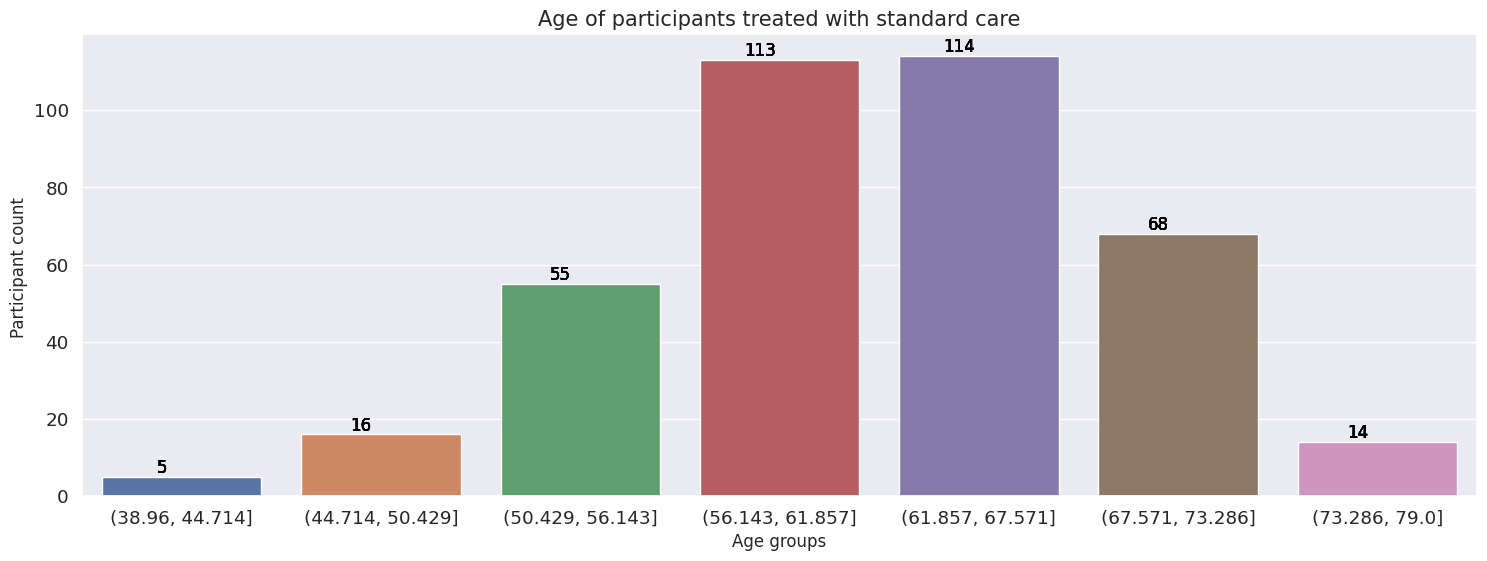

In [ ]:
# Age

age1_bin= pd.cut(control_df['age'],7)
plt.figure(figsize=(18,6))
sns.set(font_scale=1.2)
ax=sns.countplot(x=age1_bin)
ax.set_title('Age of participants treated with standard care' , fontsize = 15)
plt.xlabel('Age groups', fontsize=12)
plt.ylabel('Participant count ', fontsize=12)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=12)

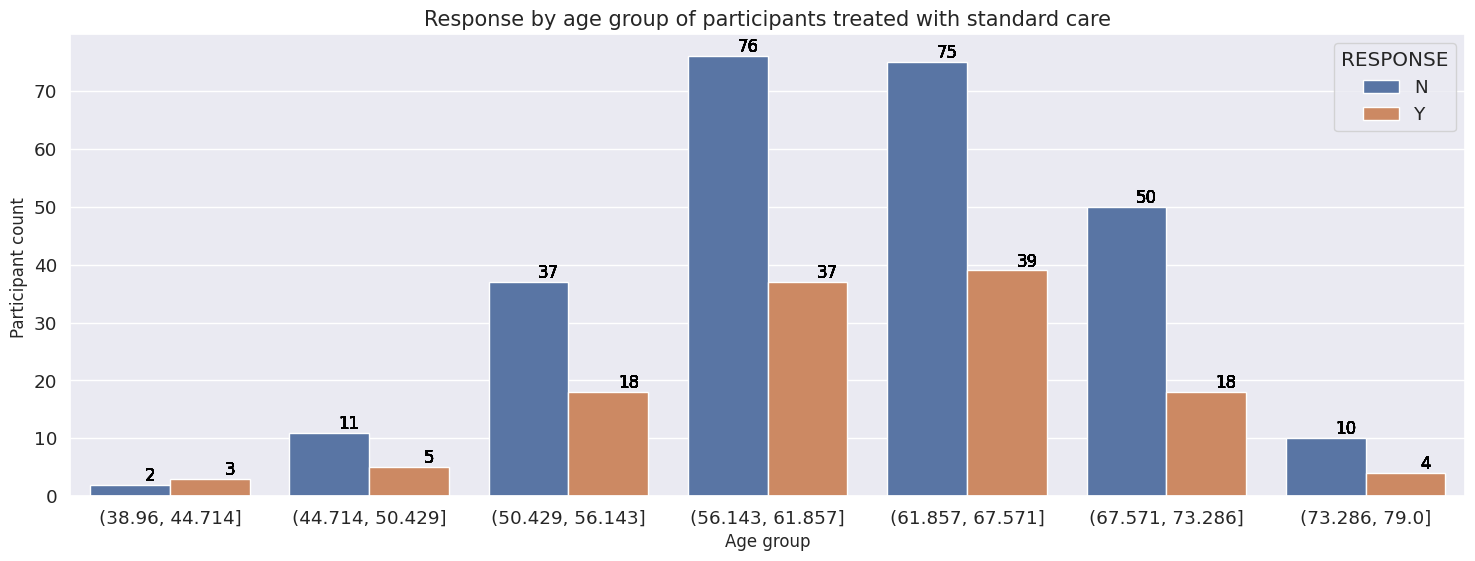

In [ ]:
plt.figure(figsize=(18,6))
sns.set(font_scale=1.2)
ax=sns.countplot(x=age1_bin, hue='RESPONSE', data=control_df)
ax.set_title('Response by age group of participants treated with standard care' , fontsize = 15)
plt.xlabel('Age group', fontsize=12)
plt.ylabel('Participant count ', fontsize=12)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=12)

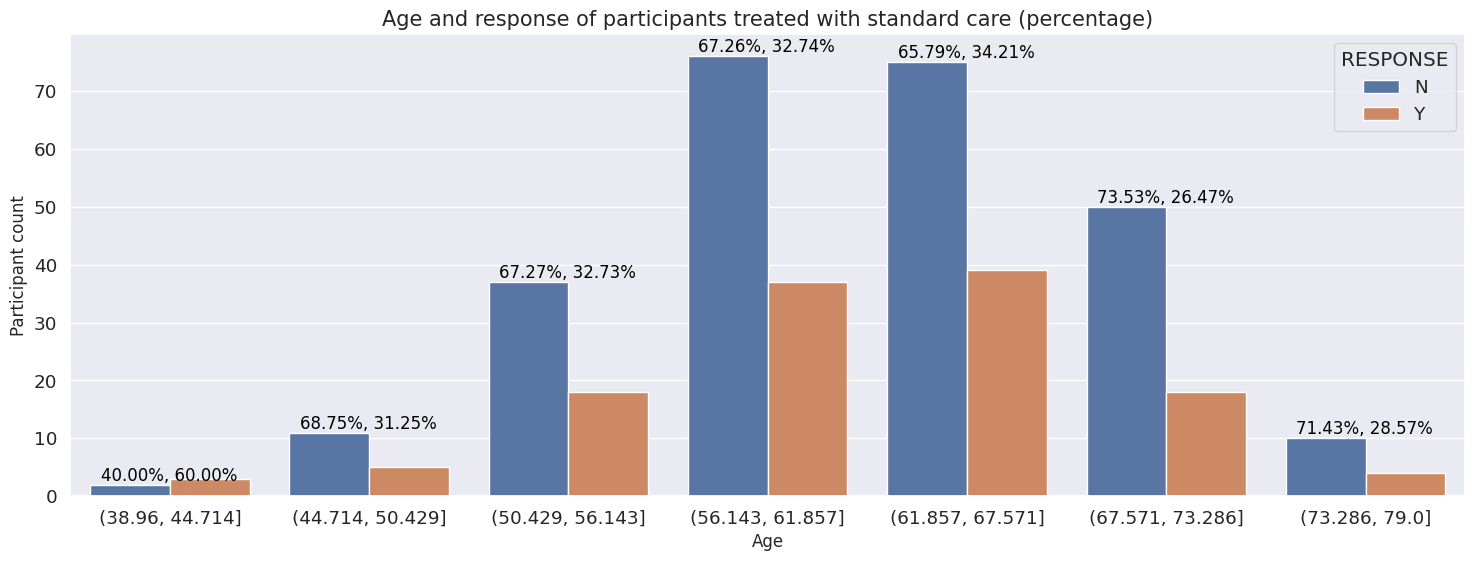

In [ ]:


# Cut protein concentration into bins and specify desired order of levels
age2_bin = pd.cut(control_df['age'], bins=7, ordered=True)
age_labels = [f'({interval.left}, {interval.right}]' for interval in age2_bin.cat.categories]
control_df['age2_bins'] = age2_bin.cat.rename_categories(age_labels )

# Create countplot
plt.figure(figsize=(18, 6))
sns.set(font_scale=1.2)
ax = sns.countplot(x='age2_bins', hue='RESPONSE', data=control_df)
ax.set_title('Age and response of participants treated with standard care (percentage)', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Participant count', fontsize=12)
plt.xticks(rotation='horizontal')

# Annotate plot with percentages
total_counts = control_df.groupby('age2_bins')['RESPONSE'].count().reset_index(name='count')
response_counts = control_df.groupby(['age2_bins', 'RESPONSE']).size().reset_index(name='response_count')

for p, label in zip(ax.patches, ax.get_xticklabels()):
    height = p.get_height()
    bin_label = label.get_text()
    bin_counts = response_counts[response_counts['age2_bins'] == bin_label]['response_count']
    total_count = total_counts[total_counts['age2_bins'] == bin_label]['count'].iloc[0]
    percentages = [count / total_count * 100 for count in bin_counts]
    percentage_str = ', '.join([f'{percentage:.2f}%' for percentage in percentages])
    ax.annotate(percentage_str, (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', color='black', size=12,
                xytext=(28, 0), textcoords='offset points') 

plt.show()

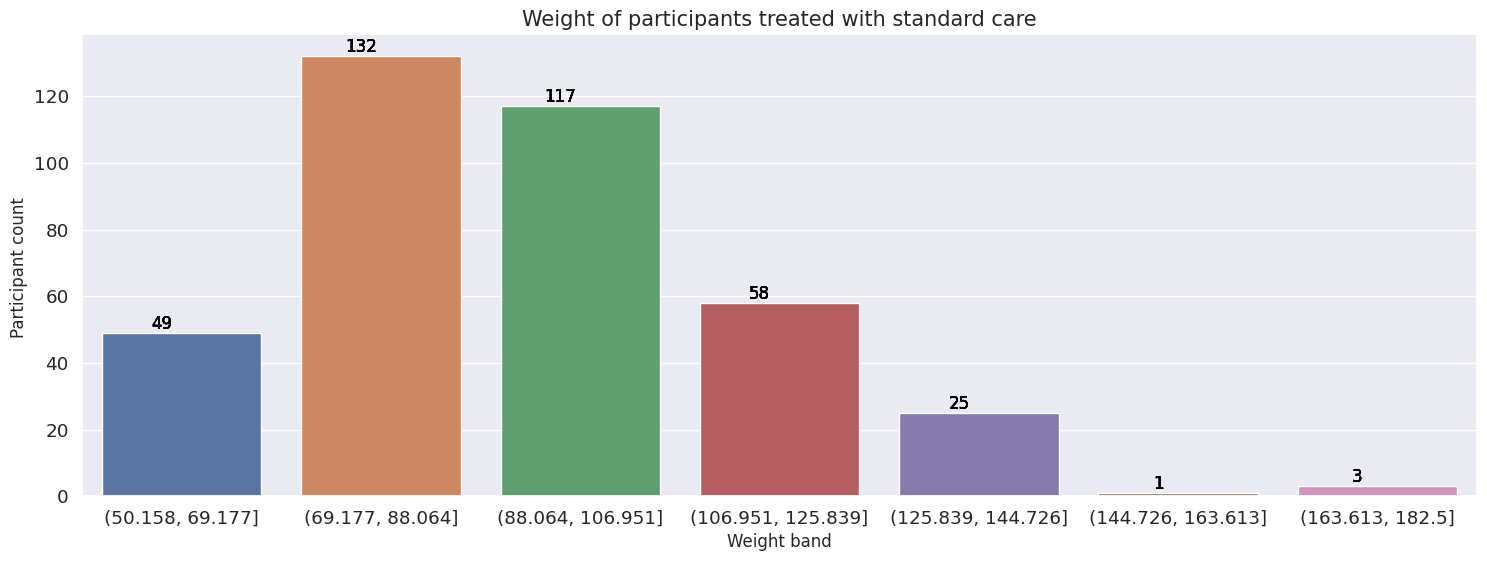

In [ ]:
# Weight

wt1_bin= pd.cut(control_df['weight'],7)
plt.figure(figsize=(18,6))
sns.set(font_scale=1.2)
ax=sns.countplot(x=wt1_bin)
ax.set_title('Weight of participants treated with standard care' , fontsize = 15)
plt.xlabel('Weight band', fontsize=12)
plt.ylabel('Participant count ', fontsize=12)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=12)

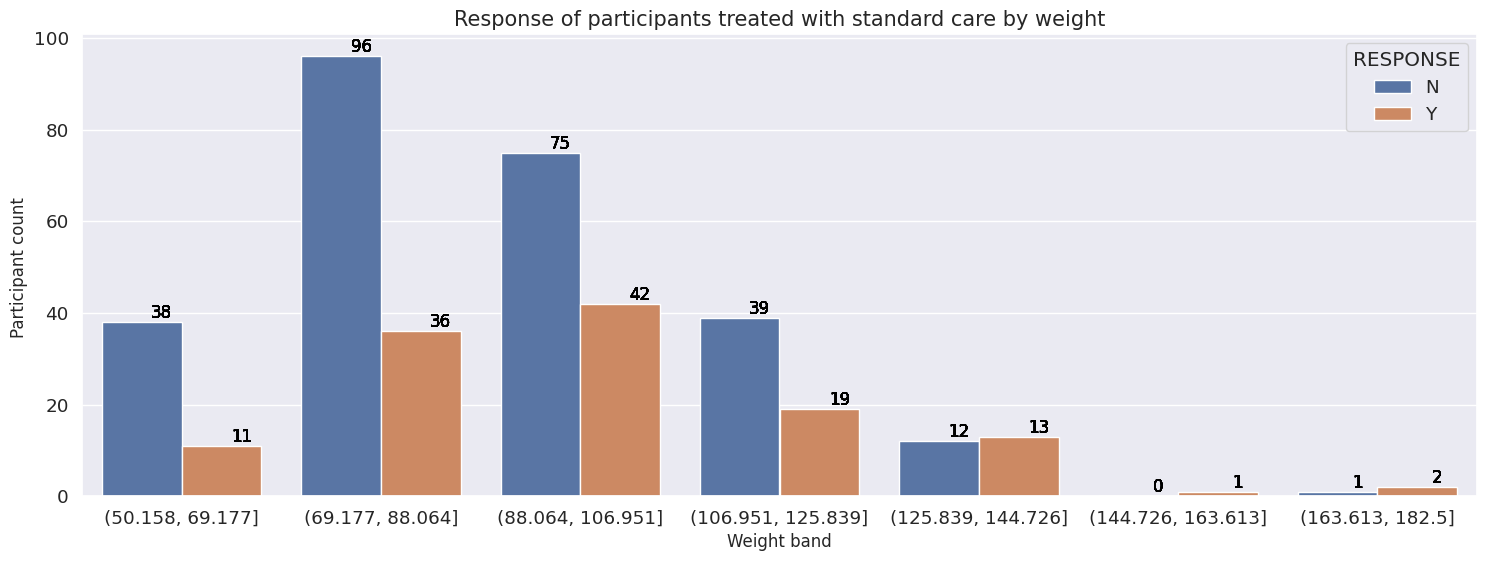

In [ ]:
plt.figure(figsize=(18,6))
sns.set(font_scale=1.2)
ax=sns.countplot(x=wt1_bin, hue='RESPONSE', data=control_df)
ax.set_title('Response of participants treated with standard care by weight' , fontsize = 15)
plt.xlabel('Weight band', fontsize=12)
plt.ylabel('Participant count ', fontsize=12)
plt.xticks(rotation='horizontal')
for p in ax.patches:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x()+0.3, p.get_height()), ha='center', va='bottom', color='black', size=12)

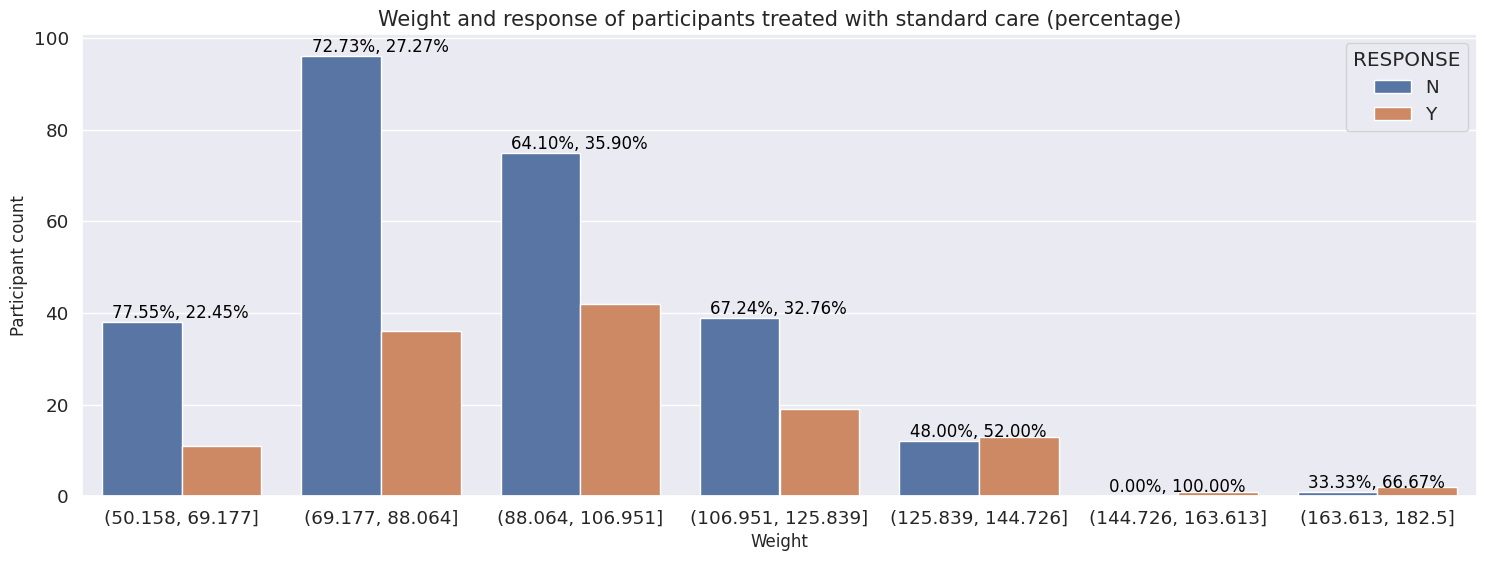

In [ ]:


wt3_bin = pd.cut(control_df['weight'], bins=7, ordered=True)
wt3_labels = [f'({interval.left}, {interval.right}]' for interval in wt3_bin.cat.categories]
control_df['wt3_bins'] = wt3_bin.cat.rename_categories(wt3_labels)

# Create countplot
plt.figure(figsize=(18, 6))
sns.set(font_scale=1.2)
ax = sns.countplot(x='wt3_bins', hue='RESPONSE', data=control_df)
ax.set_title('Weight and response of participants treated with standard care (percentage)', fontsize=15)
plt.xlabel('Weight', fontsize=12)
plt.ylabel('Participant count', fontsize=12)
plt.xticks(rotation='horizontal')

# Annotate plot with percentages
total_counts = control_df.groupby('wt3_bins')['RESPONSE'].count().reset_index(name='count')
response_counts = control_df.groupby(['wt3_bins', 'RESPONSE']).size().reset_index(name='response_count')

for p, label in zip(ax.patches, ax.get_xticklabels()):
    height = p.get_height()
    bin_label = label.get_text()
    bin_counts = response_counts[response_counts['wt3_bins'] == bin_label]['response_count']
    total_count = total_counts[total_counts['wt3_bins'] == bin_label]['count'].iloc[0]
    percentages = [count / total_count * 100 for count in bin_counts]
    percentage_str = ', '.join([f'{percentage:.2f}%' for percentage in percentages])
    ax.annotate(percentage_str, (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', color='black', size=12,
                xytext=(28, 0), textcoords='offset points') 

plt.show()

In [ ]:
mean_age_miraculon_B = merged_df2[merged_df2['trt_grp'] == 'DRUG']['age'].mean()
mean_age_miraculon_B


61.759791122715406

In [ ]:
mean_age_control = merged_df2[merged_df2['trt_grp'] == 'CONTROL']['age'].mean()
mean_age_control

61.862337662337666

In [ ]:

mean_age_responders = merged_df2[merged_df2['RESPONSE'] == 'Y']['age'].mean()
mean_age_responders 

61.89221556886228

In [ ]:
mean_age_non_resp = merged_df2[merged_df2['RESPONSE'] == 'N']['age'].mean()
mean_age_non_resp

61.74884792626728

In [ ]:
mean_weight_responders = merged_df2[merged_df2['RESPONSE'] == 'Y']['weight'].mean()
mean_weight_responders

93.25097354827993

In [ ]:
mean_weight_non_resp = merged_df2[merged_df2['RESPONSE'] == 'N']['weight'].mean()
mean_weight_non_resp


89.95354433885883

In [ ]:
mean_protein_non_resp = merged_df2[merged_df2['RESPONSE'] == 'N']['protein_concentration'].mean()
mean_protein_non_resp

134.88493153994358

In [ ]:
mean_protein_resp = merged_df2[merged_df2['RESPONSE'] == 'Y']['protein_concentration'].mean()
mean_protein_resp

104.53704648370363

In [ ]:
# Miraculon-B

In [ ]:
mean_age_Mira_resp = Drug_df[Drug_df['RESPONSE'] == 'Y']['age'].mean()
mean_age_Mira_resp

62.13333333333333

In [ ]:
mean_age_Mira_no_resp = Drug_df[Drug_df['RESPONSE'] == 'N']['age'].mean()
mean_age_Mira_no_resp

61.30635838150289

In [ ]:
mean_prot_Mira_resp = Drug_df[Drug_df['RESPONSE'] == 'Y']['protein_concentration'].mean()
mean_prot_Mira_resp

103.96041315608812

In [ ]:
mean_prot_Mira_no_resp = Drug_df[Drug_df['RESPONSE'] == 'N']['protein_concentration'].mean()
mean_prot_Mira_no_resp

144.06971264933824

In [ ]:
mean_wt_Mira_resp = Drug_df[Drug_df['RESPONSE'] == 'Y']['weight'].mean()
mean_wt_Mira_resp

91.39288173869285

In [ ]:
mean_wt_mira_no_resp = Drug_df[Drug_df['RESPONSE'] == 'N']['weight'].mean()
mean_wt_mira_no_resp

90.17794893136126

In [ ]:
#Control 

In [ ]:
mean_protein_control_resp = control_df[ control_df['RESPONSE'] == 'Y']['protein_concentration'].mean()
mean_protein_control_resp

105.51360292563312

In [ ]:
mean_protein_ctrl_no_resp = control_df[ control_df['RESPONSE'] == 'N']['protein_concentration'].mean()
mean_protein_ctrl_no_resp

128.7969348659004

In [ ]:
mean_wt_ctrl_resp = control_df[ control_df['RESPONSE'] == 'Y']['weight'].mean()
mean_wt_ctrl_resp

96.39774193548388

In [ ]:
mean_wt_ctrl_no_resp = control_df[ control_df['RESPONSE'] == 'N']['weight'].mean()
mean_wt_ctrl_no_resp

89.80480106490127

In [ ]:
mean_age_ctrl_resp = control_df[ control_df['RESPONSE'] == 'Y']['age'].mean()
mean_age_ctrl_resp

61.483870967741936

In [ ]:
mean_age_ctrl_no_resp = control_df[ control_df['RESPONSE'] == 'N']['age'].mean()
mean_age_ctrl_no_resp

62.04214559386973

In [ ]:
#plt.figure(figsize=(18,10))
#sns.boxplot(data=df[['MonthlyCharges','tenure']])

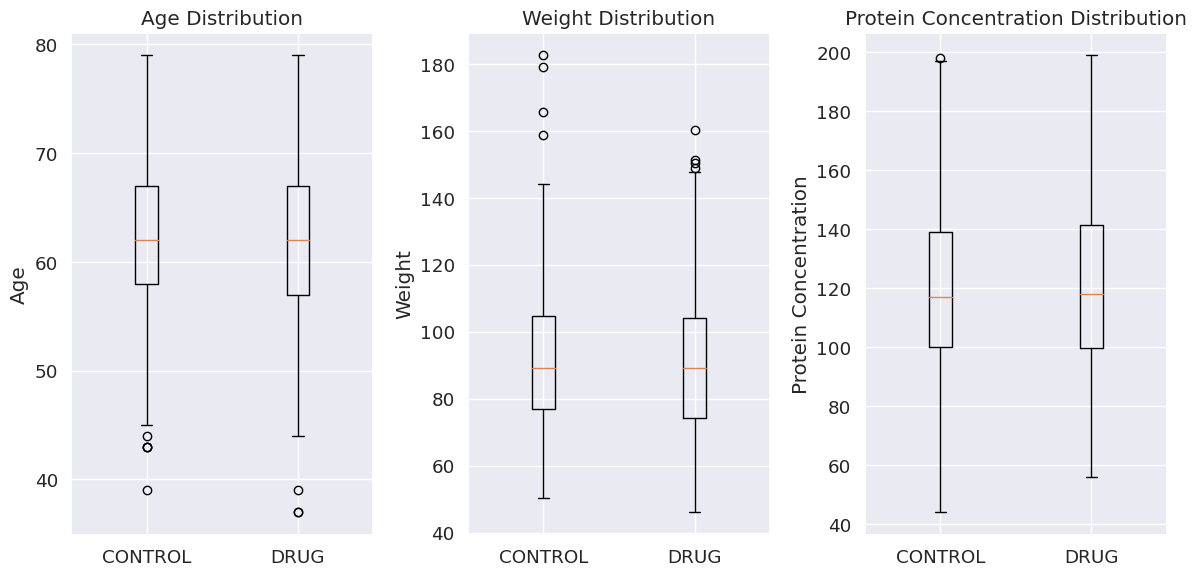

In [ ]:
drug_protein_data = Drug_df['protein_concentration']
drug_age_data = Drug_df['age']
drug_weight_data = Drug_df['weight']

control_weight_data = control_df['weight']
control_age_data = control_df['age']
control_protein_data = control_df['protein_concentration']

fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# Plot the box plots for 'AGE,' 'WEIGHT,' and 'PROTEIN CONCENTRATION' variables
axs[0].boxplot([control_age_data, drug_age_data])
axs[0].set_xticklabels(['CONTROL', 'DRUG'])
axs[0].set_ylabel('Age')
axs[0].set_title('Age Distribution')

axs[1].boxplot([control_weight_data, drug_weight_data])
axs[1].set_xticklabels(['CONTROL', 'DRUG'])
axs[1].set_ylabel('Weight')
axs[1].set_title('Weight Distribution')

axs[2].boxplot([control_protein_data, drug_protein_data])
axs[2].set_xticklabels(['CONTROL', 'DRUG'])
axs[2].set_ylabel('Protein Concentration')
axs[2].set_title('Protein Concentration Distribution')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

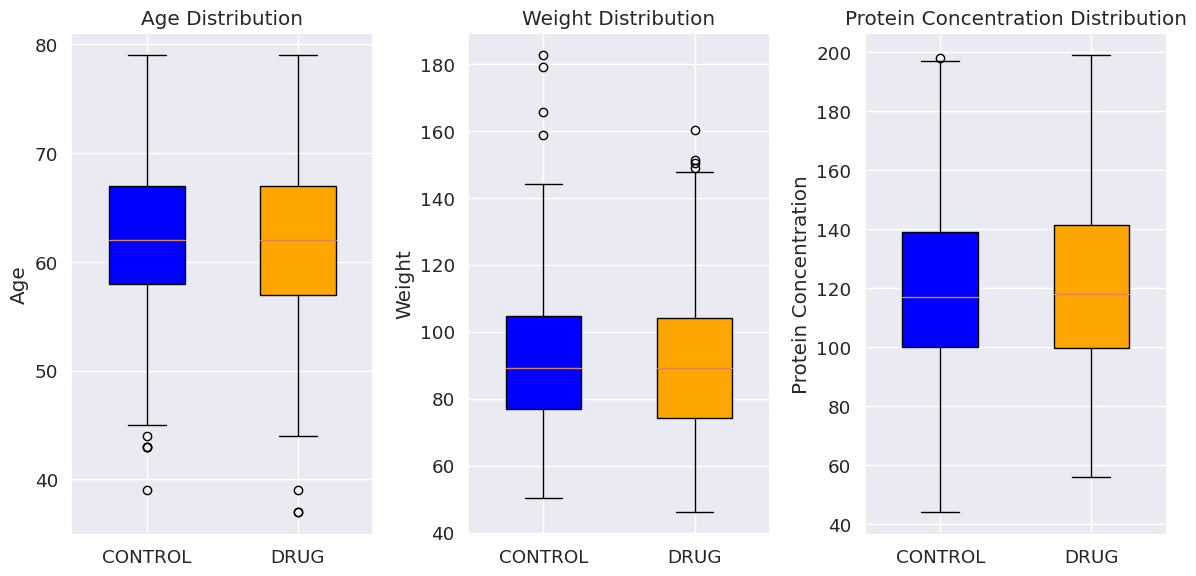

In [ ]:

import matplotlib.pyplot as plt

drug_protein_data = Drug_df['protein_concentration']
drug_age_data = Drug_df['age']
drug_weight_data = Drug_df['weight']

control_weight_data = control_df['weight']
control_age_data = control_df['age']
control_protein_data = control_df['protein_concentration']

fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# Set colors for 'CONTROL' and 'DRUG' box plots
box_colors = ['blue', 'orange']

# Plot the box plots for 'AGE,' 'WEIGHT,' and 'PROTEIN CONCENTRATION' variables
for i, ax in enumerate(axs):
    boxplot_data = [control_age_data, drug_age_data] if i == 0 else [control_weight_data, drug_weight_data] if i == 1 else [control_protein_data, drug_protein_data]
    box = ax.boxplot(boxplot_data, patch_artist=True, widths=0.5)
    ax.set_xticklabels(['CONTROL', 'DRUG'])
    ax.set_ylabel(['Age', 'Weight', 'Protein Concentration'][i])
    ax.set_title(['Age Distribution', 'Weight Distribution', 'Protein Concentration Distribution'][i])
    
    # Set colors for the boxes
    for patch, color in zip(box['boxes'], box_colors):
        patch.set_facecolor(color)
        patch.set_edgecolor('black')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


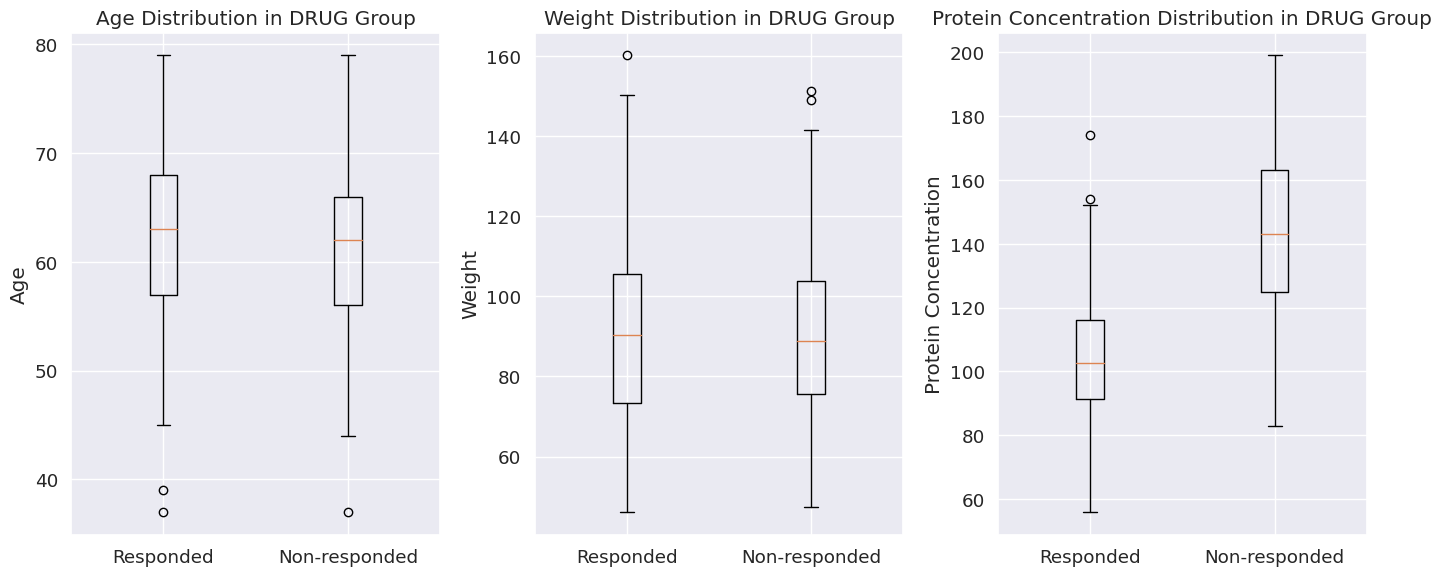

In [ ]:
responded_data = Drug_df[Drug_df['RESPONSE'] == 'Y']
non_responded_data = Drug_df[Drug_df['RESPONSE'] == 'N']

# Define colors for the box plots
boxplot_colors = ['#1f77b4', '#ff7f0e']  # Blue for responded, orange for non-responded


# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(14, 6))

# Plot the box plots for 'AGE,' 'WEIGHT,' and 'PROTEIN CONCENTRATION' variables
axs[0].boxplot([responded_data['age'], non_responded_data['age']])
axs[0].set_xticklabels(['Responded', 'Non-responded'])
axs[0].set_ylabel('Age')
axs[0].set_title('Age Distribution in DRUG Group')

axs[1].boxplot([responded_data['weight'], non_responded_data['weight']])
axs[1].set_xticklabels(['Responded', 'Non-responded'])
axs[1].set_ylabel('Weight')
axs[1].set_title('Weight Distribution in DRUG Group')

axs[2].boxplot([responded_data['protein_concentration'], non_responded_data['protein_concentration']])
axs[2].set_xticklabels(['Responded', 'Non-responded'])
axs[2].set_ylabel('Protein Concentration')
axs[2].set_title('Protein Concentration Distribution in DRUG Group')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot#
plt.show()

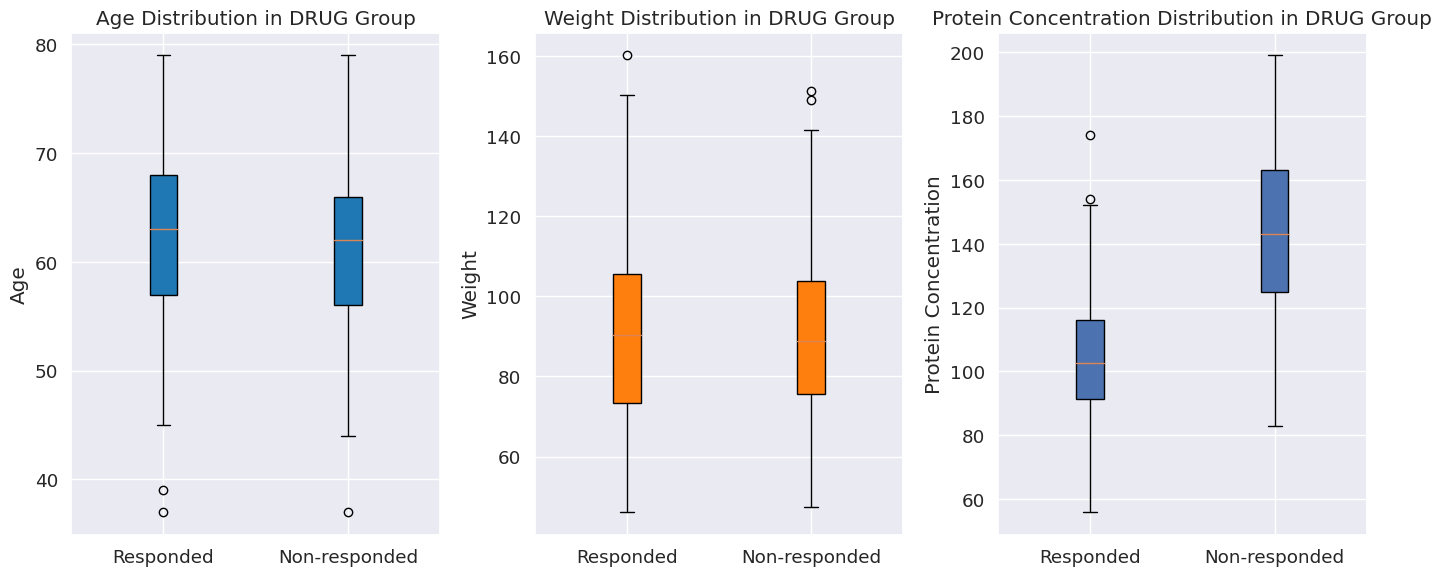

In [ ]:
import matplotlib.pyplot as plt

# Define colors for the box plots
boxplot_colors = ['#1f77b4', '#ff7f0e']  # Blue for responded, orange for non-responded

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(14, 6))

# Plot the box plots for 'AGE,' 'WEIGHT,' and 'PROTEIN CONCENTRATION' variables
boxplot1 = axs[0].boxplot([responded_data['age'], non_responded_data['age']], patch_artist=True)
boxplot2 = axs[1].boxplot([responded_data['weight'], non_responded_data['weight']], patch_artist=True)
boxplot3 = axs[2].boxplot([responded_data['protein_concentration'], non_responded_data['protein_concentration']], patch_artist=True)

# Set the colors of the boxes
for boxplot, color in zip([boxplot1, boxplot2, boxplot3], boxplot_colors):
    for box in boxplot['boxes']:
        box.set(facecolor=color)

# Set the labels, titles, and adjust spacing between subplots
for i, ax in enumerate(axs):
    ax.set_xticklabels(['Responded', 'Non-responded'])
    ax.set_ylabel(['Age', 'Weight', 'Protein Concentration'][i])
    ax.set_title(['Age Distribution in DRUG Group', 'Weight Distribution in DRUG Group', 'Protein Concentration Distribution in DRUG Group'][i])
plt.tight_layout()

# Display the plot
plt.show()


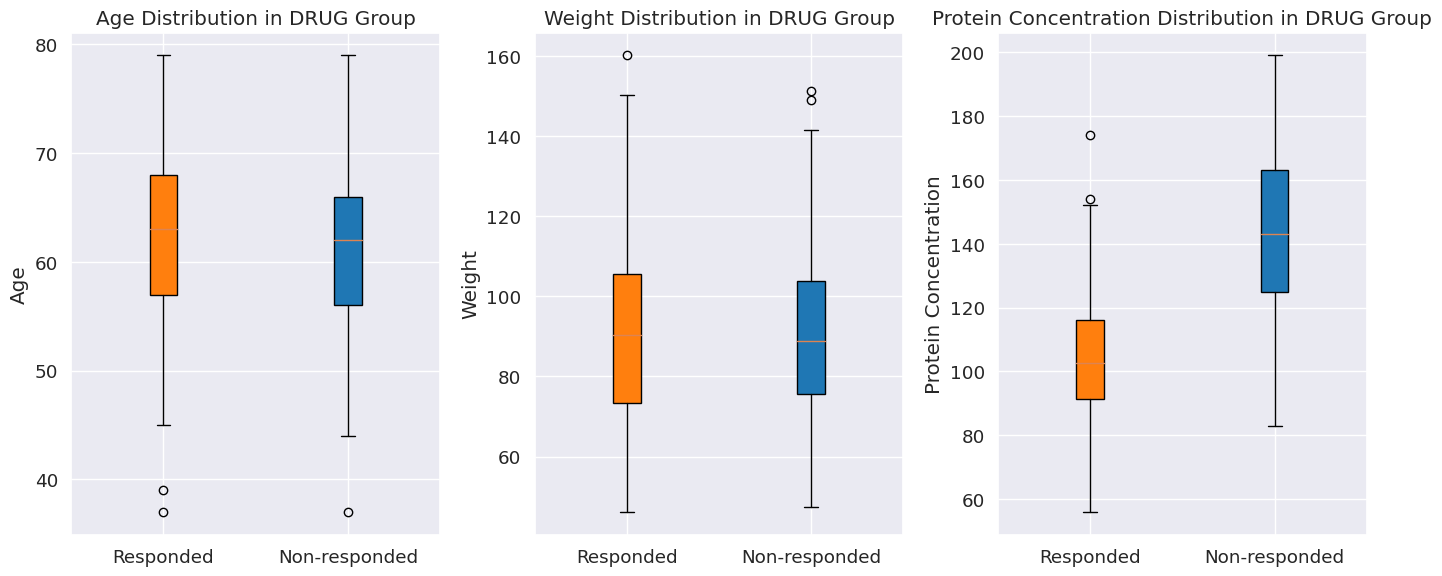

In [ ]:


# Prepare the data for the 'DRUG' group

# Group the data based on 'RESPONSE' status
responded_data = Drug_df[Drug_df['RESPONSE'] == 'Y']
non_responded_data = Drug_df[Drug_df['RESPONSE'] == 'N']

# Define colors for the box plots

non_responded_color = '#1f77b4'
responded_color = '#ff7f0e'

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(14, 6))

# Plot the box plots for 'AGE,' 'WEIGHT,' and 'PROTEIN CONCENTRATION' variables
bp_age = axs[0].boxplot([responded_data['age'], non_responded_data['age']], patch_artist=True)
axs[0].set_xticklabels(['Responded', 'Non-responded'])
axs[0].set_ylabel('Age')
axs[0].set_title('Age Distribution in DRUG Group')

bp_weight = axs[1].boxplot([responded_data['weight'], non_responded_data['weight']], patch_artist=True)
axs[1].set_xticklabels(['Responded', 'Non-responded'])
axs[1].set_ylabel('Weight')
axs[1].set_title('Weight Distribution in DRUG Group')

bp_protein = axs[2].boxplot([responded_data['protein_concentration'], non_responded_data['protein_concentration']], patch_artist=True)
axs[2].set_xticklabels(['Responded', 'Non-responded'])
axs[2].set_ylabel('Protein Concentration')
axs[2].set_title('Protein Concentration Distribution in DRUG Group')

# Set face colors for the box plots
for box in bp_age['boxes']:
    box.set(facecolor=responded_color)
for box in bp_weight['boxes']:
    box.set(facecolor=responded_color)
for box in bp_protein['boxes']:
    box.set(facecolor=responded_color)

# Set face color for non-responded box plots
for box in bp_age['boxes'][1:]:
    box.set(facecolor=non_responded_color)
for box in bp_weight['boxes'][1:]:
    box.set(facecolor=non_responded_color)
for box in bp_protein['boxes'][1:]:
    box.set(facecolor=non_responded_color)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


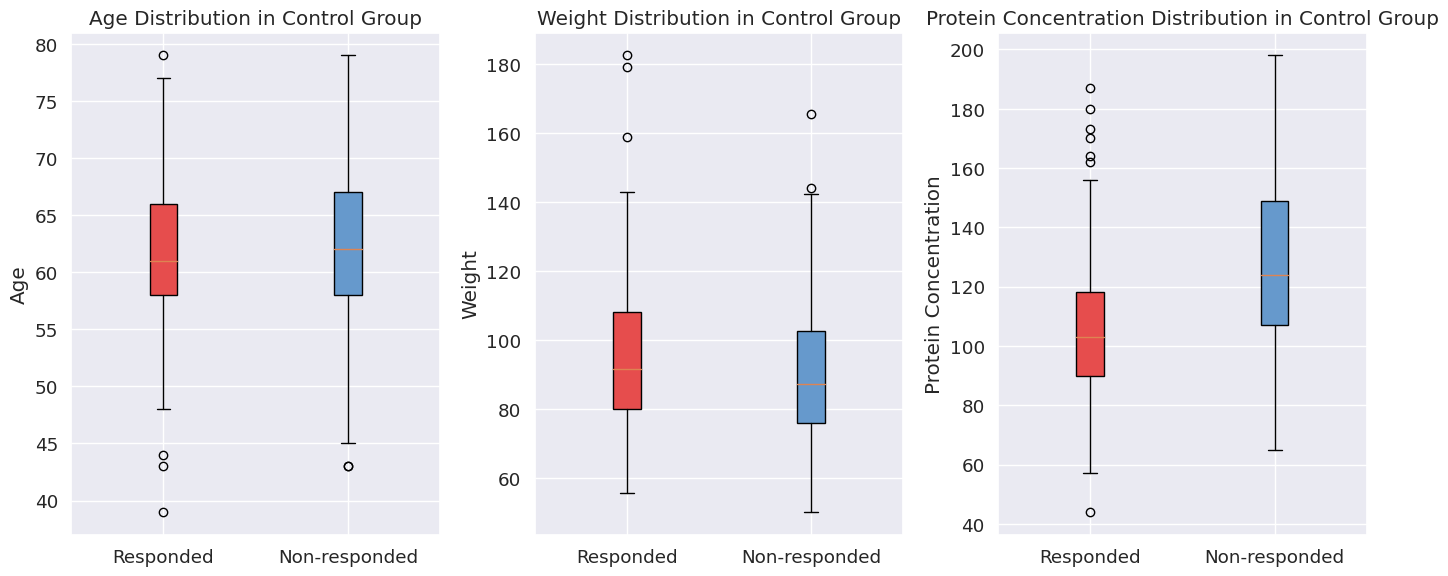

In [ ]:
import matplotlib.pyplot as plt

# Prepare the data for the 'CONTROL' group

# Group the data based on 'RESPONSE' status
responded_data2 = control_df[control_df['RESPONSE'] == 'Y']
non_responded_data2 = control_df[control_df['RESPONSE'] == 'N']

# Define colors for the box plots
non_responded_color2 = (0.4, 0.6, 0.8, 1)  # Light blue color
responded_color2= (0.9, 0.3, 0.3, 1)  # Light red color

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(14, 6))

# Plot the box plots for 'AGE,' 'WEIGHT,' and 'PROTEIN CONCENTRATION' variables
bp_age = axs[0].boxplot([responded_data2['age'], non_responded_data2['age']], patch_artist=True)
axs[0].set_xticklabels(['Responded', 'Non-responded'])
axs[0].set_ylabel('Age')
axs[0].set_title('Age Distribution in Control Group')

bp_weight = axs[1].boxplot([responded_data2['weight'], non_responded_data2['weight']], patch_artist=True)
axs[1].set_xticklabels(['Responded', 'Non-responded'])
axs[1].set_ylabel('Weight')
axs[1].set_title('Weight Distribution in Control Group')

bp_protein = axs[2].boxplot([responded_data2['protein_concentration'], non_responded_data2['protein_concentration']], patch_artist=True)
axs[2].set_xticklabels(['Responded', 'Non-responded'])
axs[2].set_ylabel('Protein Concentration')
axs[2].set_title('Protein Concentration Distribution in Control Group')

# Set face colors for the box plots
for box in bp_age['boxes']:
    box.set(facecolor=responded_color2)
for box in bp_weight['boxes']:
    box.set(facecolor=responded_color2)
for box in bp_protein['boxes']:
    box.set(facecolor=responded_color2)

# Set face color for non-responded box plots
for box in bp_age['boxes'][1:]:
    box.set(facecolor=non_responded_color2)
for box in bp_weight['boxes'][1:]:
    box.set(facecolor=non_responded_color2)
for box in bp_protein['boxes'][1:]:
    box.set(facecolor=non_responded_color2)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

The mean age and mean weight is the same for responders and non responders. However, there is difference in mean protein concentration. The mean protein concentration for those that responded to treatment is 103 while that of non respondrs is 